# Problem 1 for the Data Set : Shoesales.csv 

# You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995.

# Problem 2 for the Data Set SoftDrink.csv

# You are an analyst in the RST soft drink company and you are expected to forecast the sales of the production of the soft drink for the upcoming 12 months from where the data ends. The data for the production of soft drink has been given to you from January 1980 to July 1995.

# Please do perform the following questions on each of these two data sets separately.



In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
filterwarnings("ignore")

## 1. Read the data as an appropriate Time Series data and plot the data.
## Read the Shoesales data from the '.csv' file as a monthly Time Series.

In [133]:
df = pd.read_csv('Shoesales.csv',parse_dates=True,index_col='YearMonth')
df.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

In [131]:
## Checking the number of observations
df.shape

(187, 1)

## Plot the Time Series to understand the behaviour of the data.

In [4]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

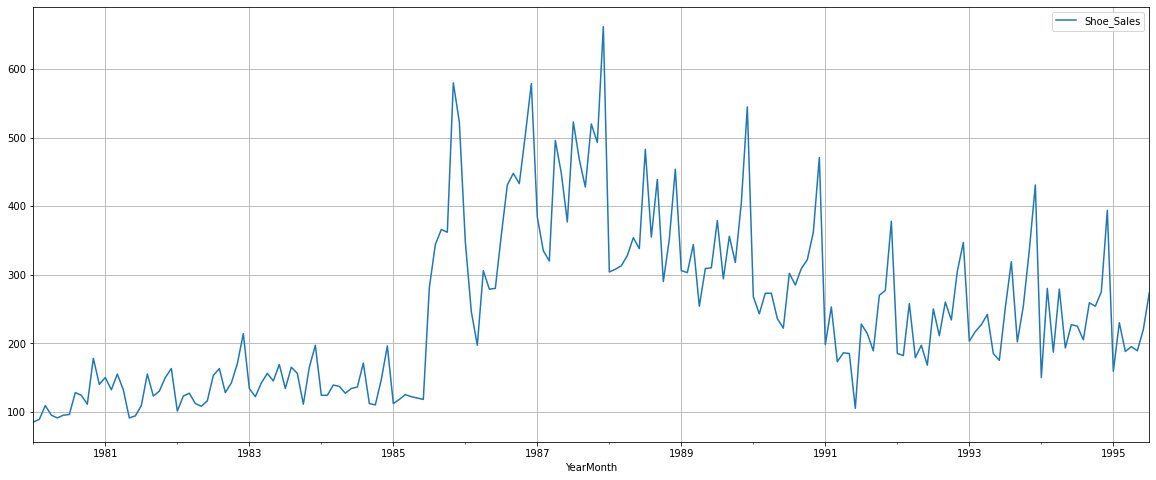

In [5]:
df.plot()
plt.grid();

The plot depicts a increasing trend of sales over the period of 1980 to 1995

## Read the Soft Drink data from the '.csv' file as a monthly Time Series.

In [134]:
df1 = pd.read_csv('SoftDrink.csv',parse_dates=True,index_col='YearMonth')
df1.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

In [135]:
## Checking the number of observations
df1.shape

(187, 1)

## Plot the Time Series to understand the behaviour of the data.

In [8]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

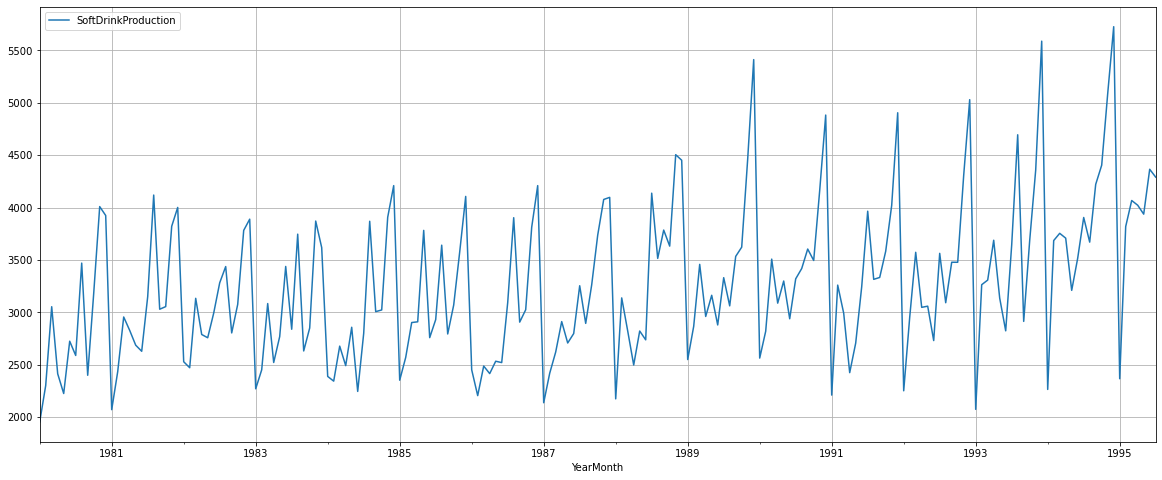

In [9]:
df1.plot()
plt.grid();

The plot depicts an increasing trend of sales over the period of 1980 to 1995

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

## Shoesales data

## Check the basic measures of descriptive statistics

In [10]:
df.describe()

Shoe_Sales
count  187.000000
mean   245.636364
std    121.390804
min     85.000000
25%    143.500000
50%    220.000000
75%    315.500000
max    662.000000

In [11]:
df.isnull().sum()

Shoe_Sales    0
dtype: int64

Total 187 records and min sales of 85 and max sales of 662 with 50 percentile is 220.

0 null values.

## Plot a boxplot to understand the spread of sales across different years and within different months across years.

### Yearly Boxplot

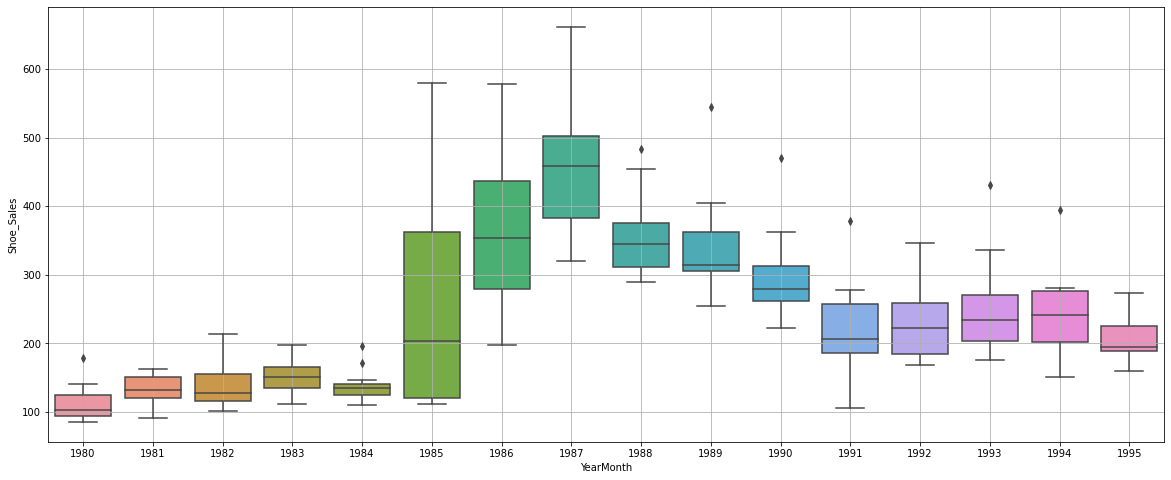

In [12]:
sns.boxplot(x = df.index.year,y = df['Shoe_Sales'])
plt.grid();

The above picture shows the trend over the period between 1980 to 1995 with outliers in most of
the years.

### Monthly Plot

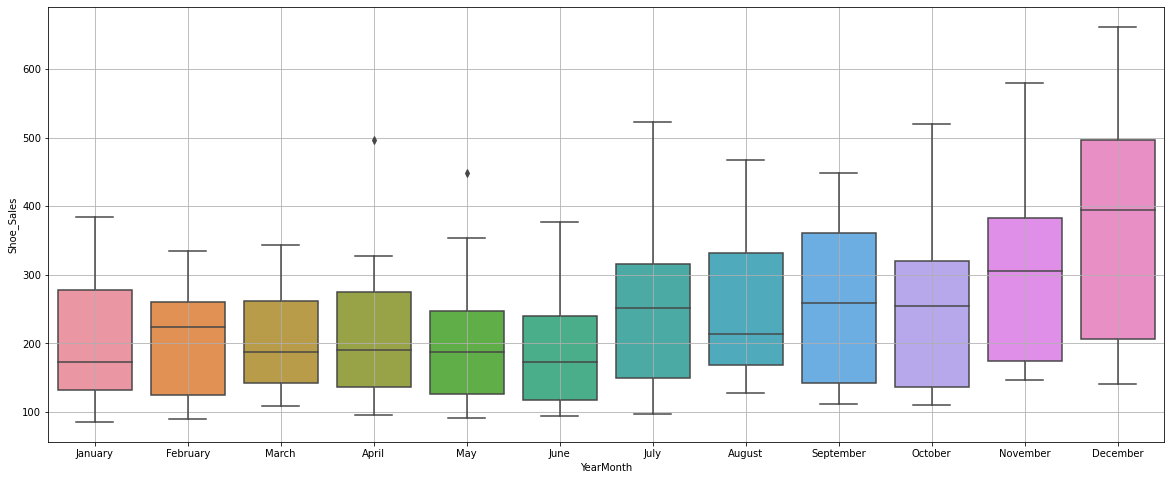

In [13]:
sns.boxplot(x = df.index.month_name(),y = df['Shoe_Sales'])
plt.grid();

The above picture shows the trend of sales in months , December seems to have the highest sales and January seems to have lowest sales.

## Plot a time series monthplot to understand the spread of Sales across different years and within different months across years.

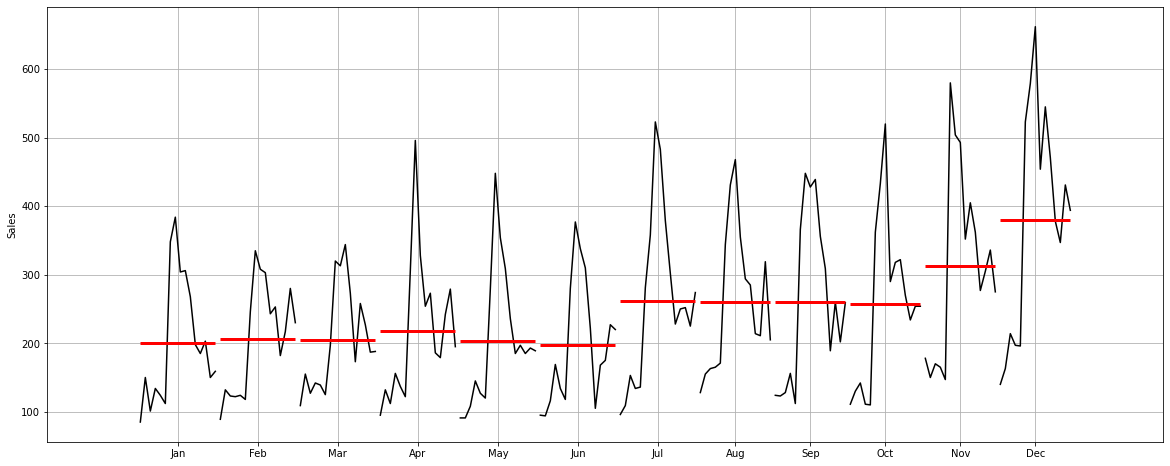

In [14]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Shoe_Sales'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Shoe_Sales' in this case) across various months. The red line is the median value.

## Plot a graph of monthly RetailSales across years.

In [15]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Shoe_Sales', columns = df.index.month, index = df.index.year)
monthly_sales_across_years.style.highlight_max()

1987 had the highest sales of all years in December.

1980 January had the least sales

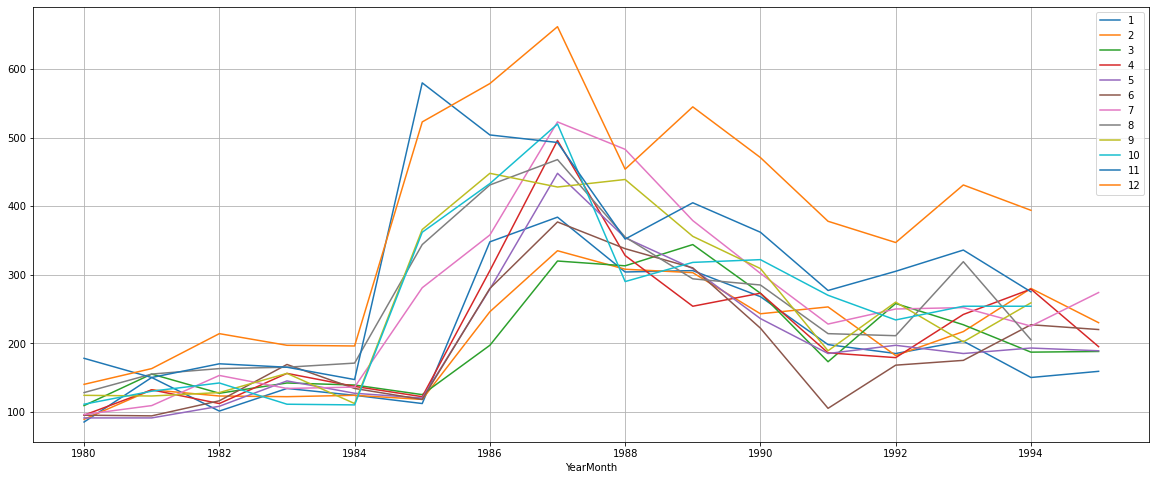

In [16]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

The plot shows that December has the highest sales of all months.

## Plot the Empirical Cumulative Distribution.

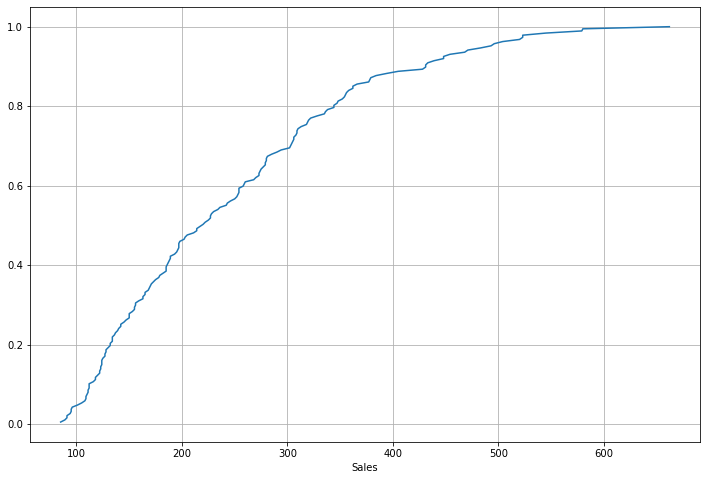

In [17]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 8))
cdf = ECDF(df['Shoe_Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales. Sales increases over the years.

## Plot the average Sales per month and the month on month percentage change of Sales.

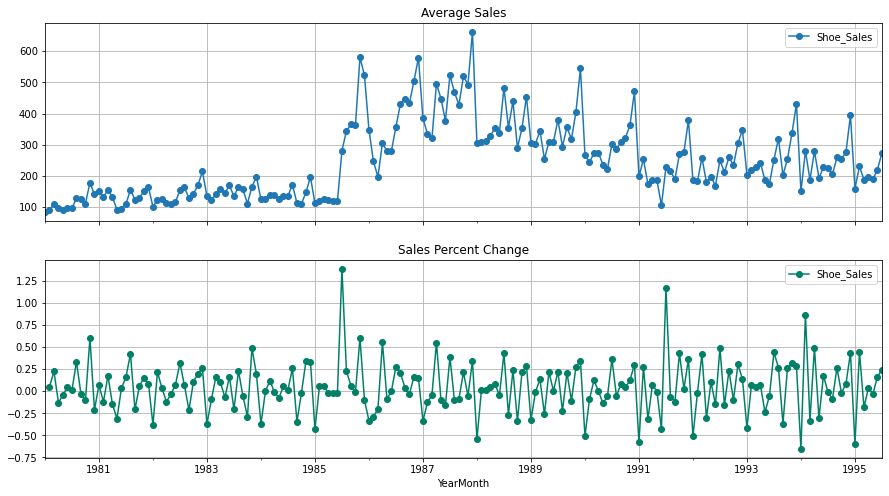

In [18]:
# group by date and get average Sales, and precent change
average    = df.groupby(df.index)["Shoe_Sales"].mean()
pct_change = df.groupby(df.index)["Shoe_Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

The above two graphs tells us the Average 'Sales' and the Percentage change of 'Sales' with respect to the time.

## Decompose the Time Series and plot the different components.

In [19]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

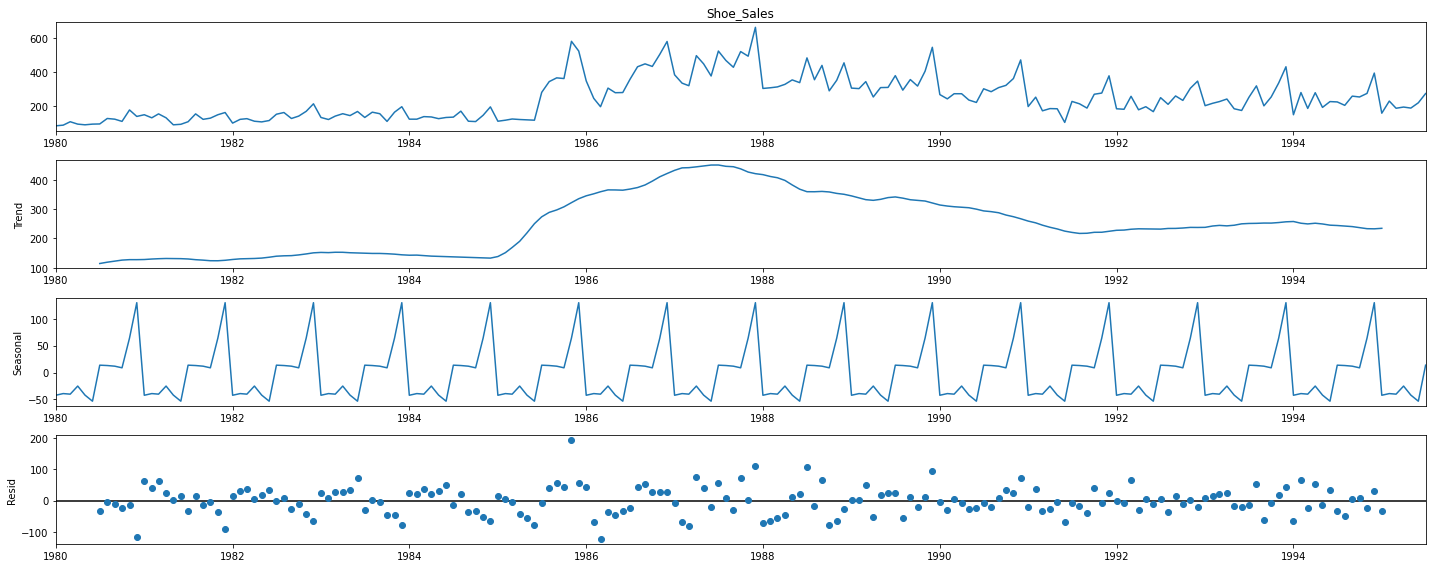

In [20]:
decomposition = seasonal_decompose(df['Shoe_Sales'],model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is an increasing decreasing trend in sales of Shoes starting from 1980 to 1994.
Seasonality is also clearly visible from the seasonal graph where trend lines are forming the
peaks each year.
Residuals seems to be scattered from the 0 level. Indicating that the series is not additive.

In [21]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    114.458333
1980-08-01    118.958333
1980-09-01    122.666667
1980-10-01    126.125000
1980-11-01    127.666667
1980-12-01    127.625000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -42.175463
1980-02-01    -39.062566
1980-03-01    -40.122090
1980-04-01    -25.092328
1980-05-01    -41.878042
1980-06-01    -53.208399
1980-07-01     13.741204
1980-08-01     13.077315
1980-09-01     11.866204
1980-10-01      8.835648
1980-11-01     64.152315
1980-12-01    129.866204
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    -32.199537
1980-08-01     -4.035648
1980-09-01    -10.532870
1980-10-01    -23.960648
1980-11-01    -13.818981

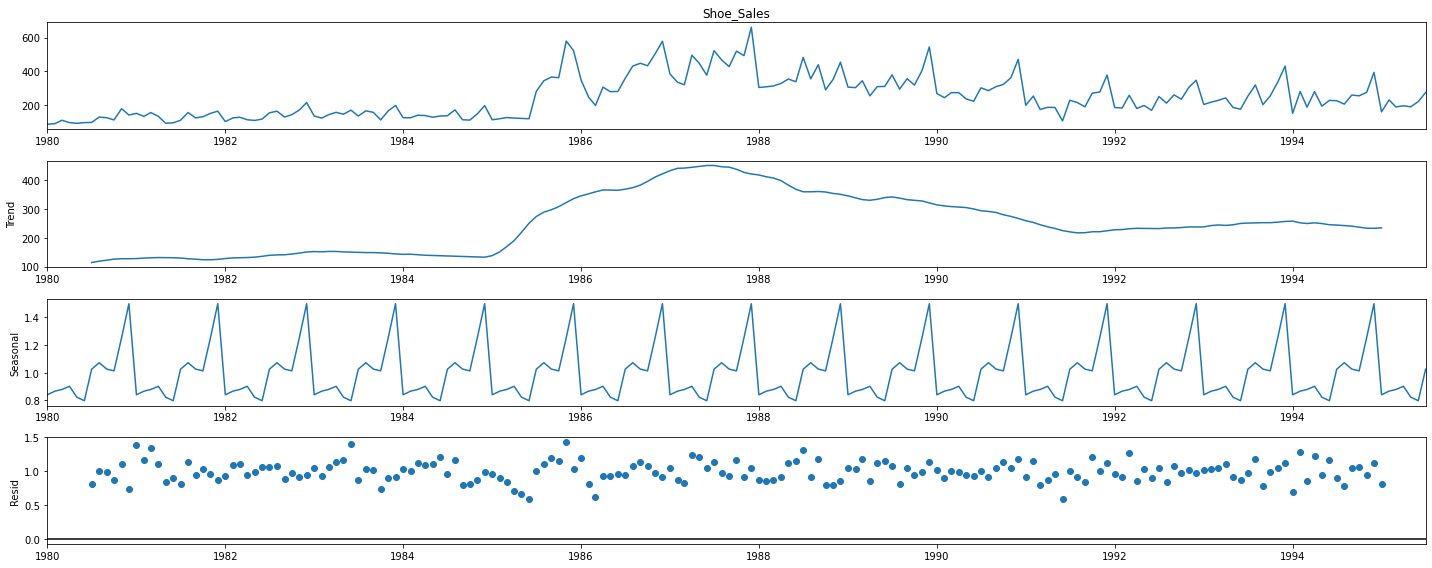

In [22]:
decomposition = seasonal_decompose(df['Shoe_Sales'],model='multiplicative')
decomposition.plot();

The trend and seasonality are present same as in case of additive model. But residuals plot is
clearly showing the concentration of data towards 1 point. Hence it can be concluded that series
is multiplicative.

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    114.458333
1980-08-01    118.958333
1980-09-01    122.666667
1980-10-01    126.125000
1980-11-01    127.666667
1980-12-01    127.625000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.840405
1980-02-01    0.866682
1980-03-01    0.878675
1980-04-01    0.901826
1980-05-01    0.823141
1980-06-01    0.797254
1980-07-01    1.025527
1980-08-01    1.072445
1980-09-01    1.026307
1980-10-01    1.013557
1980-11-01    1.254223
1980-12-01    1.499958
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.817856
1980-08-01    1.003322
1980-09-01    0.984958
1980-10-01    0.868308
1980-11-01    1.111649
1980-12-01    0.731330
Name: resid, dtype: fl

## Soft drink Data

## Check the basic measures of descriptive statistics

In [24]:
df1.describe()

SoftDrinkProduction
count           187.000000
mean           3262.609626
std             728.357367
min            1954.000000
25%            2748.000000
50%            3134.000000
75%            3741.000000
max            5725.000000

In [25]:
df1.isnull().sum()

SoftDrinkProduction    0
dtype: int64

Total 187 records and min sales of 1954 and max sales of 5725 with 50 percentile is 3134. 

0 missing/null values.

## Plot a boxplot to understand the spread of sales across different years and within different months across years.

### Yearly Boxplot

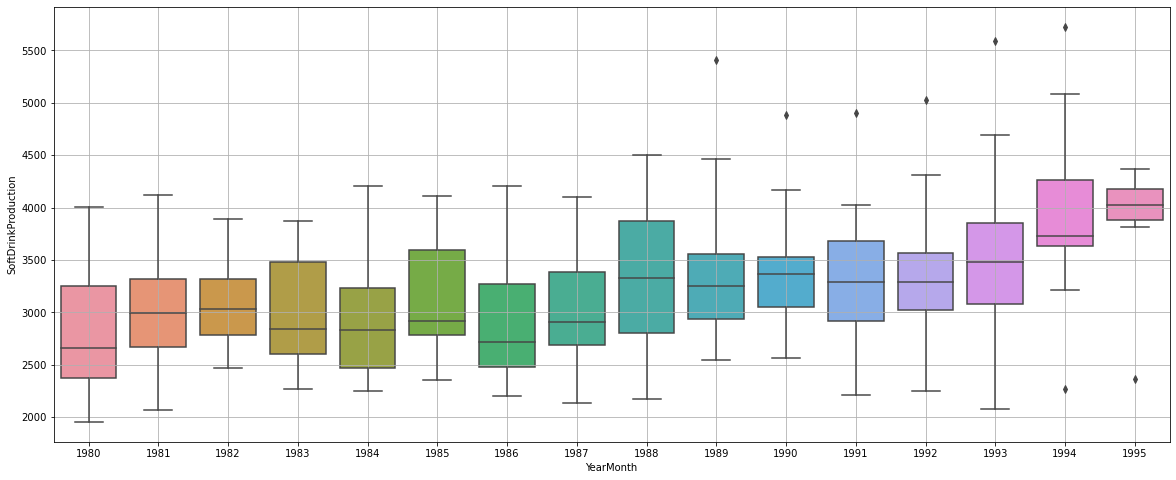

In [26]:
sns.boxplot(x = df1.index.year,y = df1['SoftDrinkProduction'])
plt.grid();

The above picture shows the trend over the period between 1980 to 1995 with outliers in 1989 to 1995. 1994 - highest sales, 1980 - lowest sales.

### Monthly Plot

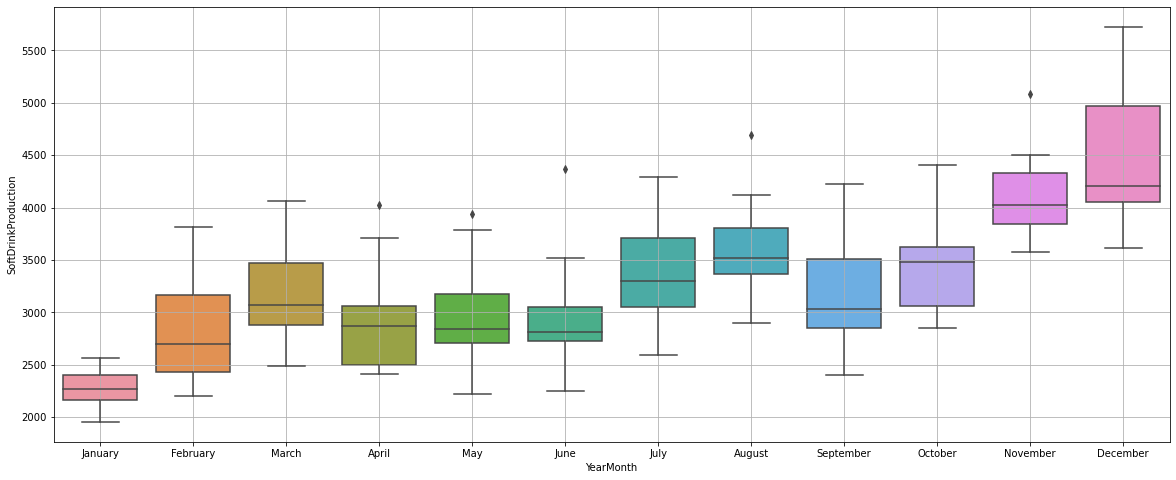

In [27]:
sns.boxplot(x = df1.index.month_name(),y = df1['SoftDrinkProduction'])
plt.grid();

The above picture shows the trend of sales in months , December seems to have the highest sales and January seems to have lowest sales.

## Plot a time series monthplot to understand the spread of Sales across different years and within different months across years.

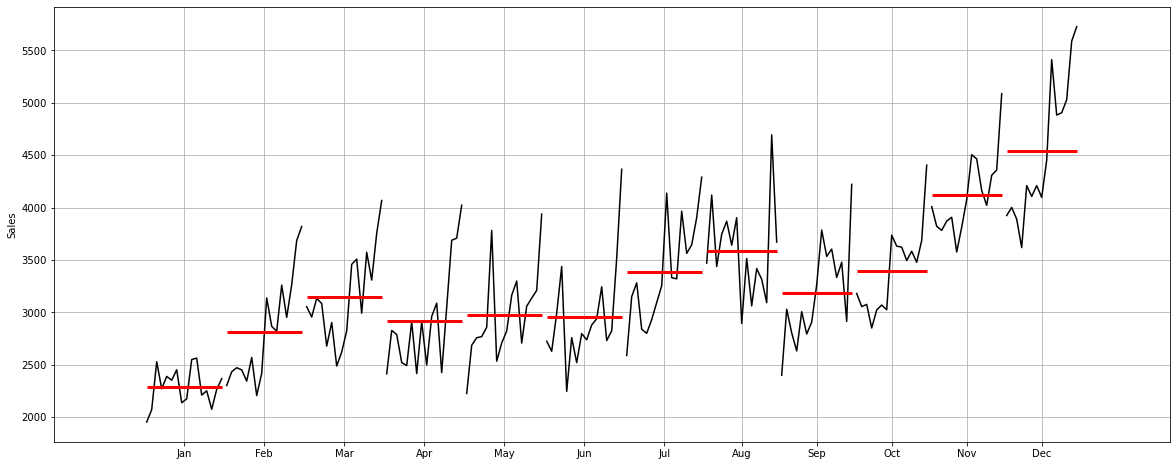

In [28]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df1['SoftDrinkProduction'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('SoftDrinkProduction' in this case) across various months. The red line is the median value.

## Plot a graph of monthly RetailSales across years.

In [29]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'SoftDrinkProduction', columns = df1.index.month, index = df1.index.year)
monthly_sales_across_years.style.highlight_max()

1994 had the highest sales of all years in December.
1980 January had the least sales.

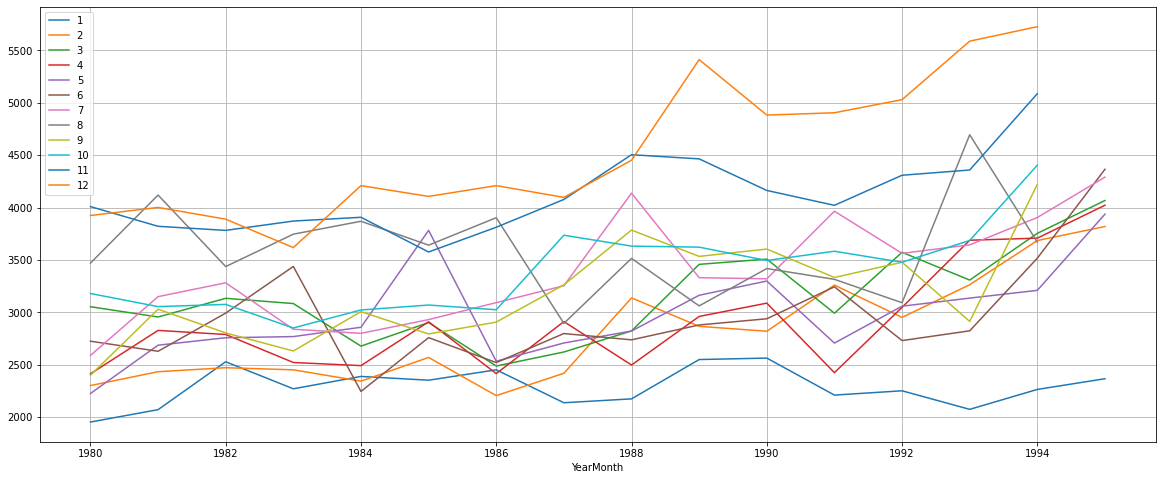

In [30]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

The plot shows that December has the highest sales of all months.

## Plot the Empirical Cumulative Distribution.

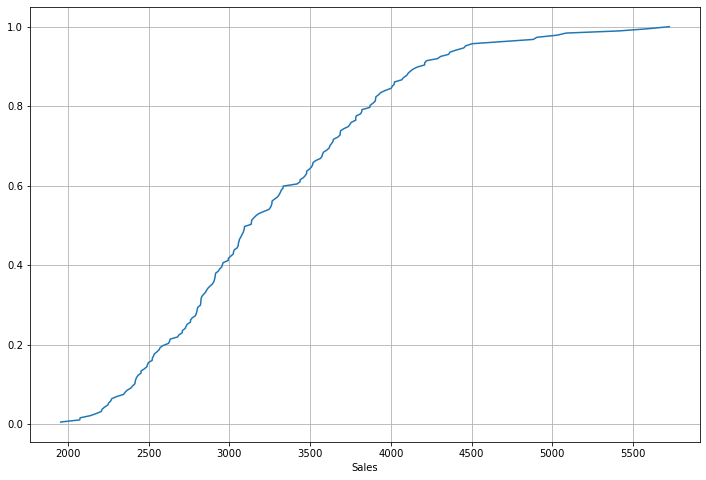

In [31]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 8))
cdf = ECDF(df1['SoftDrinkProduction'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales. Sales increases over the years.

## Plot the average Sales per month and the month on month percentage change of Sales.

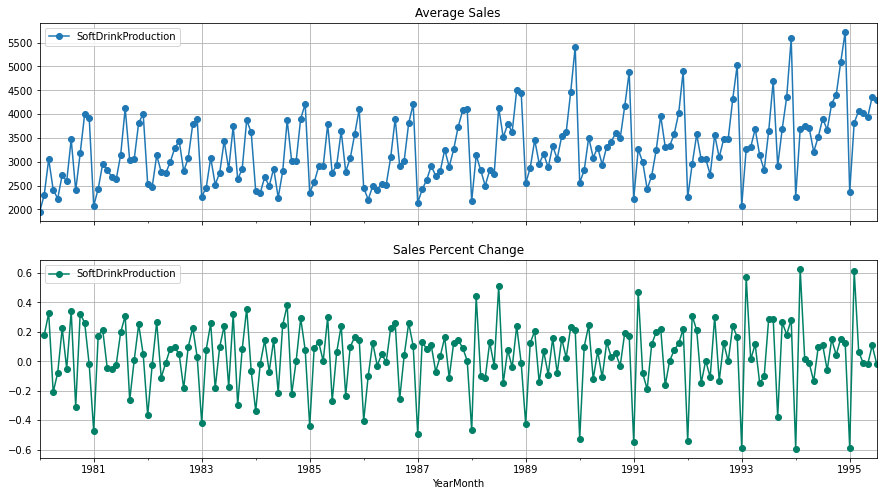

In [32]:
# group by date and get average Sales, and precent change
average    = df1.groupby(df1.index)["SoftDrinkProduction"].mean()
pct_change = df1.groupby(df1.index)["SoftDrinkProduction"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

The above two graphs tells us the Average 'Sales' and the Percentage change of 'Sales' with respect to the time.

## Decompose the Time Series and plot the different components.

In [33]:
from statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

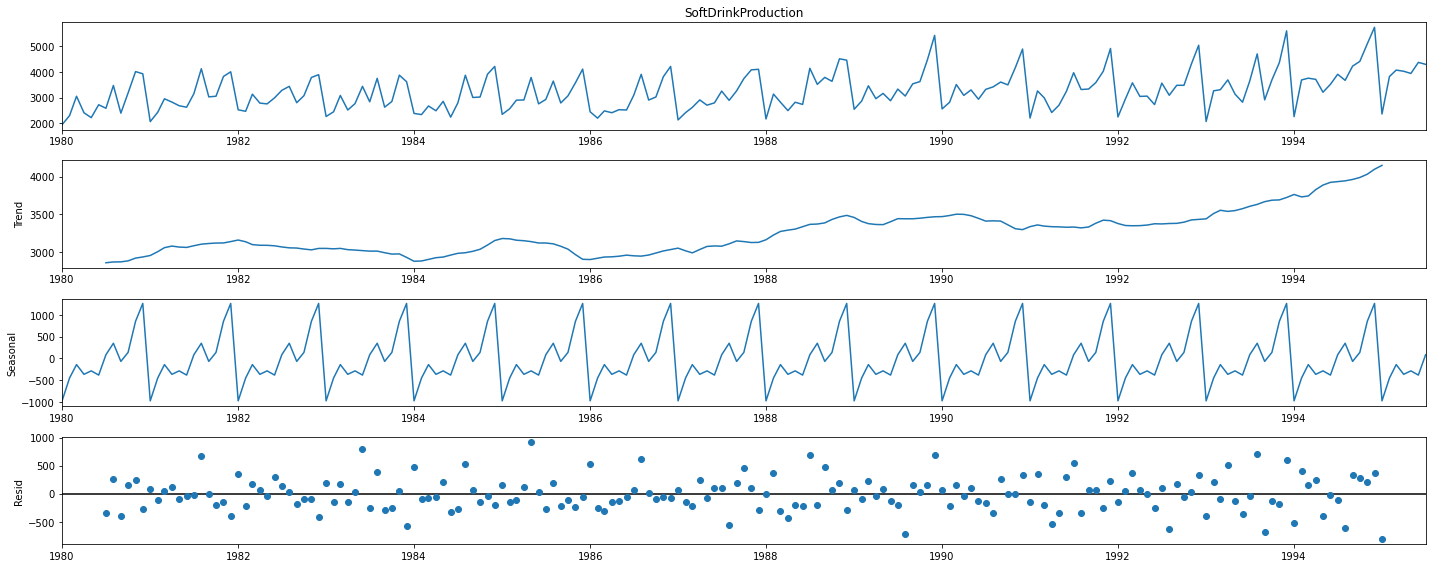

In [34]:
decomposition = seasonal_decompose(df1['SoftDrinkProduction'],model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is an increasing trend in sales of SoftDrinkProduction starting from 1980 to 1995.
Seasonality is also clearly visible from the seasonal graph where trend lines are forming the
peaks each year.
Residuals seems to be scattered from the 0 level. Indicating that the series is not additive.

In [35]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -974.619692
1980-02-01    -451.246677
1980-03-01    -143.118700
1980-04-01    -366.181200
1980-05-01    -286.815129
1980-06-01    -383.594891
1980-07-01      82.191419
1980-08-01     346.363641
1980-09-01     -69.997470
1980-10-01     136.721974
1980-11-01     850.369196
1980-12-01    1259.927530
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01   -352.024752
1980-08-01    254.386359
1980-09-01   -400.669196
1980-10-01    159.444692


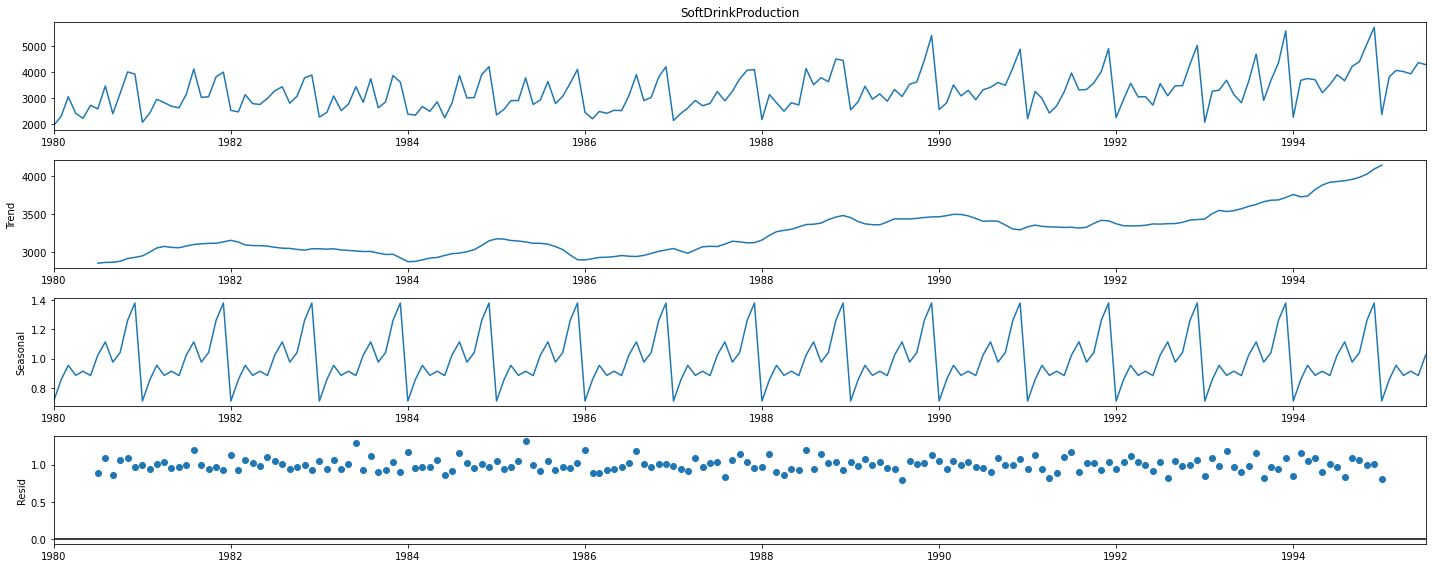

In [37]:
decomposition = seasonal_decompose(df1['SoftDrinkProduction'],model='multiplicative')
decomposition.plot();

The trend and seasonality are present same as in case of additive model. But residuals plot is
clearly showing the concentration of data towards 1 point. Hence it can be concluded that series
is multiplicative.

In [38]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.709526
1980-02-01    0.856420
1980-03-01    0.953935
1980-04-01    0.885217
1980-05-01    0.913735
1980-06-01    0.883890
1980-07-01    1.023936
1980-08-01    1.114195
1980-09-01    0.975955
1980-10-01    1.040944
1980-11-01    1.261792
1980-12-01    1.380456
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.884444
1980-08-01    1.085425
1980-09-01    0.856641
1980-10-01    1.059326
1980-11-01    1.087983
1980-12-01    0.968332
Name: resi

## 3. Split the data into training and test. The test data should start in 1991.

## Shoesales Data

In [136]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [137]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


Train has been split with data before 1991 and test with data after 1991.
Train has 132 rows and test has 55 rows.

In [41]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [42]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

Last few rows of Training Data


Shoe_Sales
YearMonth             
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471

First few rows of Test Data


Shoe_Sales
YearMonth             
1991-01-01         198
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185

Last few rows of Test Data


Shoe_Sales
YearMonth             
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

## Graphical representation of test and train data

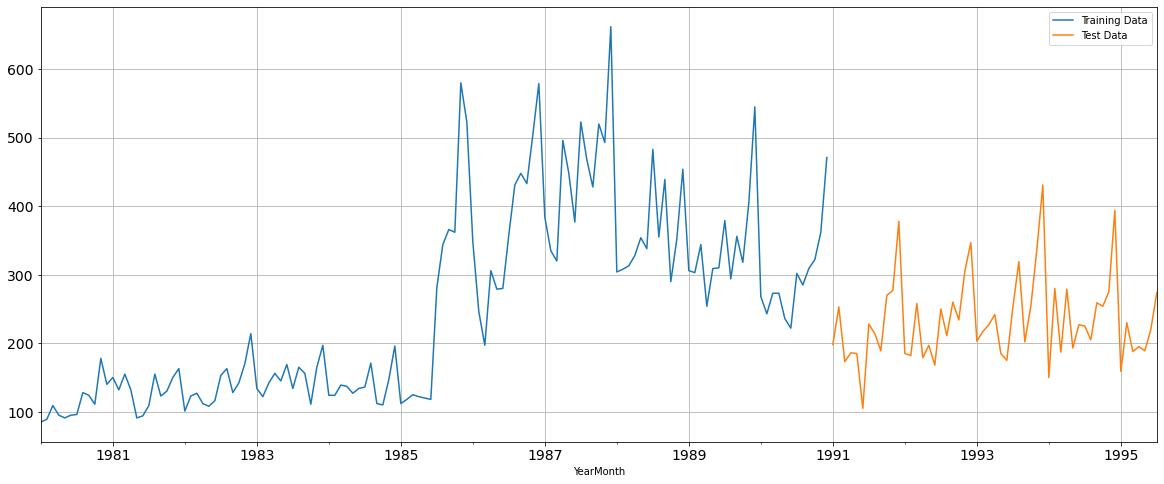

In [43]:
train['Shoe_Sales'].plot(fontsize=14)
test['Shoe_Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Soft Drink data

In [138]:
train1=df1[df1.index.year < 1991]
test1=df1[df1.index.year >= 1991]

In [139]:
print(train1.shape)
print(test1.shape)

(132, 1)
(55, 1)


Train has been split with data before 1991 and test with data after 1991.
Train has 132 rows and test has 55 rows.

In [46]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [47]:
print('First few rows of Training Data')
display(train1.head())
print('Last few rows of Training Data')
display(train1.tail())
print('First few rows of Test Data')
display(test1.head())
print('Last few rows of Test Data')
display(test1.tail())

First few rows of Training Data


SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

Last few rows of Training Data


SoftDrinkProduction
YearMonth                      
1990-08-01                 3418
1990-09-01                 3604
1990-10-01                 3495
1990-11-01                 4163
1990-12-01                 4882

First few rows of Test Data


SoftDrinkProduction
YearMonth                      
1991-01-01                 2211
1991-02-01                 3260
1991-03-01                 2992
1991-04-01                 2425
1991-05-01                 2707

Last few rows of Test Data


SoftDrinkProduction
YearMonth                      
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995-07-01                 4290

## Graphical representation of test and train data

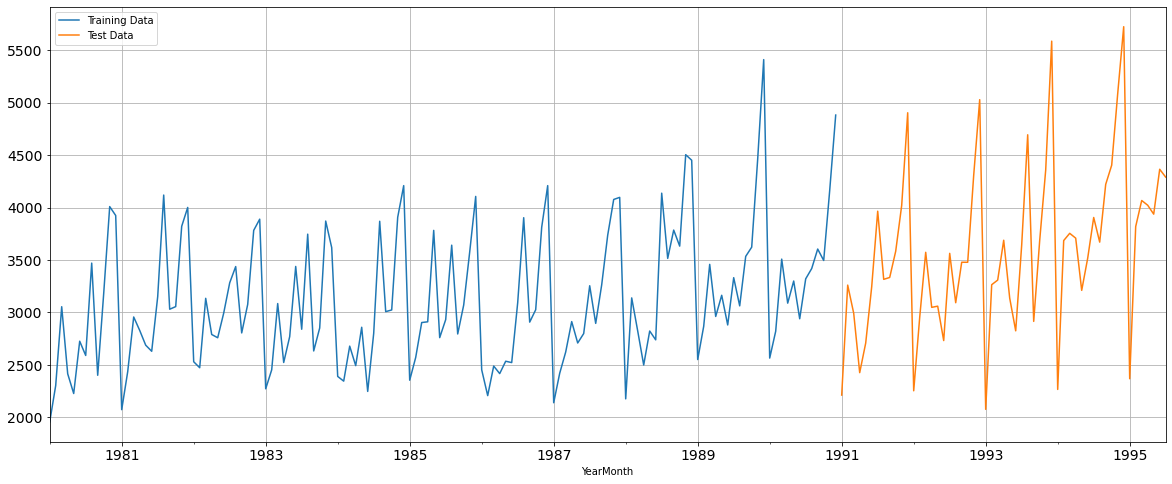

In [48]:
train1['SoftDrinkProduction'].plot(fontsize=14)
test1['SoftDrinkProduction'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

## Shoe Sales Data

## Model 1: Linear Regression
For this particular linear regression, we are going to regress the 'Shoe_Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [256]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [257]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [258]:
LinearRegression_train['Time'] = train_time
LinearRegression_test['Time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Shoe_Sales  Time
YearMonth                   
1980-01-01          85     1
1980-02-01          89     2
1980-03-01         109     3
1980-04-01          95     4
1980-05-01          91     5

Last few rows of Training Data


Shoe_Sales  Time
YearMonth                   
1990-08-01         285   128
1990-09-01         309   129
1990-10-01         322   130
1990-11-01         362   131
1990-12-01         471   132

First few rows of Test Data


Shoe_Sales  Time
YearMonth                   
1991-01-01         198   133
1991-02-01         253   134
1991-03-01         173   135
1991-04-01         186   136
1991-05-01         185   137

Last few rows of Test Data


Shoe_Sales  Time
YearMonth                   
1995-03-01         188   183
1995-04-01         195   184
1995-05-01         189   185
1995-06-01         220   186
1995-07-01         274   187

Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛
  to build the model on the training data and test the model on the test data.

In [259]:
from sklearn.linear_model import LinearRegression 

In [260]:
lr = LinearRegression()

In [261]:
lr.fit(LinearRegression_train[['Time']],LinearRegression_train['Shoe_Sales'])

LinearRegression()

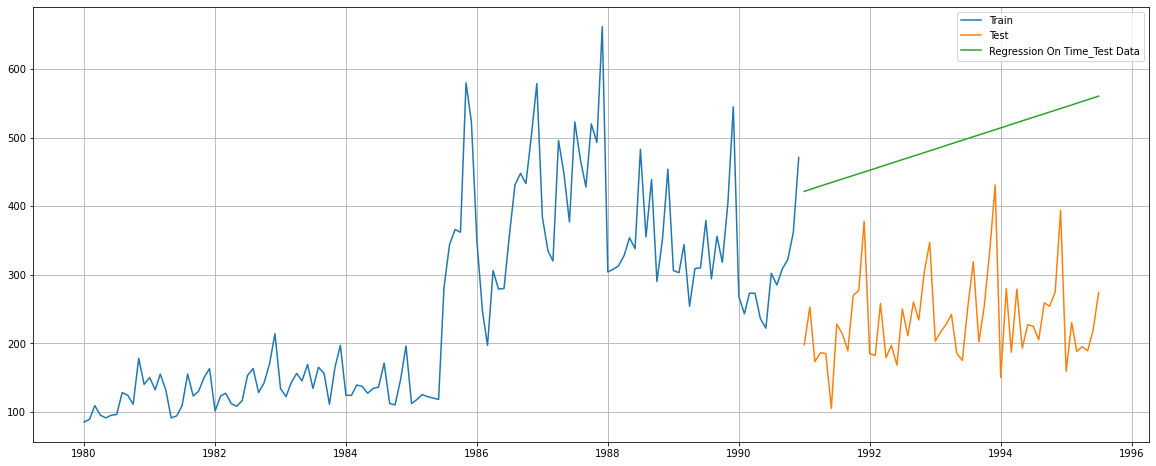

In [262]:
train_predictions_model1         = lr.predict(LinearRegression_train[['Time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['Time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

The predicted trend is increasing.

Defining the functions for calculating the accuracy metrics.

In [263]:
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 266.276 


The RSME on test data value is 266.276, value is not very high but since seasonality is also not taken care by model this model is not suitable predictions on Shoe_Sales time series data.

In [264]:
resultsDf0 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf0

Test RMSE
RegressionOnTime  266.276472

## Model 2: Naive Approach:  $\hat{y}_{t+1} = y_t$
 
For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [265]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [266]:
NaiveModel_test['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

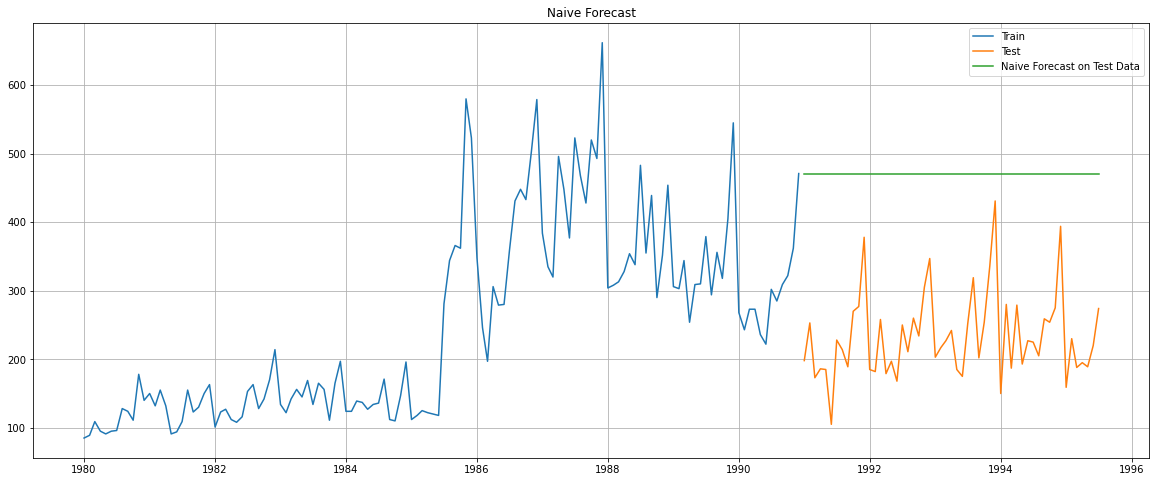

In [267]:
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

In [268]:
rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 245.121


RSME is 245.121 which is lower than the linear regression model. But this model being too simple is not taking care of seasonality.

In [269]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf0 = pd.concat([resultsDf0, resultsDf_2])
resultsDf0

Test RMSE
RegressionOnTime  266.276472
NaiveModel        245.121306

## Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [270]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [271]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

Shoe_Sales  mean_forecast
YearMonth                            
1991-01-01         198     250.575758
1991-02-01         253     250.575758
1991-03-01         173     250.575758
1991-04-01         186     250.575758
1991-05-01         185     250.575758

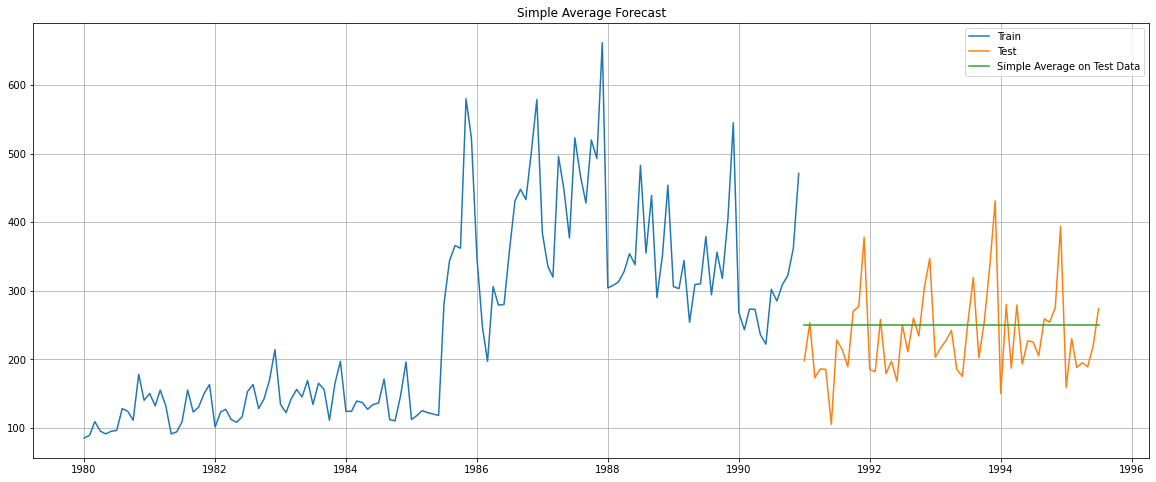

In [272]:
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

The plot shows a flat line

In [273]:
rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 63.985


RMSE is 63.985 which is less than Naïve model & regression model but without seasonality component.

In [274]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf0 = pd.concat([resultsDf0, resultsDf_3])
resultsDf0

Test RMSE
RegressionOnTime    266.276472
NaiveModel          245.121306
SimpleAverageModel   63.984570

## Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [275]:
MovingAverage = df.copy()
MovingAverage.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

In [276]:
MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()

MovingAverage.head()

Shoe_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                             
1980-01-01          85         NaN         NaN         NaN         NaN
1980-02-01          89        87.0         NaN         NaN         NaN
1980-03-01         109        99.0         NaN         NaN         NaN
1980-04-01          95       102.0        94.5         NaN         NaN
1980-05-01          91        93.0        96.0         NaN         NaN

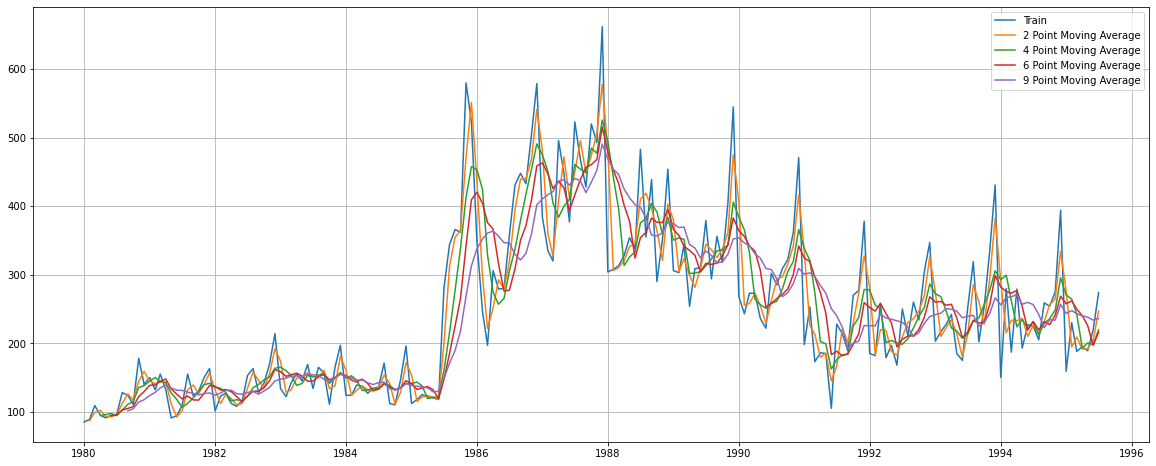

In [277]:
## Plotting on the whole data

plt.plot(MovingAverage['Shoe_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Considering criteria that testing data should start from 1991 onwards, training and testing data is
prepared.

In [278]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

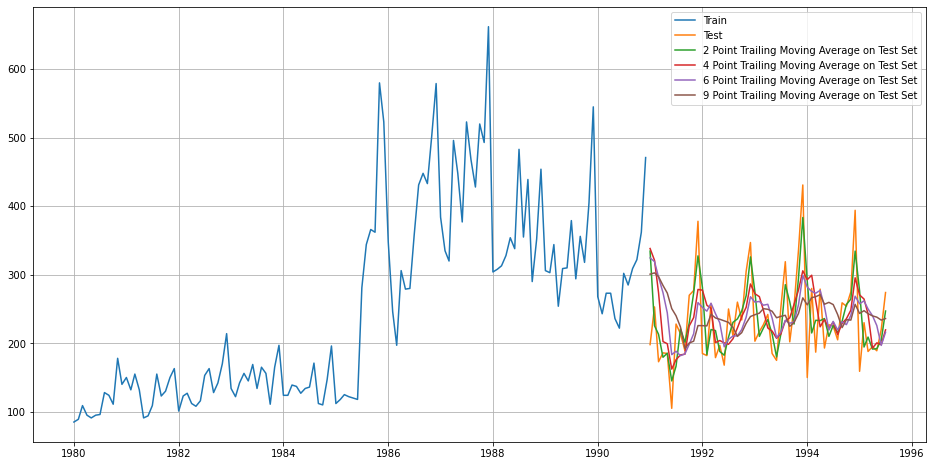

In [279]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Shoe_Sales'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [280]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 45.949
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 57.873
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 63.457
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 67.724


Out of Linear regression, Naïve , Simple average & moving average , best performing model with lowest RMSE is 2 point moving average.

In [281]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf0 = pd.concat([resultsDf0, resultsDf_4])
resultsDf0

Test RMSE
RegressionOnTime             266.276472
NaiveModel                   245.121306
SimpleAverageModel            63.984570
2pointTrailingMovingAverage   45.948736
4pointTrailingMovingAverage   57.872686
6pointTrailingMovingAverage   63.456893
9pointTrailingMovingAverage   67.723648

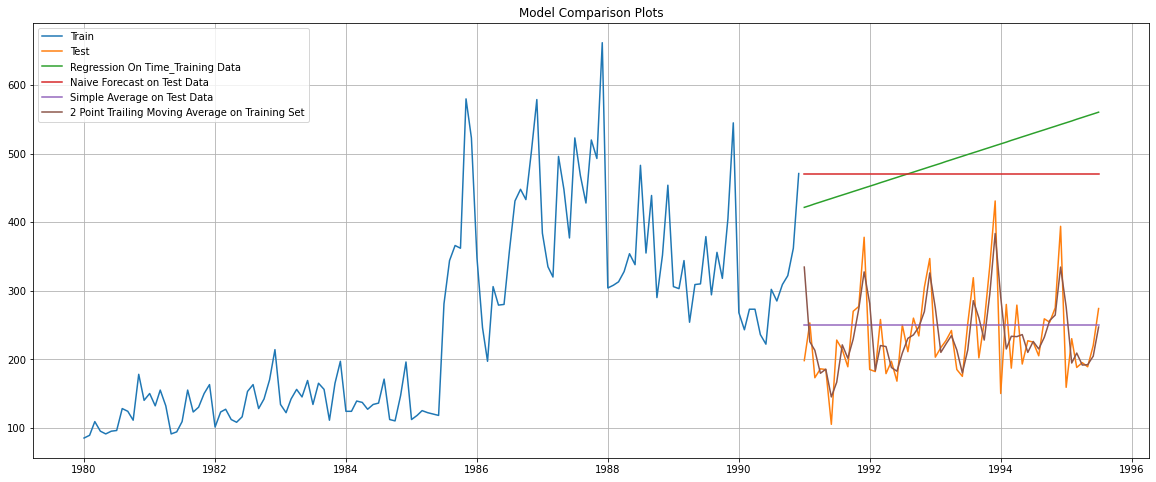

In [282]:
## Plotting on both Training and Test data

plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

Comparison plot shows the best fit model in brown color line for 2 point moving average appropriately fitting on the actual test values.

## Method 5 : SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES).

This method is suitable for forecasting data with no clear trend or seasonal pattern.


* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter 𝛼 is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

In [283]:
SES_train0 = train.copy()
SES_test0 = test.copy()

In [284]:
# create class
model_SES = SimpleExpSmoothing(SES_train0['Shoe_Sales'])

In [285]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [286]:
model_SES_autofit.params

{'smoothing_level': 0.6050493159152485,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.82865380886527,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Alpha value is 0.60

In [287]:
# Using the fitted model on the training set to forecast on the test set
SES_test0['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test0.head()

Shoe_Sales     predict
YearMonth                         
1991-01-01         198  420.229871
1991-02-01         253  420.229871
1991-03-01         173  420.229871
1991-04-01         186  420.229871
1991-05-01         185  420.229871

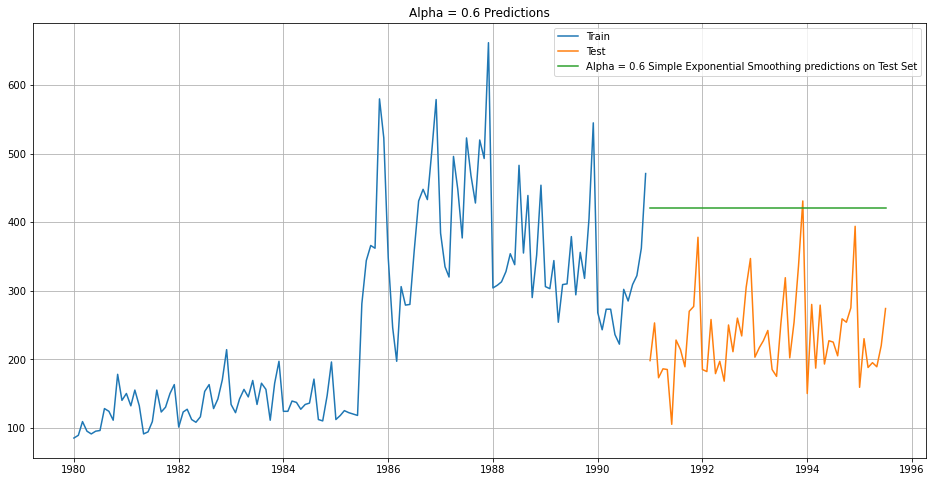

In [288]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(16,8))
plt.plot(SES_train0['Shoe_Sales'], label='Train')
plt.plot(SES_test0['Shoe_Sales'], label='Test')

plt.plot(SES_test0['predict'], label='Alpha = 0.6 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.6 Predictions');

In [289]:
rmse_model5_test_0 = metrics.mean_squared_error(SES_test0['Shoe_Sales'],SES_test0['predict'],squared=False)
print("For Alpha = 0.6 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_0))

For Alpha = 0.6 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 196.405


In [290]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_0]},index=['Alpha=0.6,SimpleExponentialSmoothing'])

resultsDf0 = pd.concat([resultsDf0, resultsDf_5])
resultsDf0

Test RMSE
RegressionOnTime                      266.276472
NaiveModel                            245.121306
SimpleAverageModel                     63.984570
2pointTrailingMovingAverage            45.948736
4pointTrailingMovingAverage            57.872686
6pointTrailingMovingAverage            63.456893
9pointTrailingMovingAverage            67.723648
Alpha=0.6,SimpleExponentialSmoothing  196.404850

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [291]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_05 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_05

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [292]:
SES_test0

Shoe_Sales     predict
YearMonth                         
1991-01-01         198  420.229871
1991-02-01         253  420.229871
1991-03-01         173  420.229871
1991-04-01         186  420.229871
1991-05-01         185  420.229871
1991-06-01         105  420.229871
1991-07-01         228  420.229871
1991-08-01         214  420.229871
1991-09-01         189  420.229871
1991-10-01         270  420.229871
1991-11-01         277  420.229871
1991-12-01         378  420.229871
1992-01-01         185  420.229871
1992-02-01         182  420.229871
1992-03-01         258  420.229871
1992-04-01         179  420.229871
1992-05-01         197  420.229871
1992-06-01         168  420.229871
1992-07-01         250  420.229871
1992-08-01         211  420.229871
1992-09-01         260  420.229871
1992-10-01         234  420.229871
1992-11-01         305  420.229871
1992-12-01         347  420.229871
1993-01-01         203  420.229871
1993-02-01         217  420.229871
1993-03-01         227  420.229871
1993-04-01         242  420.229871
1993-05-01         185  420.229871
1993-06-01         175  420.229871
1993-07-01         252  420.229871
1993-08-01         319  420.229871
1993-09-01         202  420.229871
1993-10-01         254  420.229871
1993-11-01         336  420.229871
1993-12-01         431  420.229871
1994-01-01         150  420.229871
1994-02-01         280  420.229871
1994-03-01         187  420.229871
1994-04-01         279  420.229871
1994-05-01         193  420.229871
1994-06-01         227  420.229871
1994-07-01         225  420.229871
1994-08-01         205  420.229871
1994-09-01         259  420.229871
1994-10-01         254  420.229871
1994-11-01         275  420.229871
1994-12-01         394  420.229871
1995-01-01         159  420.229871
1995-02-01         230  420.229871
1995-03-01         188  420.229871
1995-04-01         195  420.229871
1995-05-01         189  420.229871
1995-06-01         220  420.229871
1995-07-01         274  420.229871

In [293]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train0['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test0['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train0['Shoe_Sales'],SES_train0['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test0['Shoe_Sales'],SES_test0['predict',i],squared=False)
    
    resultsDf_05 = resultsDf_05.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [294]:
resultsDf_05.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE   Test RMSE
0           0.3   74.555356  143.400350
1           0.4   73.062722  162.553211
2           0.5   72.200617  180.072484
3           0.6   71.902349  195.663327
4           0.7   72.131707  209.658339
5           0.8   72.846955  222.417584
6           0.9   74.023429  234.188166

0.3 alpha value seems to have low RMSE score than 0.6 alpha value.

## Method 6 - Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [295]:
DES_train = train.copy()
DES_test = test.copy()

In [296]:
model_DES = Holt(DES_train['Shoe_Sales'])

In [297]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [298]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Shoe_Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [299]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE    Test RMSE
0            0.3          0.3   84.736667   890.968504
8            0.4          0.3   82.660727  1132.467007
16           0.5          0.3   80.640171  1264.035724
1            0.3          0.4   88.649551  1270.606989
24           0.6          0.3   79.699269  1355.955337

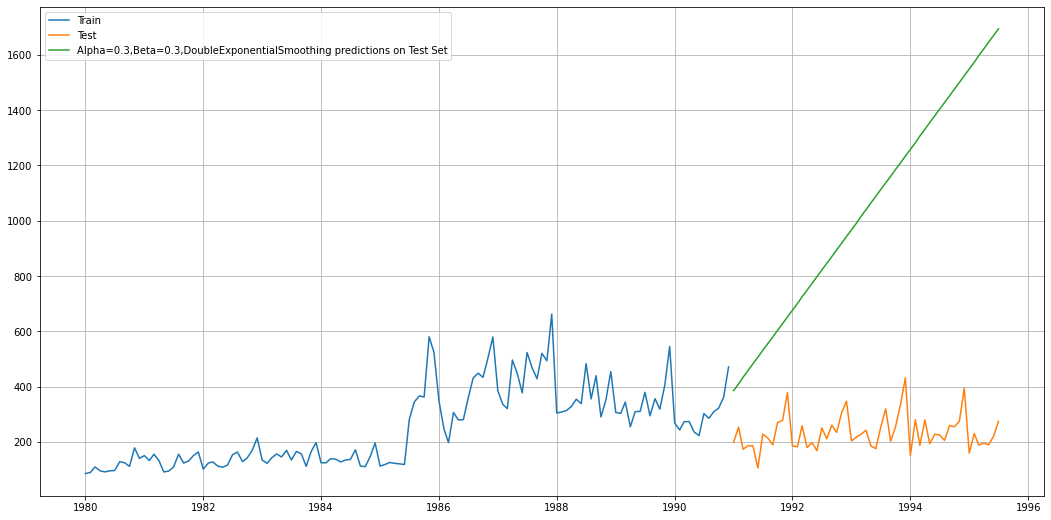

In [300]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Shoe_Sales'], label='Train')
plt.plot(DES_test['Shoe_Sales'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [301]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf0 = pd.concat([resultsDf0, resultsDf_7_1])
resultsDf0

Test RMSE
RegressionOnTime                               266.276472
NaiveModel                                     245.121306
SimpleAverageModel                              63.984570
2pointTrailingMovingAverage                     45.948736
4pointTrailingMovingAverage                     57.872686
6pointTrailingMovingAverage                     63.456893
9pointTrailingMovingAverage                     67.723648
Alpha=0.6,SimpleExponentialSmoothing           196.404850
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  890.968504

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [302]:
TES_train = train.copy()
TES_test = test.copy()

In [303]:
model_TES = ExponentialSmoothing(TES_train['Shoe_Sales'],trend='additive',seasonal='multiplicative',initialization_method='estimated')

In [304]:
model_TES_autofit = model_TES.fit()

In [305]:
model_TES_autofit.params

{'smoothing_level': 0.5711286329525818,
 'smoothing_trend': 0.00014781930867568429,
 'smoothing_seasonal': 0.20294733706077994,
 'damping_trend': nan,
 'initial_level': 116.35529208070726,
 'initial_trend': 0.11219854465675648,
 'initial_seasons': array([1.05679343, 1.01130311, 1.2337466 , 1.40663129, 1.32162715,
        1.07936886, 1.18018187, 1.50183082, 1.72369093, 1.4704132 ,
        1.75485304, 1.92101444]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [306]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Shoe_Sales  auto_predict
YearMonth                           
1991-01-01         198    261.342543
1991-02-01         253    243.085370
1991-03-01         173    256.996702
1991-04-01         186    270.198135
1991-05-01         185    267.375606

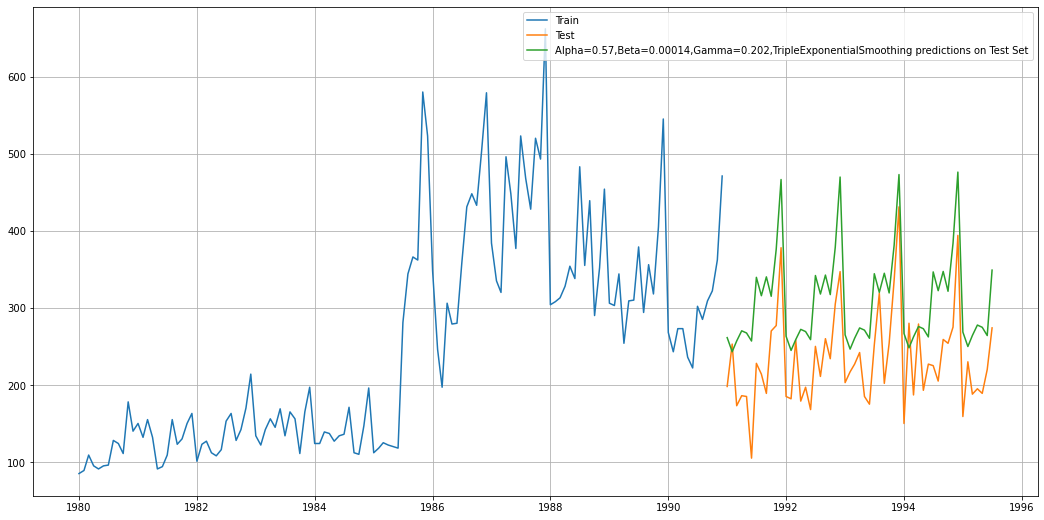

In [307]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [308]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.57,Beta=0.00014,Gamma=0.202, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.57,Beta=0.00014,Gamma=0.202, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 83.734


In [309]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExponentialSmoothing'])

resultsDf0 = pd.concat([resultsDf0, resultsDf_8_1])
resultsDf0

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.6,SimpleExponentialSmoothing                196.404850
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504
Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExpon...   83.734048

RMSE for Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExponentialSmoothing is 83 which is very less as compared to other methods.

In [310]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [311]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [312]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
51           0.1          0.6           0.2   74.696236  41.237522
91           0.1          1.0           0.2  101.394646  43.047089
44           0.1          0.5           0.5   94.006921  43.849368
50           0.1          0.6           0.1   70.879943  44.415011
37           0.1          0.4           0.8  120.751189  45.132153

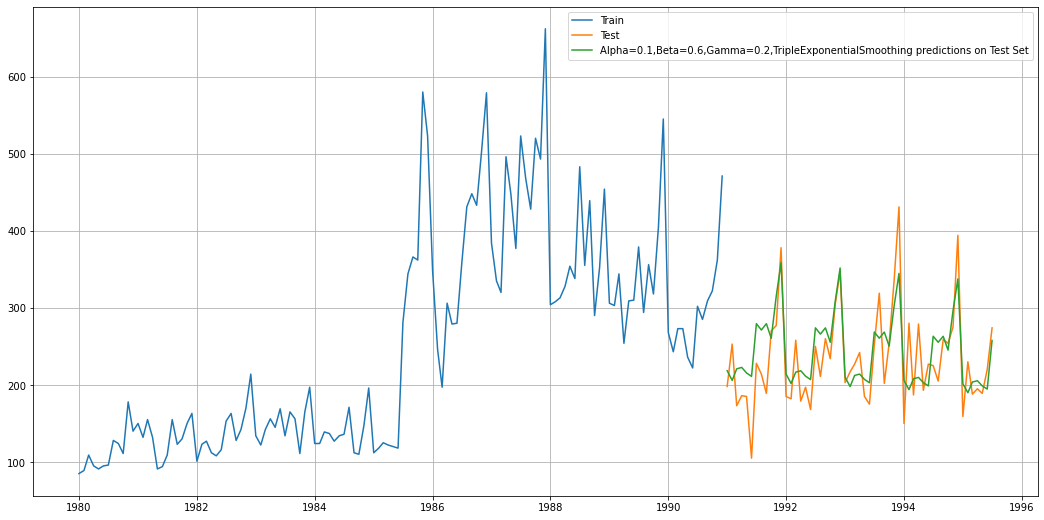

In [313]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.6, 0.2], label='Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [314]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf0 = pd.concat([resultsDf0, resultsDf_8_3])
resultsDf0

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.6,SimpleExponentialSmoothing                196.404850
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504
Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExpon...   83.734048
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.237522

In [315]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf0.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.237522
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
SimpleAverageModel                                   63.984570
9pointTrailingMovingAverage                          67.723648
Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExpon...   83.734048
Alpha=0.6,SimpleExponentialSmoothing                196.404850
NaiveModel                                          245.121306
RegressionOnTime                                    266.276472
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504

#### Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialSmoothing method is the best model whose RMSE is 41.2 which is very less as compared to other methods/models. 

### Full Model Forecasting

In [114]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.6,
                                                                 smoothing_seasonal=0.2)

In [115]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Shoe_Sales'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 65.72957833447327


In [116]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

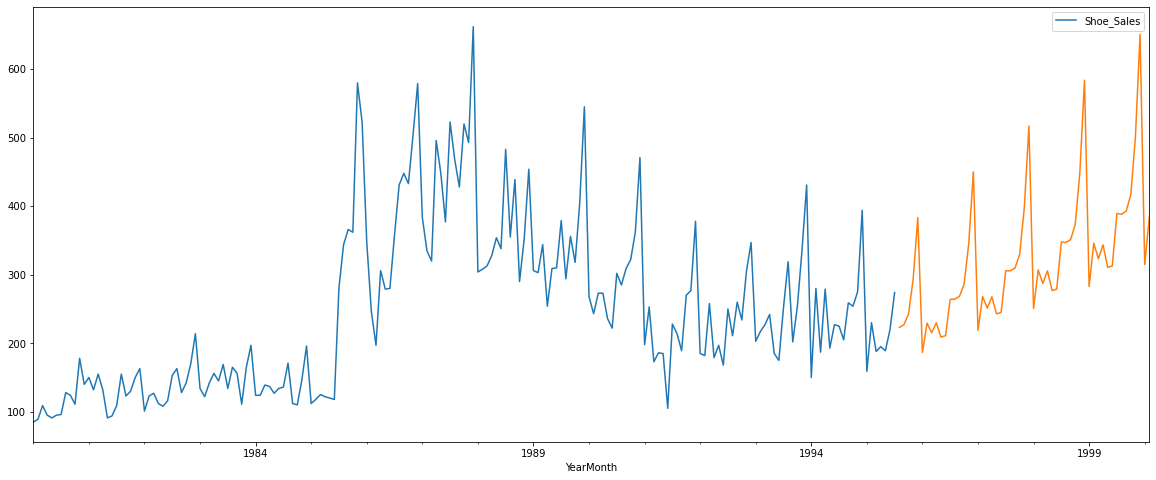

In [117]:
df.plot()
prediction_1.plot();

In [118]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01   93.929879  223.070867  352.211856
1995-09-01   97.890414  227.031403  356.172392
1995-10-01  113.444210  242.585199  371.726188
1995-11-01  164.320143  293.461131  422.602120
1995-12-01  254.106116  383.247105  512.388093

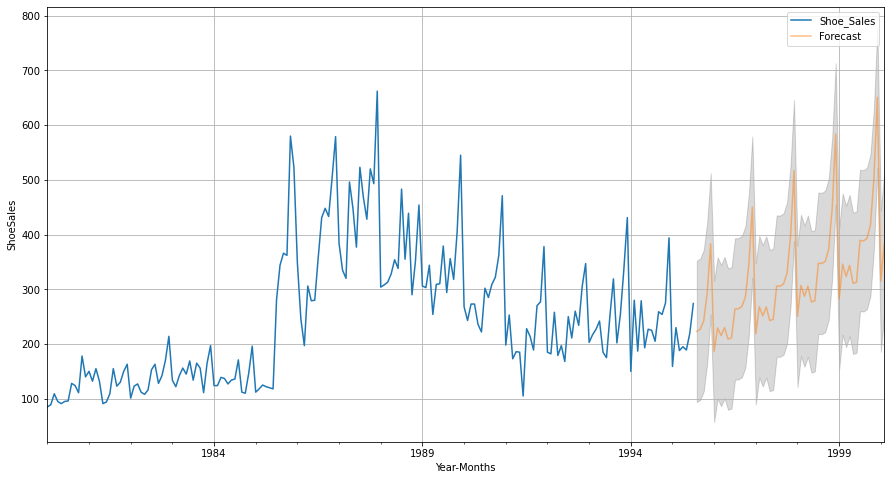

In [119]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('ShoeSales')
plt.legend(loc='best')
plt.grid()
plt.show()

The above picture shows an increasing trend of sales till 2000

## Soft Drink data

## Model 1: Linear Regression
For this particular linear regression, we are going to regress the 'Soft Drink' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [239]:
train_time1 = [i+1 for i in range(len(train1))]
test_time1 = [i+133 for i in range(len(test1))]
print('Training Time instance','\n',train_time1)
print('Test Time instance','\n',test_time1)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [240]:
LinearRegression_train1 = train1.copy()
LinearRegression_test1 = test1.copy()

In [241]:
LinearRegression_train1['Time'] = train_time1
LinearRegression_test1['Time'] = test_time1

print('First few rows of Training Data')
display(LinearRegression_train1.head())
print('Last few rows of Training Data')
display(LinearRegression_train1.tail())
print('First few rows of Test Data')
display(LinearRegression_test1.head())
print('Last few rows of Test Data')
display(LinearRegression_test1.tail())

First few rows of Training Data


SoftDrinkProduction  Time
YearMonth                            
1980-01-01                 1954     1
1980-02-01                 2302     2
1980-03-01                 3054     3
1980-04-01                 2414     4
1980-05-01                 2226     5

Last few rows of Training Data


SoftDrinkProduction  Time
YearMonth                            
1990-08-01                 3418   128
1990-09-01                 3604   129
1990-10-01                 3495   130
1990-11-01                 4163   131
1990-12-01                 4882   132

First few rows of Test Data


SoftDrinkProduction  Time
YearMonth                            
1991-01-01                 2211   133
1991-02-01                 3260   134
1991-03-01                 2992   135
1991-04-01                 2425   136
1991-05-01                 2707   137

Last few rows of Test Data


SoftDrinkProduction  Time
YearMonth                            
1995-03-01                 4067   183
1995-04-01                 4022   184
1995-05-01                 3937   185
1995-06-01                 4365   186
1995-07-01                 4290   187

Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛
  to build the model on the training data and test the model on the test data.

In [242]:
from sklearn.linear_model import LinearRegression 

In [243]:
lr = LinearRegression()

In [244]:
lr.fit(LinearRegression_train1[['Time']],LinearRegression_train1['SoftDrinkProduction'])

LinearRegression()

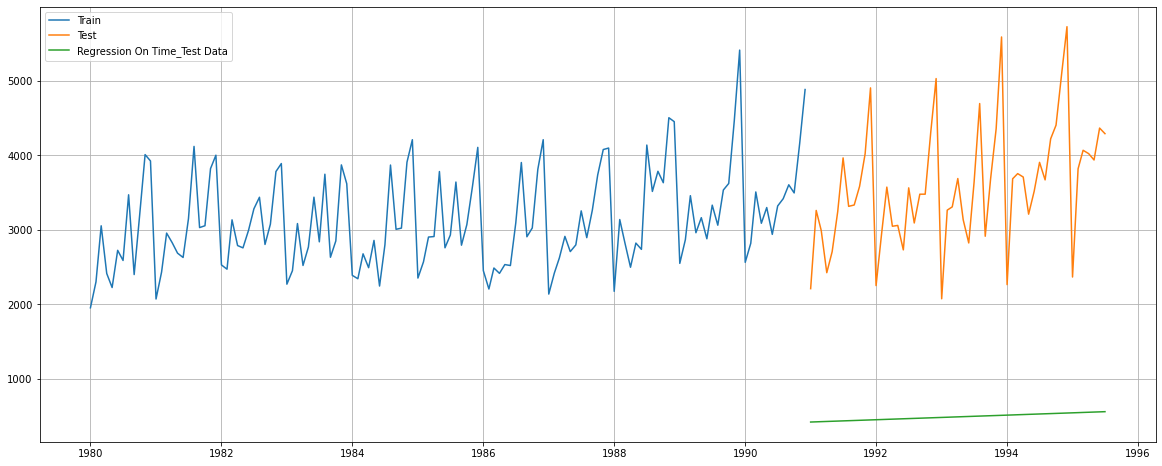

In [245]:
train_predictions_model2         = lr.predict(LinearRegression_train1[['Time']])
LinearRegression_train1['RegOnTime'] = train_predictions_model1

test_predictions_model2         = lr.predict(LinearRegression_test1[['Time']])
LinearRegression_test1['RegOnTime'] = test_predictions_model1

plt.plot(train1['SoftDrinkProduction'], label='Train')
plt.plot(test1['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test1['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

The predicted trend is increasing.

Defining the functions for calculating the accuracy metrics.

In [246]:
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test1['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3202.844 


The RSME on test data value is 3202.844, value is not very high but since seasonality is also not taken care by model this model is not suitable predictions on Soft Drink time series data.

In [247]:
resultsDf00 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf00

Test RMSE
RegressionOnTime  3202.844447

## Model 2: Naive Approach:  $\hat{y}_{t+1} = y_t$
 
For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [152]:
NaiveModel_train = train1.copy()
NaiveModel_test = test1.copy()

In [153]:
NaiveModel_test['naive'] = np.asarray(train1['SoftDrinkProduction'])[len(np.asarray(train1['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

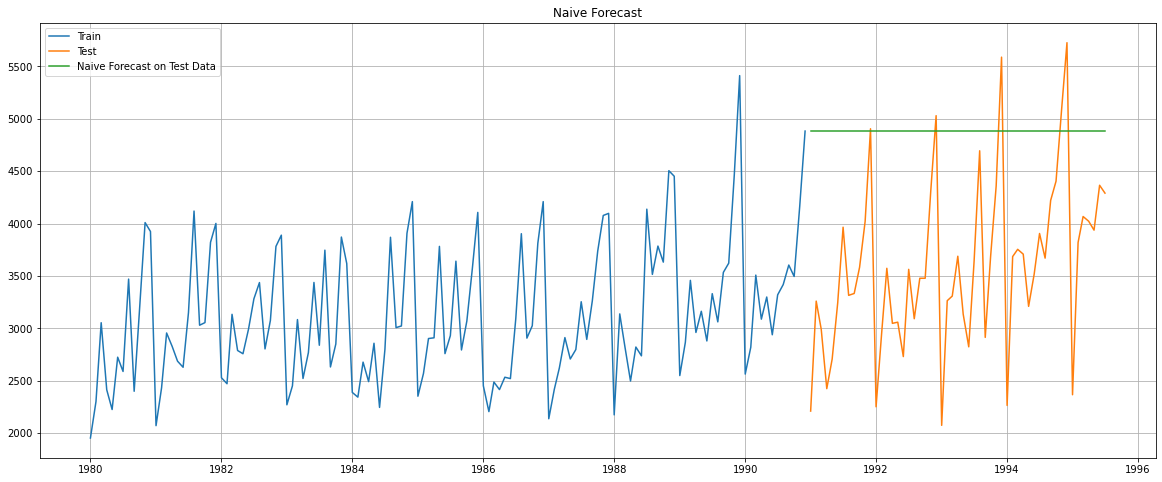

In [155]:
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test1['SoftDrinkProduction'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

In [156]:
rmse_model2_test = metrics.mean_squared_error(test1['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 1519.259


RSME is 1519.259 which is lower than the linear regression model. But this model being too simple is not taking care of seasonality.

In [248]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf00 = pd.concat([resultsDf00, resultsDf_2])
resultsDf00

Test RMSE
RegressionOnTime  3202.844447
NaiveModel        1519.259233

## Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [158]:
SimpleAverage_train = train1.copy()
SimpleAverage_test = test1.copy()

In [159]:
SimpleAverage_test['mean_forecast'] = train1['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

SoftDrinkProduction  mean_forecast
YearMonth                                     
1991-01-01                 2211    3124.166667
1991-02-01                 3260    3124.166667
1991-03-01                 2992    3124.166667
1991-04-01                 2425    3124.166667
1991-05-01                 2707    3124.166667

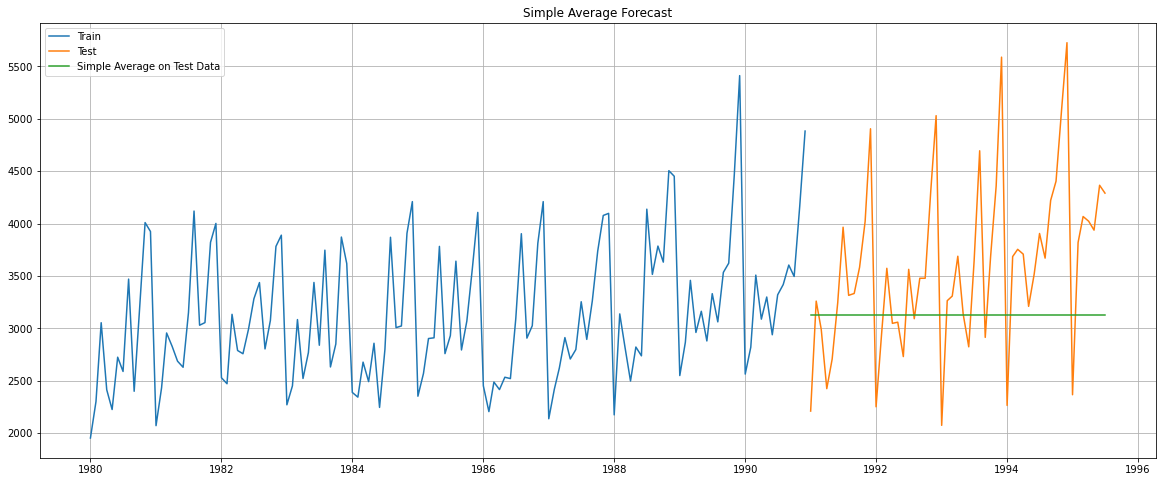

In [160]:
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

The plot shows a flat line

In [161]:
rmse_model3_test = metrics.mean_squared_error(test1['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 934.353


RMSE is 934.353 which is less than Naïve model & regression model but without seasonality component.

In [249]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf00 = pd.concat([resultsDf00, resultsDf_3])
resultsDf00

Test RMSE
RegressionOnTime    3202.844447
NaiveModel          1519.259233
SimpleAverageModel   934.353358

## Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [163]:
MovingAverage = df1.copy()
MovingAverage.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

In [164]:
MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

MovingAverage.head()

SoftDrinkProduction  Trailing_2  Trailing_4  Trailing_6  \
YearMonth                                                             
1980-01-01                 1954         NaN         NaN         NaN   
1980-02-01                 2302      2128.0         NaN         NaN   
1980-03-01                 3054      2678.0         NaN         NaN   
1980-04-01                 2414      2734.0      2431.0         NaN   
1980-05-01                 2226      2320.0      2499.0         NaN   

            Trailing_9  
YearMonth               
1980-01-01         NaN  
1980-02-01         NaN  
1980-03-01         NaN  
1980-04-01         NaN  
1980-05-01         NaN

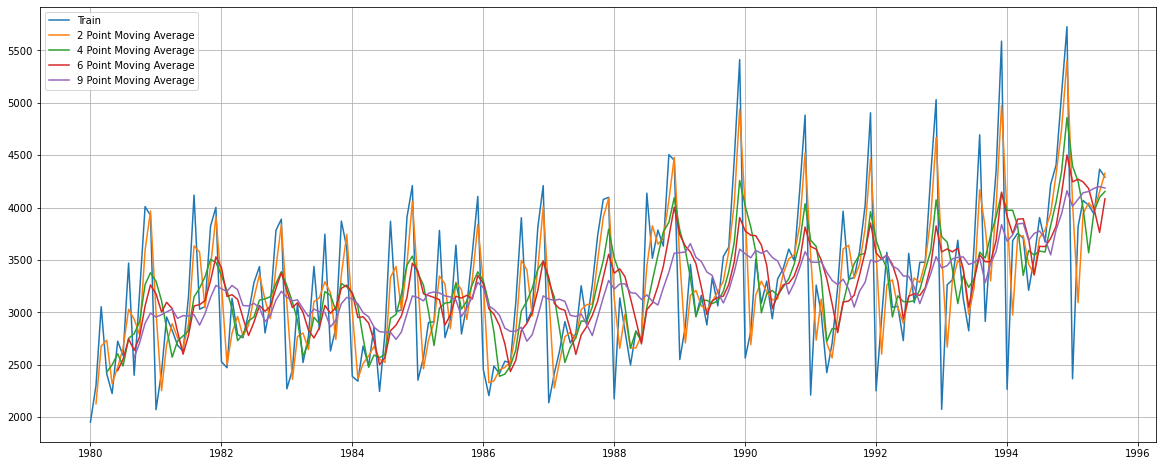

In [165]:
## Plotting on the whole data

plt.plot(MovingAverage['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Considering criteria that testing data should start from 1991 onwards, training and testing data is
prepared.

In [166]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

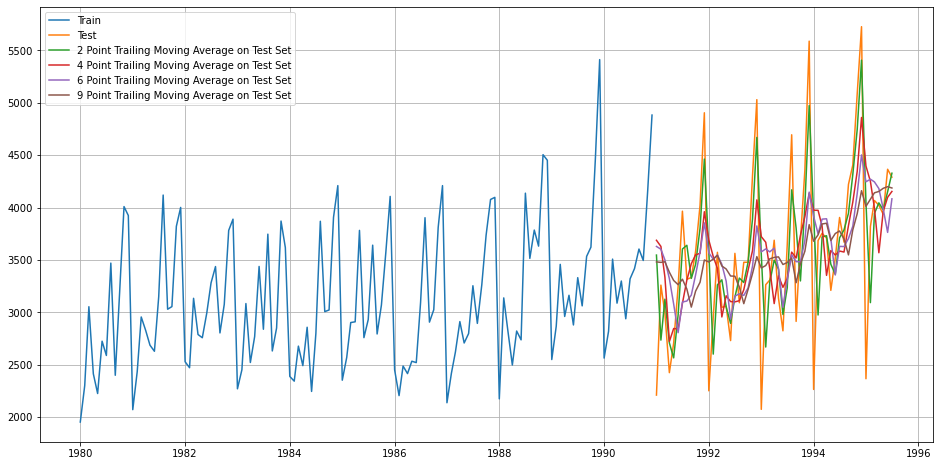

In [167]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [168]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test1['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test1['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test1['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test1['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 556.725
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 687.182
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 710.514
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 735.890


Out of Linear regression, Naïve , Simple average & moving average , best performing model with lowest RMSE is 2 point moving average.

In [250]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf00 = pd.concat([resultsDf00, resultsDf_4])
resultsDf00

Test RMSE
RegressionOnTime             3202.844447
NaiveModel                   1519.259233
SimpleAverageModel            934.353358
2pointTrailingMovingAverage   556.725418
4pointTrailingMovingAverage   687.181726
6pointTrailingMovingAverage   710.513877
9pointTrailingMovingAverage   735.889827

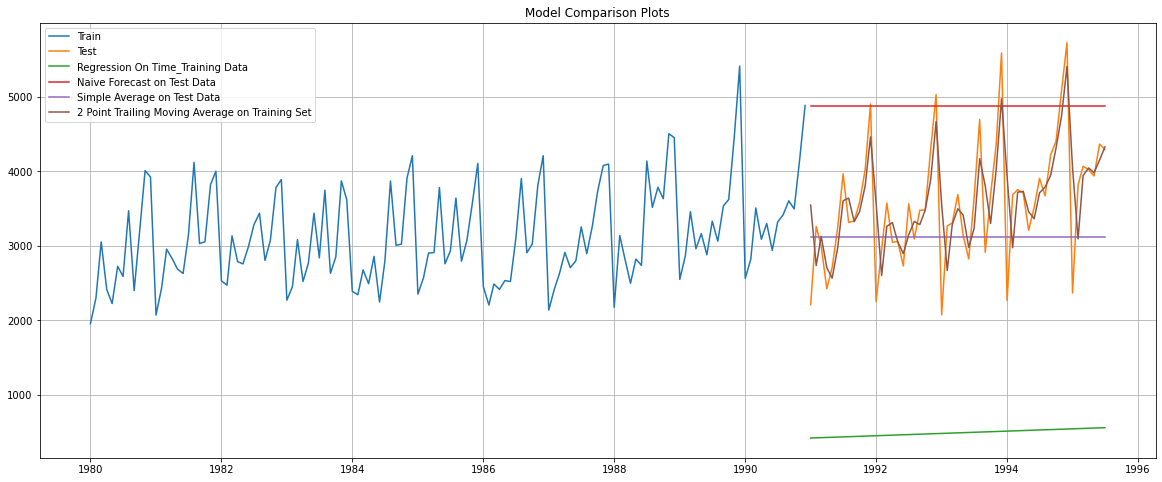

In [170]:
## Plotting on both Training and Test data

plt.plot(train1['SoftDrinkProduction'], label='Train')
plt.plot(test1['SoftDrinkProduction'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

Comparison plot shows the best fit model in brown color line for 2 point moving average appropriately fitting on the actual test values.

## Method 5 : SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES).

This method is suitable for forecasting data with no clear trend or seasonal pattern.


* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter 𝛼 is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

In [171]:
SES_train0 = train1.copy()
SES_test0 = test1.copy()

In [172]:
# create class
model_SES = SimpleExpSmoothing(SES_train0['SoftDrinkProduction'])

In [173]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [174]:
model_SES_autofit.params

{'smoothing_level': 0.21628856026090065,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2297.422897653051,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Alpha value is 0.21

In [175]:
# Using the fitted model on the training set to forecast on the test set
SES_test0['predict'] = model_SES_autofit.forecast(steps=len(test1))
SES_test0.head()

SoftDrinkProduction      predict
YearMonth                                   
1991-01-01                 2211  3853.781071
1991-02-01                 3260  3853.781071
1991-03-01                 2992  3853.781071
1991-04-01                 2425  3853.781071
1991-05-01                 2707  3853.781071

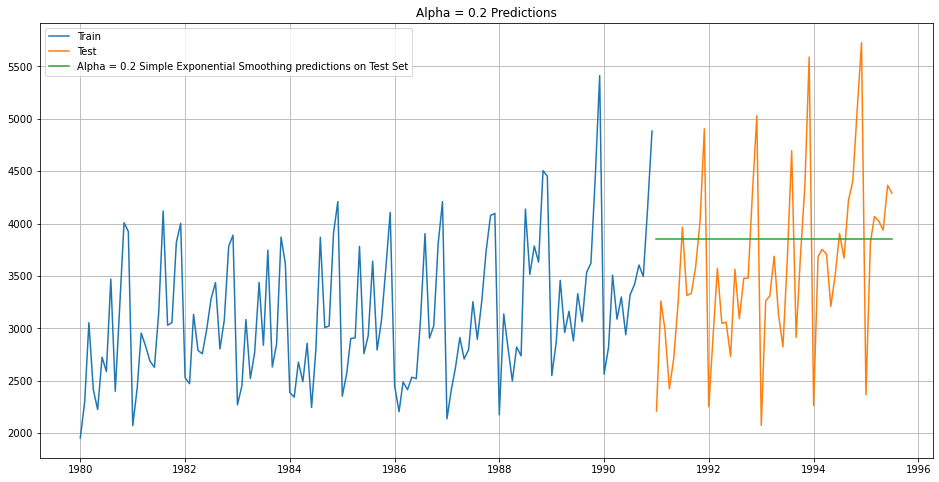

In [176]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(16,8))
plt.plot(SES_train0['SoftDrinkProduction'], label='Train')
plt.plot(SES_test0['SoftDrinkProduction'], label='Test')

plt.plot(SES_test0['predict'], label='Alpha = 0.2 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.2 Predictions');

In [177]:
rmse_model5_test_0 = metrics.mean_squared_error(SES_test0['SoftDrinkProduction'],SES_test0['predict'],squared=False)
print("For Alpha = 0.2 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_0))

For Alpha = 0.2 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 847.635


In [251]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_0]},index=['Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf00 = pd.concat([resultsDf00, resultsDf_5])
resultsDf00

Test RMSE
RegressionOnTime                      3202.844447
NaiveModel                            1519.259233
SimpleAverageModel                     934.353358
2pointTrailingMovingAverage            556.725418
4pointTrailingMovingAverage            687.181726
6pointTrailingMovingAverage            710.513877
9pointTrailingMovingAverage            735.889827
Alpha=0.2,SimpleExponentialSmoothing   847.635259

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [179]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_05 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_05

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [180]:
SES_test0

SoftDrinkProduction      predict
YearMonth                                   
1991-01-01                 2211  3853.781071
1991-02-01                 3260  3853.781071
1991-03-01                 2992  3853.781071
1991-04-01                 2425  3853.781071
1991-05-01                 2707  3853.781071
1991-06-01                 3244  3853.781071
1991-07-01                 3965  3853.781071
1991-08-01                 3315  3853.781071
1991-09-01                 3333  3853.781071
1991-10-01                 3583  3853.781071
1991-11-01                 4021  3853.781071
1991-12-01                 4904  3853.781071
1992-01-01                 2252  3853.781071
1992-02-01                 2952  3853.781071
1992-03-01                 3573  3853.781071
1992-04-01                 3048  3853.781071
1992-05-01                 3059  3853.781071
1992-06-01                 2731  3853.781071
1992-07-01                 3563  3853.781071
1992-08-01                 3092  3853.781071
1992-09-01                 3478  3853.781071
1992-10-01                 3478  3853.781071
1992-11-01                 4308  3853.781071
1992-12-01                 5029  3853.781071
1993-01-01                 2075  3853.781071
1993-02-01                 3264  3853.781071
1993-03-01                 3308  3853.781071
1993-04-01                 3688  3853.781071
1993-05-01                 3136  3853.781071
1993-06-01                 2824  3853.781071
1993-07-01                 3644  3853.781071
1993-08-01                 4694  3853.781071
1993-09-01                 2914  3853.781071
1993-10-01                 3686  3853.781071
1993-11-01                 4358  3853.781071
1993-12-01                 5587  3853.781071
1994-01-01                 2265  3853.781071
1994-02-01                 3685  3853.781071
1994-03-01                 3754  3853.781071
1994-04-01                 3708  3853.781071
1994-05-01                 3210  3853.781071
1994-06-01                 3517  3853.781071
1994-07-01                 3905  3853.781071
1994-08-01                 3670  3853.781071
1994-09-01                 4221  3853.781071
1994-10-01                 4404  3853.781071
1994-11-01                 5086  3853.781071
1994-12-01                 5725  3853.781071
1995-01-01                 2367  3853.781071
1995-02-01                 3819  3853.781071
1995-03-01                 4067  3853.781071
1995-04-01                 4022  3853.781071
1995-05-01                 3937  3853.781071
1995-06-01                 4365  3853.781071
1995-07-01                 4290  3853.781071

In [181]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train0['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test0['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train0['SoftDrinkProduction'],SES_train0['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test0['SoftDrinkProduction'],SES_test0['predict',i],squared=False)
    
    resultsDf_05 = resultsDf_05.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [182]:
resultsDf_05.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE    Test RMSE
0           0.1  648.758846   807.346865
1           0.2  645.186884   838.357158
2           0.3  650.458591   910.187416
3           0.4  656.803409  1005.179377
4           0.5  664.777265  1105.985227
5           0.6  674.988238  1203.565956
6           0.7  687.376817  1294.680933
7           0.8  701.579829  1378.198740
8           0.9  717.287681  1453.359494

0.1 alpha value seems to have low RMSE score than 0.2 alpha value.

## Method 6 - Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [183]:
DES_train = train1.copy()
DES_test = test1.copy()

In [184]:
model_DES = Holt(DES_train['SoftDrinkProduction'])

In [185]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [186]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['SoftDrinkProduction'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['SoftDrinkProduction'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [187]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE    Test RMSE
0            0.1          0.1  893.178173   982.938364
1            0.1          0.2  765.760815  1082.798709
10           0.2          0.1  721.404860  1524.533365
2            0.1          0.3  731.718292  1706.868339
20           0.3          0.1  698.165128  2306.003981

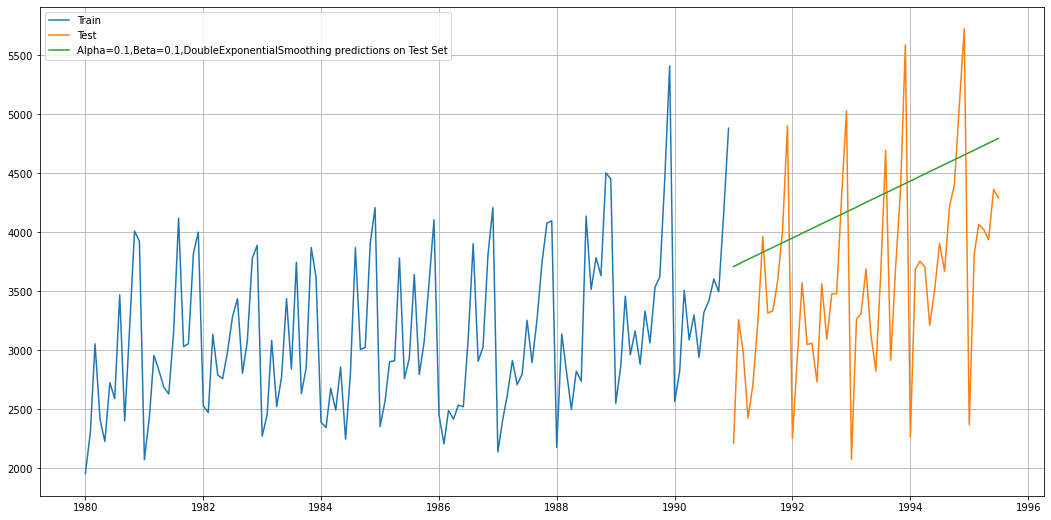

In [188]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['SoftDrinkProduction'], label='Train')
plt.plot(DES_test['SoftDrinkProduction'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [252]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf00 = pd.concat([resultsDf00, resultsDf_7_1])
resultsDf00

Test RMSE
RegressionOnTime                               3202.844447
NaiveModel                                     1519.259233
SimpleAverageModel                              934.353358
2pointTrailingMovingAverage                     556.725418
4pointTrailingMovingAverage                     687.181726
6pointTrailingMovingAverage                     710.513877
9pointTrailingMovingAverage                     735.889827
Alpha=0.2,SimpleExponentialSmoothing            847.635259
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing   982.938364

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [190]:
TES_train = train1.copy()
TES_test = test1.copy()

In [191]:
model_TES = ExponentialSmoothing(TES_train['SoftDrinkProduction'],trend='additive',seasonal='multiplicative',initialization_method='estimated')

In [192]:
model_TES_autofit = model_TES.fit()

In [193]:
model_TES_autofit.params

{'smoothing_level': 0.11128429736328378,
 'smoothing_trend': 0.04947326762762311,
 'smoothing_seasonal': 0.23037194388521623,
 'damping_trend': nan,
 'initial_level': 2803.0168193984414,
 'initial_trend': 10.486286228443715,
 'initial_seasons': array([0.80284001, 0.86968748, 1.08266033, 0.93954787, 0.96331944,
        0.98854326, 1.0654188 , 1.28504436, 1.0083707 , 1.0929922 ,
        1.36460606, 1.41709466]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [194]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test1))
TES_test.head()

SoftDrinkProduction  auto_predict
YearMonth                                    
1991-01-01                 2211   2564.869242
1991-02-01                 3260   2887.850537
1991-03-01                 2992   3300.056912
1991-04-01                 2425   3007.348662
1991-05-01                 2707   3213.743610

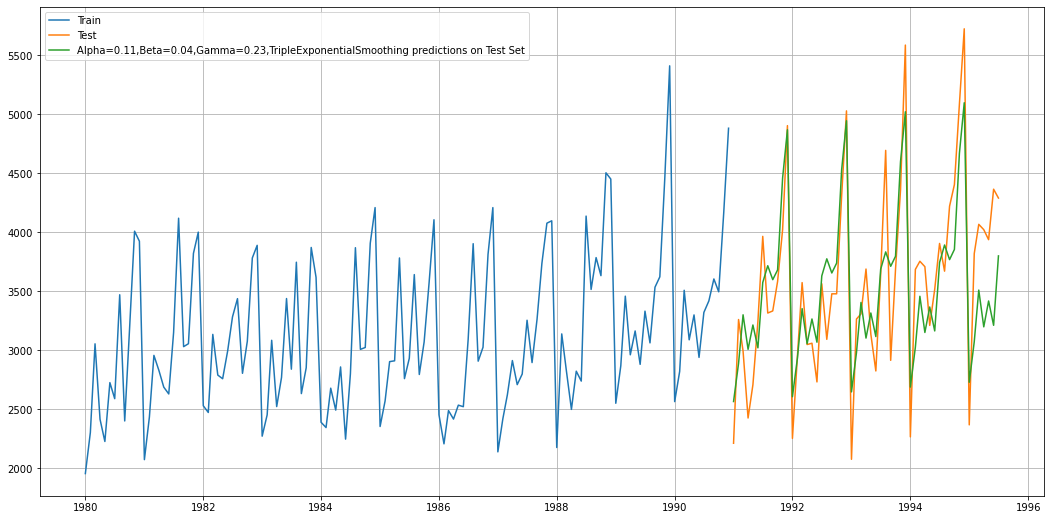

In [195]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['SoftDrinkProduction'], label='Train')
plt.plot(TES_test['SoftDrinkProduction'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [196]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.11,Beta=0.04,Gamma=0.23, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.11,Beta=0.04,Gamma=0.23, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 447.723


In [253]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponentialSmoothing'])

resultsDf00 = pd.concat([resultsDf00, resultsDf_8_1])
resultsDf00

Test RMSE
RegressionOnTime                                    3202.844447
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.2,SimpleExponentialSmoothing                 847.635259
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        982.938364
Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponenti...   447.722581

RMSE for Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponentialSmoothing is 447 which is very less as compared to other methods.

In [198]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [199]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['SoftDrinkProduction'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [200]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
451           0.5          0.1           0.2  344.935215  442.214551
180           0.2          0.7           0.1  389.554491  447.999128
362           0.4          0.3           0.3  373.320057  453.599111
562           0.6          0.1           0.3  356.289387  461.108902
340           0.4          0.1           0.1  342.285498  462.751707

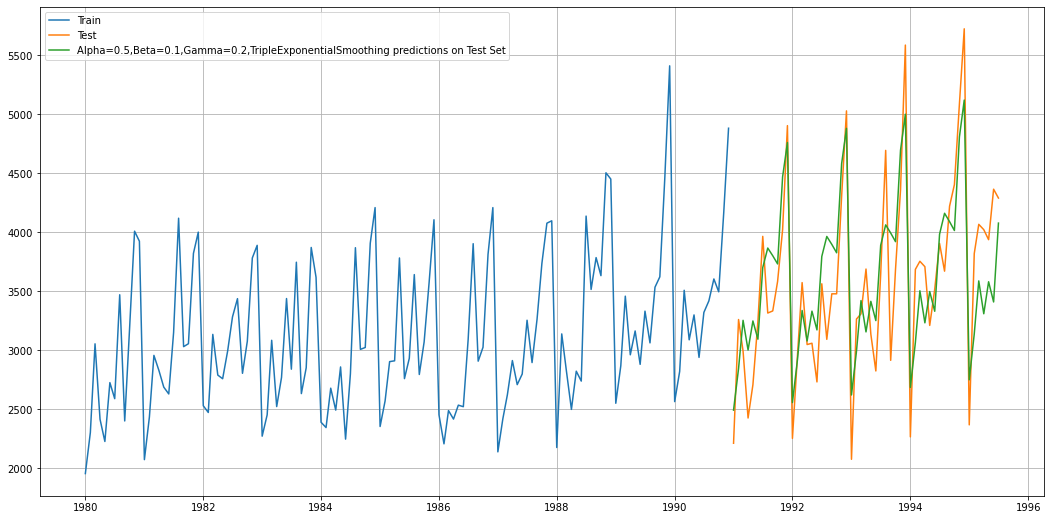

In [201]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['SoftDrinkProduction'], label='Train')
plt.plot(TES_test['SoftDrinkProduction'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.5, 0.1, 0.2], label='Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [254]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf00 = pd.concat([resultsDf00, resultsDf_8_3])
resultsDf00

Test RMSE
RegressionOnTime                                    3202.844447
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.2,SimpleExponentialSmoothing                 847.635259
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        982.938364
Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponenti...   447.722581
Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialS...   442.214551

In [255]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf00.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialS...   442.214551
Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponenti...   447.722581
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.2,SimpleExponentialSmoothing                 847.635259
SimpleAverageModel                                   934.353358
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        982.938364
NaiveModel                                          1519.259233
RegressionOnTime                                    3202.844447

#### Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing method is the best model whose RMSE is 442.2 which is very less as compared to other methods/models. 

### Full Model Forecasting

In [204]:
fullmodel1 = ExponentialSmoothing(df1,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.5,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)

In [205]:
RMSE_fullmodel1 = metrics.mean_squared_error(df1['SoftDrinkProduction'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 378.8789809329386


In [206]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test1))

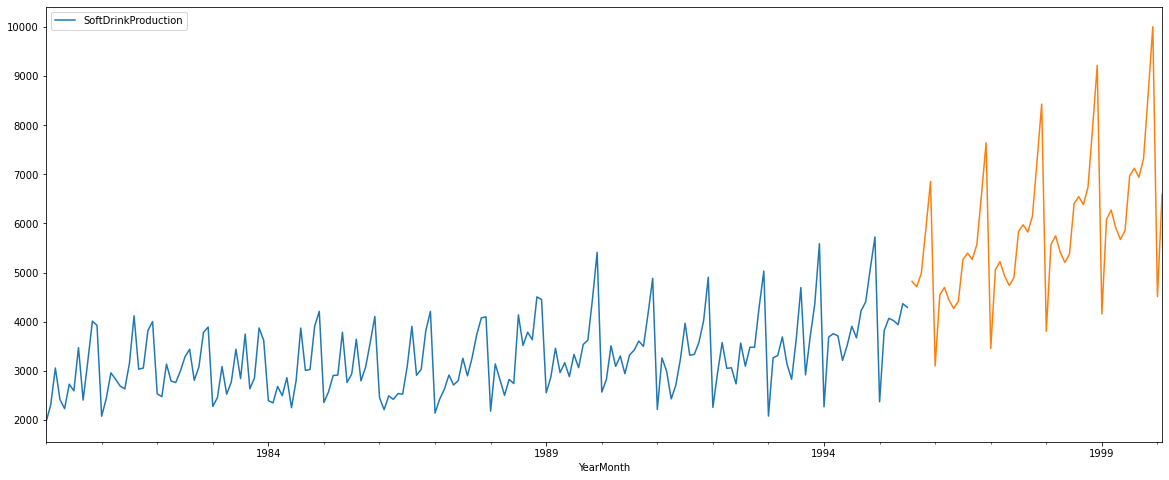

In [207]:
df1.plot()
prediction_1.plot();

In [208]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  4074.433203  4819.028412  5563.623622
1995-09-01  3964.461957  4709.057166  5453.652376
1995-10-01  4237.527942  4982.123152  5726.718362
1995-11-01  5154.522741  5899.117950  6643.713160
1995-12-01  6109.807328  6854.402538  7598.997748

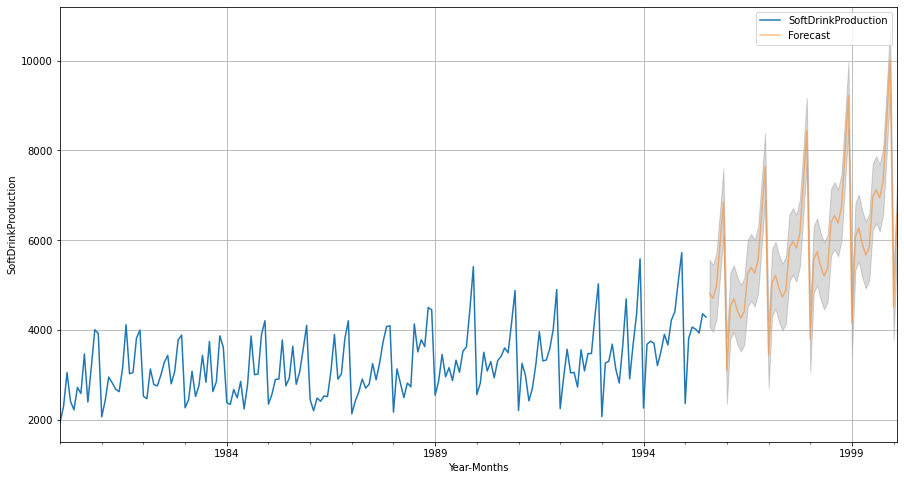

In [209]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SoftDrinkProduction')
plt.legend(loc='best')
plt.grid()
plt.show()

The above picture shows an increasing trend of sales till 2000

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## ShoeSales Data

## Check for stationarity of the whole Time Series data.

### Dicky Fuller Test

### Null Hypothesis H0- Series is not Stationary   
### Alternative Hypothesis H1-  Series is Stationary 

In [210]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

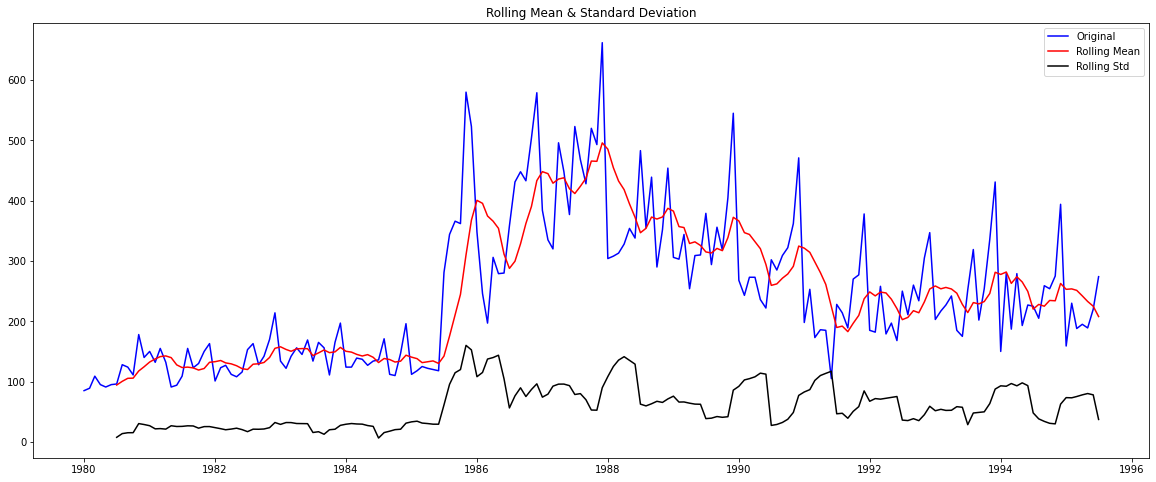

Results of Dickey-Fuller Test:
Test Statistic                  -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [212]:
test_stationarity(df['Shoe_Sales'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

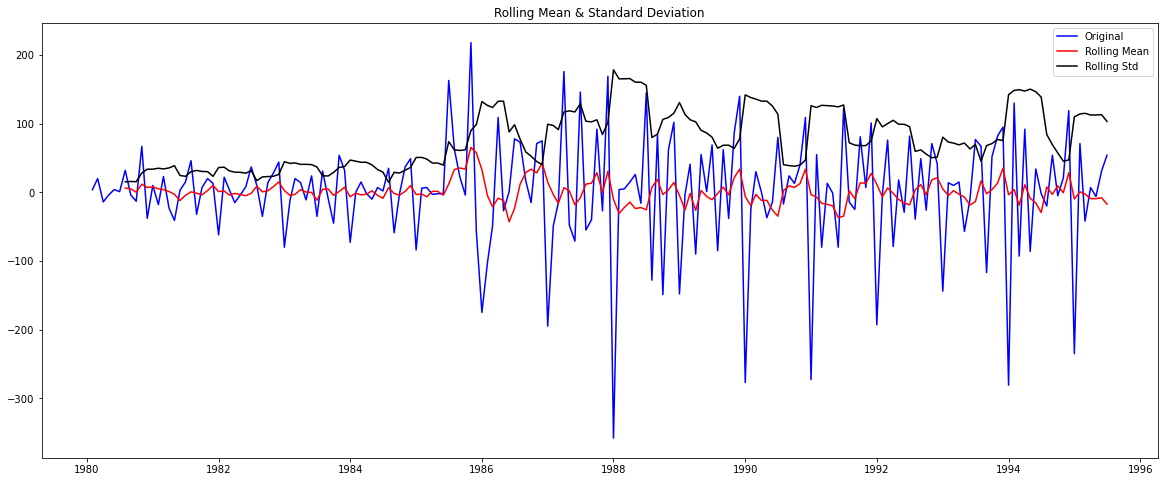

Results of Dickey-Fuller Test:
Test Statistic                  -3.479160
p-value                          0.008539
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [213]:
test_stationarity(df['Shoe_Sales'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [214]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

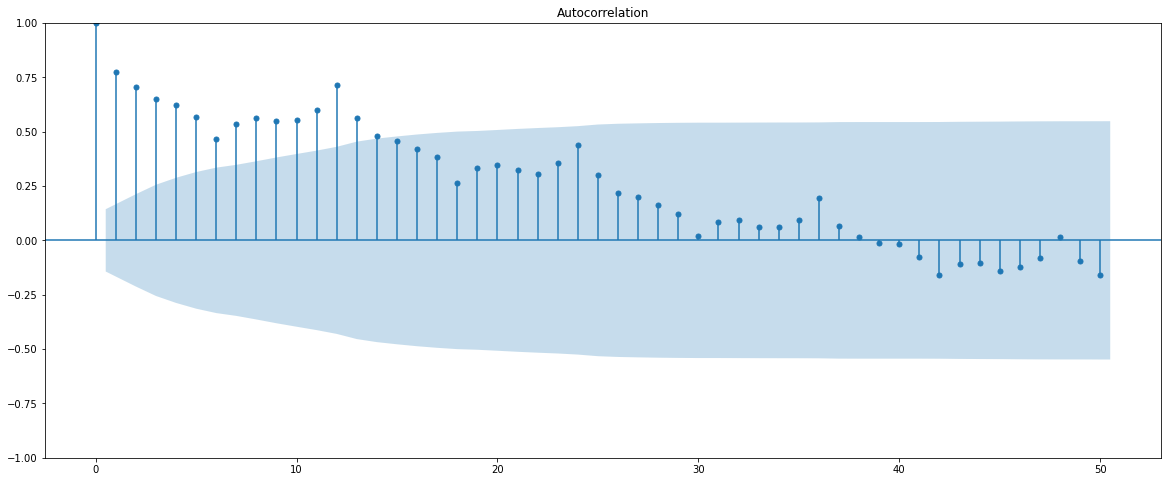

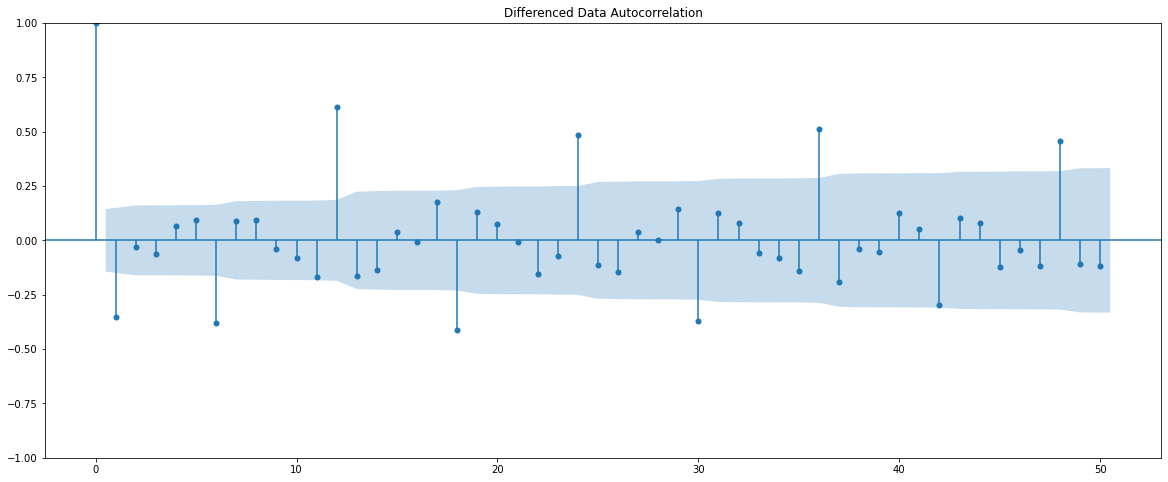

In [215]:
plot_acf(df['Shoe_Sales'],lags=50)
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

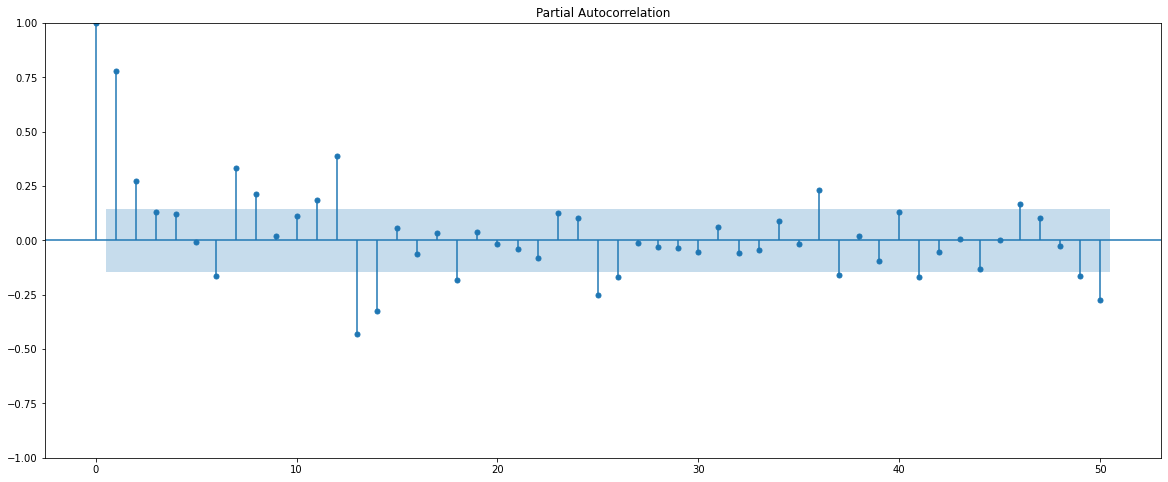

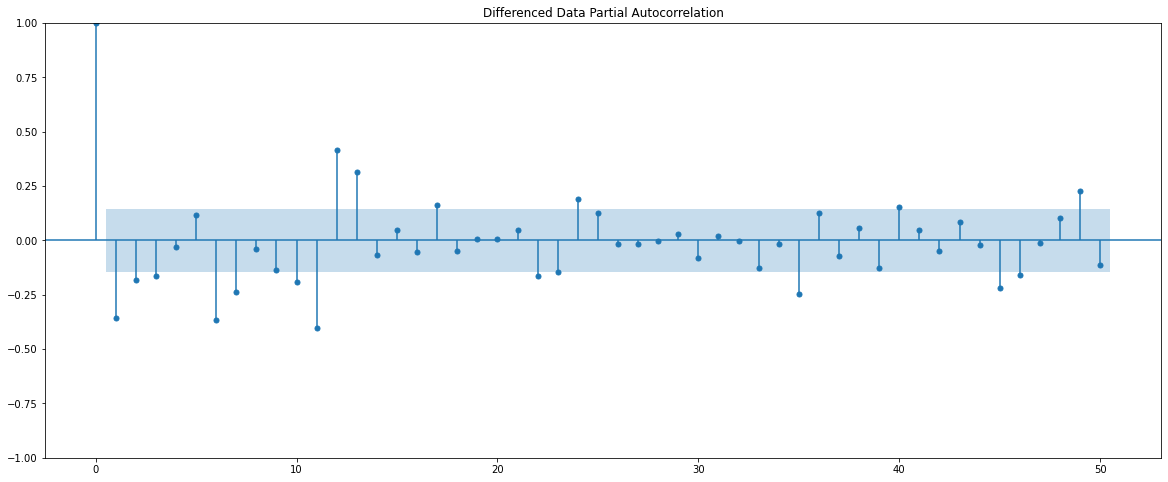

In [216]:
plot_pacf(df['Shoe_Sales'],lags=50)
plot_pacf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

In [217]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

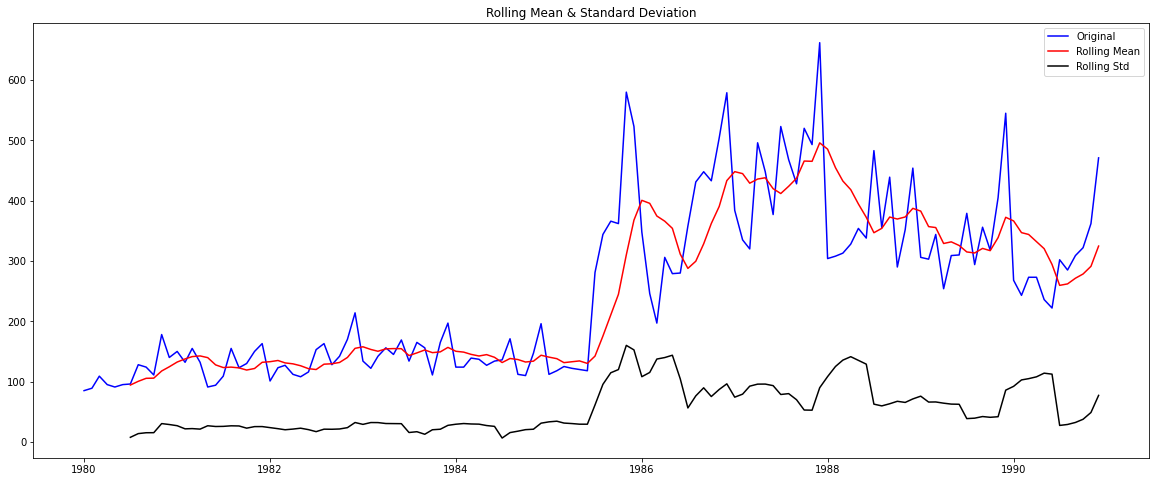

Results of Dickey-Fuller Test:
Test Statistic                  -1.361129
p-value                          0.600763
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [218]:
test_stationarity(train['Shoe_Sales'])

We see that the series is not stationary at $\alpha$ = 0.05.

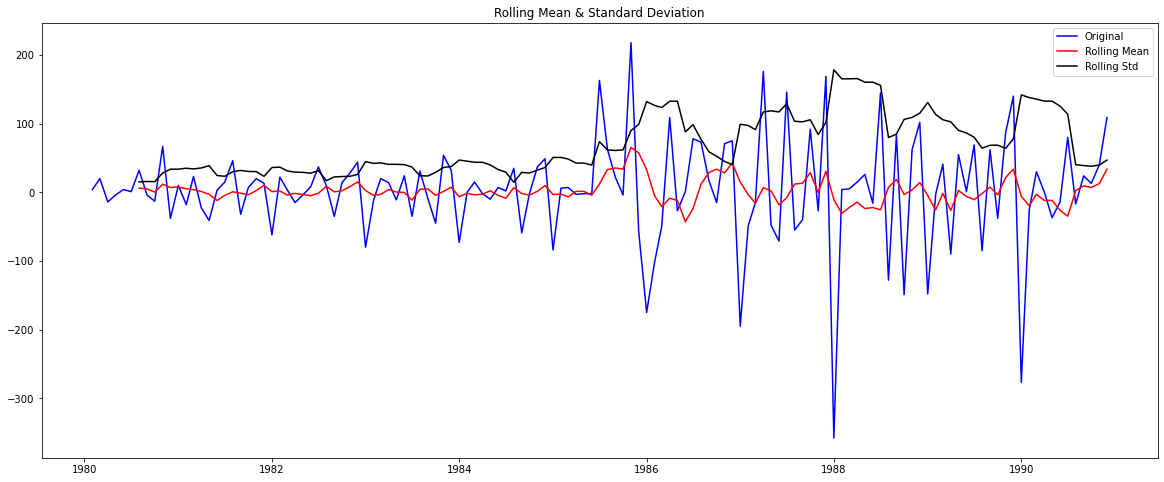

Results of Dickey-Fuller Test:
Test Statistic                  -3.144211
p-value                          0.023450
#Lags Used                      13.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64 



In [219]:
test_stationarity(train['Shoe_Sales'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05. As p value is less than 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there.

In [220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Soft Drink Data

## Check for stationarity of the whole Time Series data.

### Dicky Fuller Test

### Null Hypothesis H0- Series is not Stationary   
### Alternative Hypothesis H1-  Series is Stationary 

In [221]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

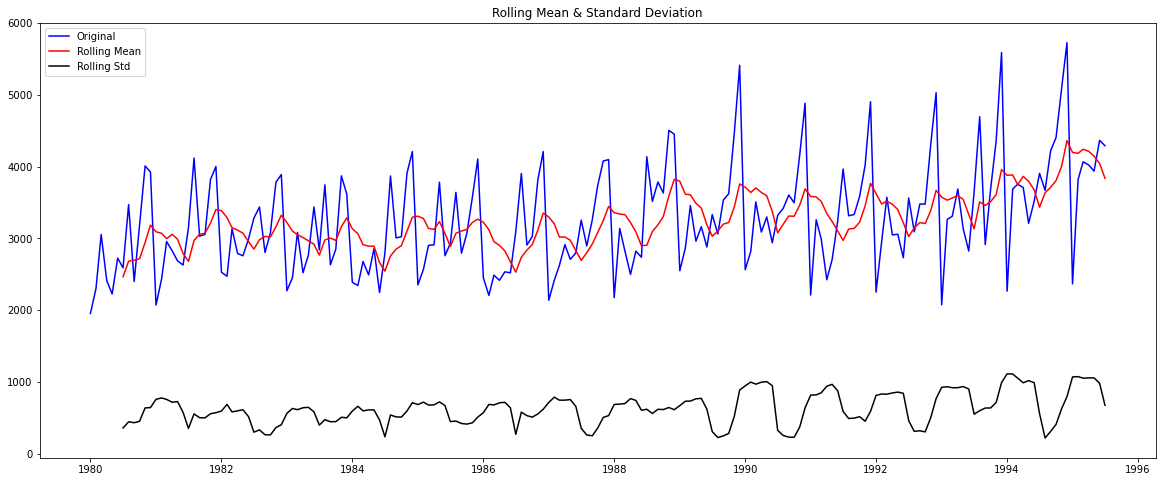

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [222]:
test_stationarity(df1['SoftDrinkProduction'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

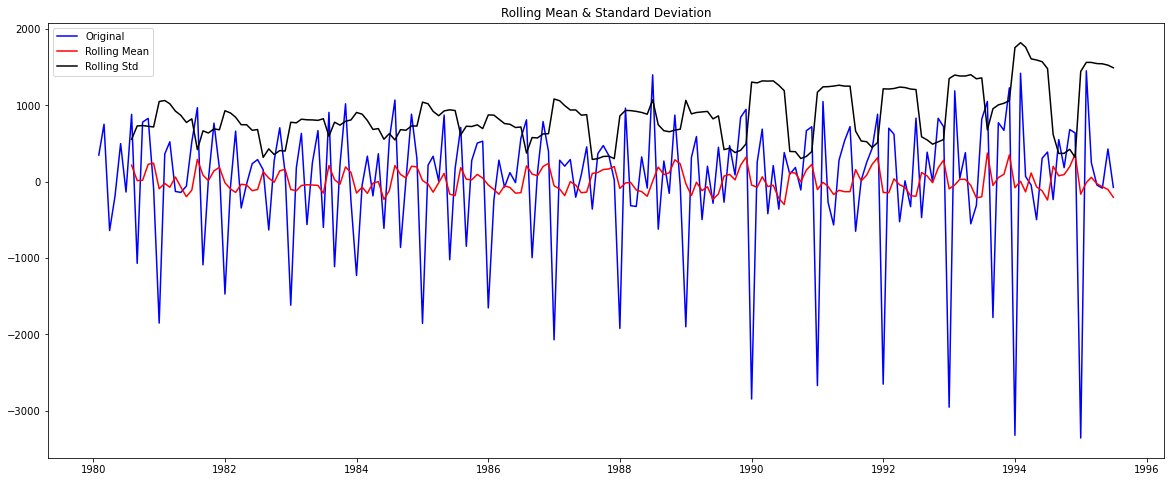

Results of Dickey-Fuller Test:
Test Statistic                -9.313527e+00
p-value                        1.033701e-15
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [223]:
test_stationarity(df1['SoftDrinkProduction'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [224]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

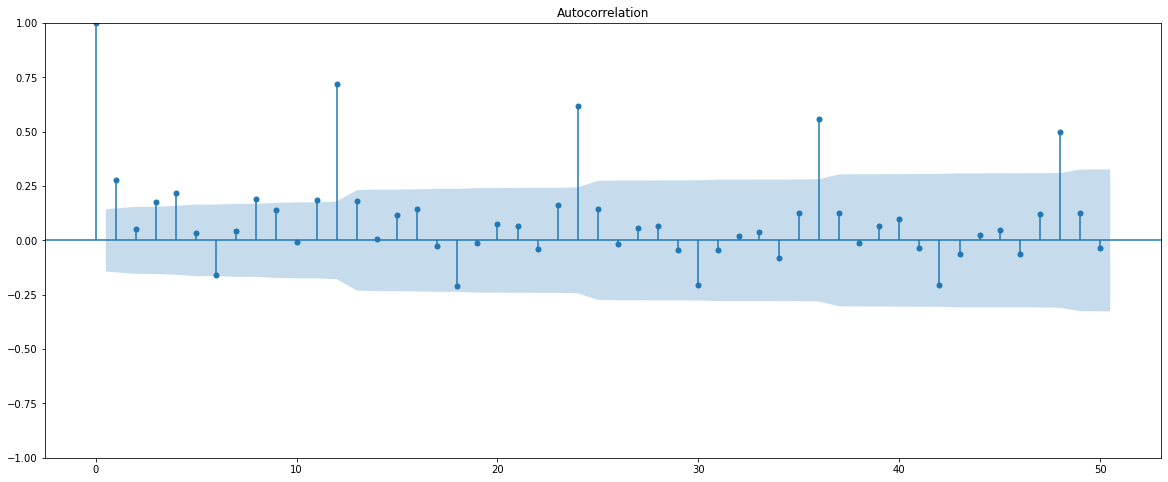

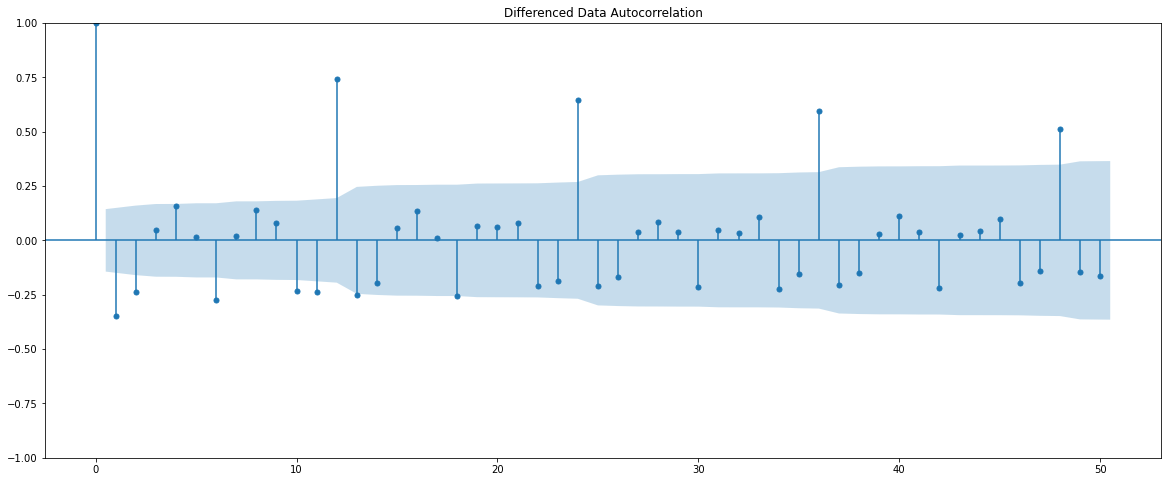

In [225]:
plot_acf(df1['SoftDrinkProduction'],lags=50)
plot_acf(df1['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

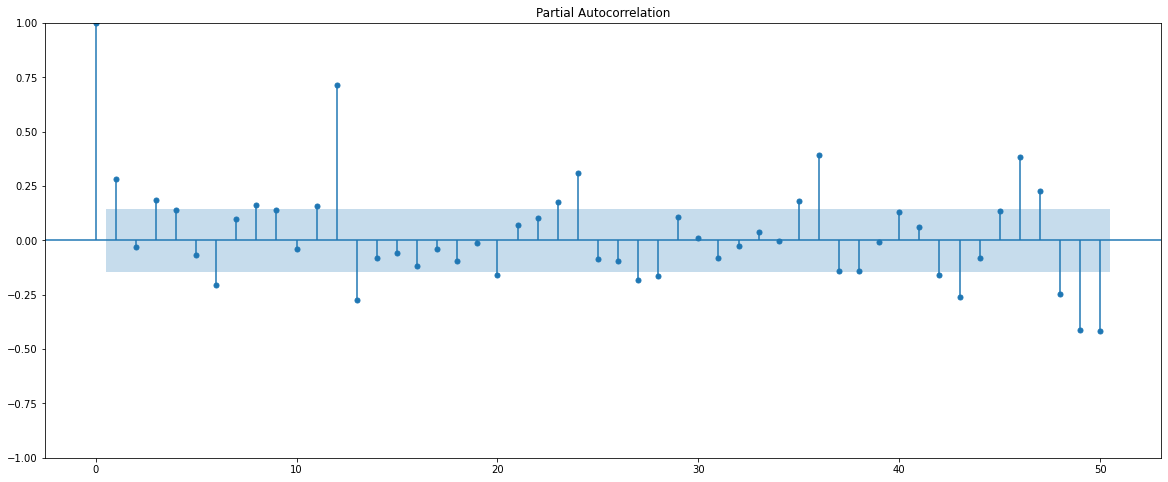

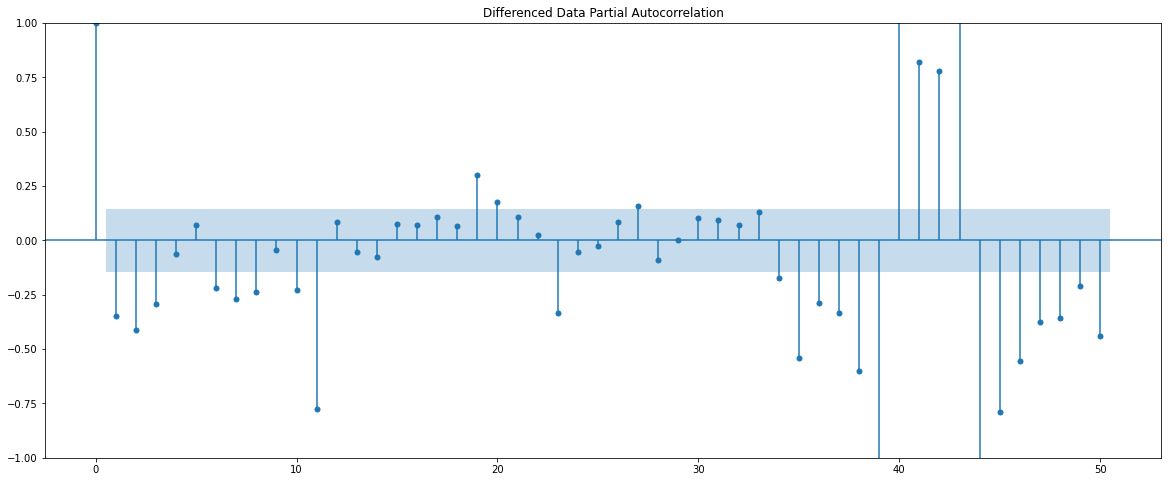

In [226]:
plot_pacf(df1['SoftDrinkProduction'],lags=50)
plot_pacf(df1['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

In [227]:
print(train1.shape)
print(test1.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

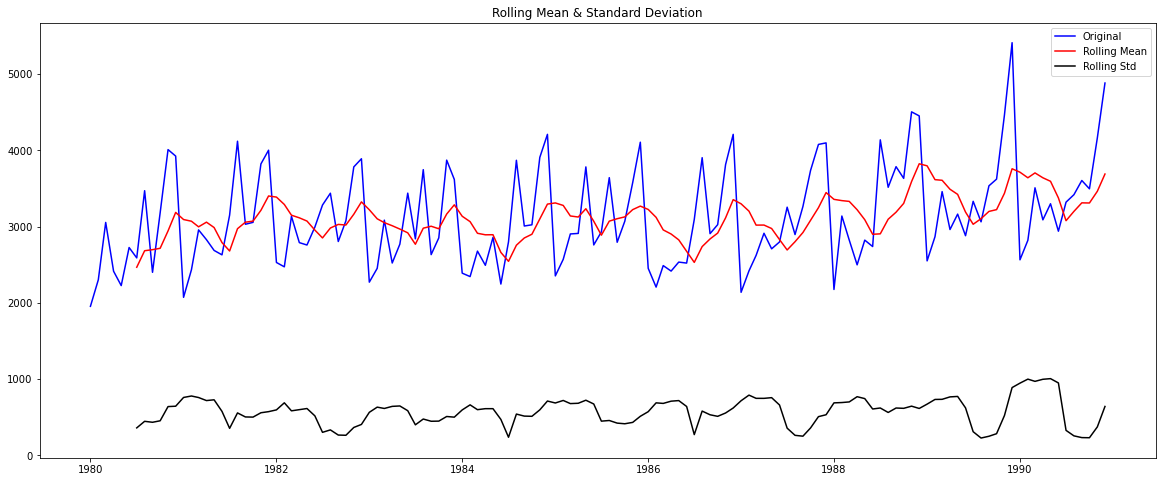

Results of Dickey-Fuller Test:
Test Statistic                  -0.990112
p-value                          0.756854
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [228]:
test_stationarity(train1['SoftDrinkProduction'])

We see that the series is not stationary at $\alpha$ = 0.05.

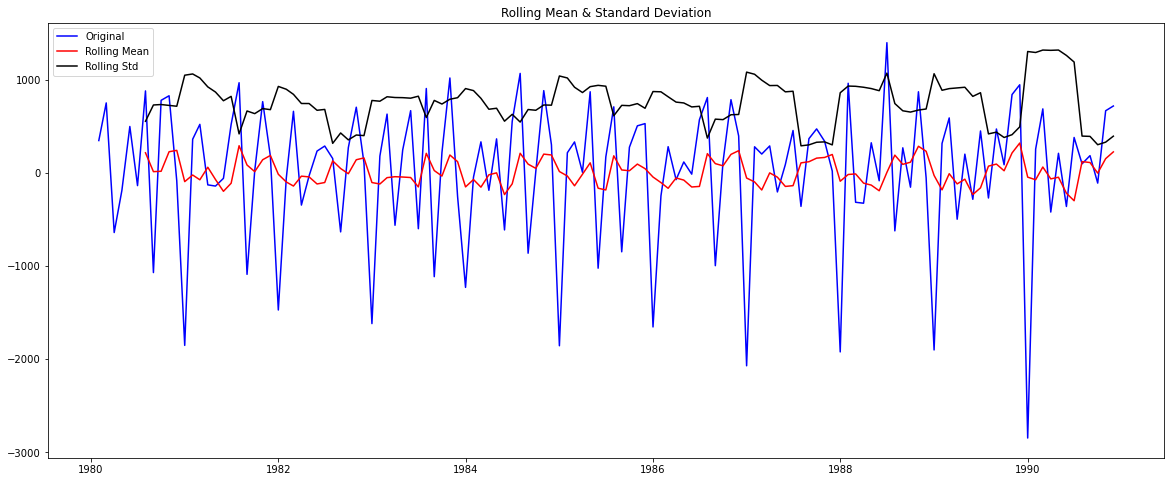

Results of Dickey-Fuller Test:
Test Statistic                -7.299886e+00
p-value                        1.347278e-10
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [229]:
test_stationarity(train1['SoftDrinkProduction'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05. As p value is less than 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there.

In [230]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## ShoeSales Data

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion

In [231]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [232]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [233]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

for param in pdq:
    ARIMA_model = sm.tsa.arima.ARIMA(train['Shoe_Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1508.2837722095956
ARIMA(0, 1, 1) - AIC:1497.0503224187928
ARIMA(0, 1, 2) - AIC:1494.9646053663382
ARIMA(1, 1, 0) - AIC:1501.64312420119
ARIMA(1, 1, 1) - AIC:1492.4871865078987
ARIMA(1, 1, 2) - AIC:1494.4238594574483
ARIMA(2, 1, 0) - AIC:1498.9504830259416
ARIMA(2, 1, 1) - AIC:1494.4314983035547
ARIMA(2, 1, 2) - AIC:1496.4107391765933


In [234]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
4  (1, 1, 1)  1492.487187
5  (1, 1, 2)  1494.423859
7  (2, 1, 1)  1494.431498
2  (0, 1, 2)  1494.964605
8  (2, 1, 2)  1496.410739
1  (0, 1, 1)  1497.050322
6  (2, 1, 0)  1498.950483
3  (1, 1, 0)  1501.643124
0  (0, 1, 0)  1508.283772

In [235]:
# Apply the ARIMA Model
# Top box -  Gives the overall summary
# Middle box -  Gives the coefficients and tells if the varibales are significant
# Lower box(Roots) - If the model is stable and good for forecasting.Between Imaginary & Real you draw a circle and check
# if the values/roots are inside the circle
auto_ARIMA = sm.tsa.arima.ARIMA(train['Shoe_Sales'], order=(1,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -743.244
Date:                Sat, 01 Apr 2023   AIC                           1492.487
Time:                        05:22:06   BIC                           1501.113
Sample:                    01-01-1980   HQIC                          1495.992
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4699      0.111      4.235      0.000       0.252       0.687
ma.L1         -0.8347      0.068    -12.261      0.000      -0.968      -0.701
sigma2      4944.0868    405.583     12.190      0.0

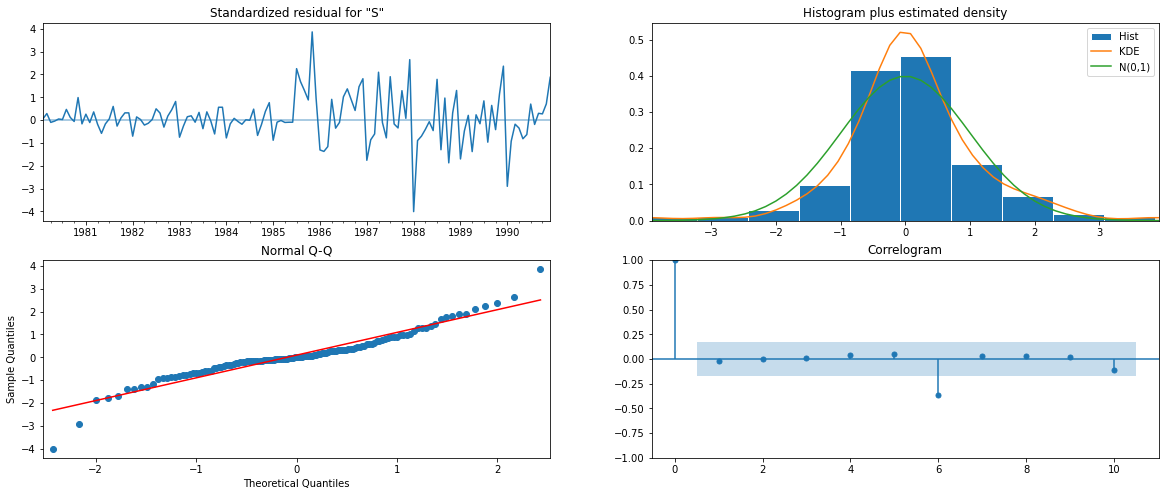

In [236]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [237]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [238]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_ARIMA,squared=False)
print(rmse)

142.8207304180148


In [316]:
resultsDf8 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)'])

resultsDf0 = pd.concat([resultsDf0, resultsDf8])
resultsDf0

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.6,SimpleExponentialSmoothing                196.404850
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504
Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExpon...   83.734048
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.237522
ARIMA(1,1,1)                                        142.820730

Ran the automated model getting a combination of different parameters of p and q in the range of 0 and 2. We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

Sort the AIC values in the ascending order to get the parameters for the minimum AIC value

The ARIMA model(1,1,1) is with the lowest AIC value and the test RMSE for the model is 142.82.

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

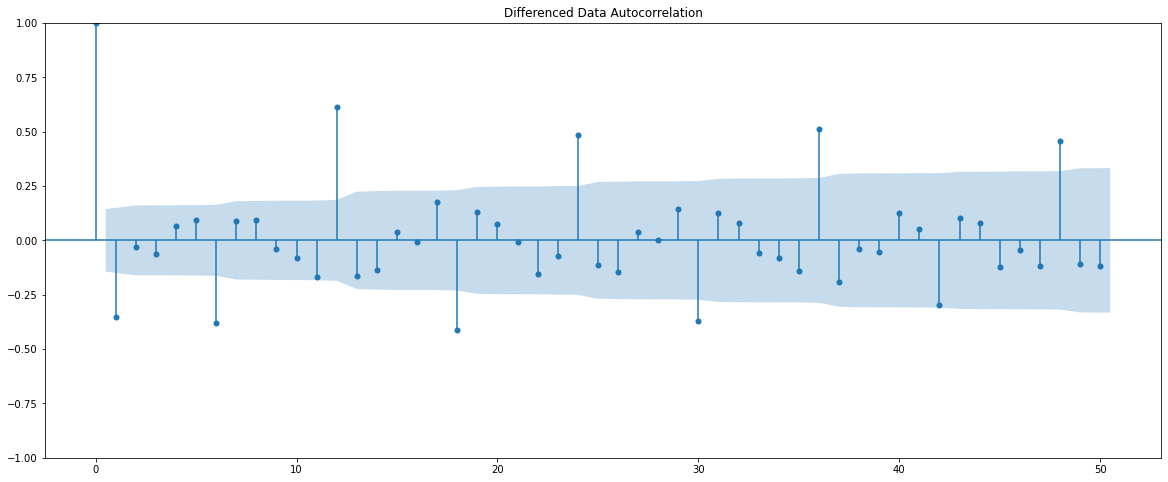

In [317]:
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [318]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [319]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [320]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  ## by force you can make it TS stationary
                                            enforce_invertibility=False) ## Alpha and Beta should be unique
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1426.336115722142
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1334.5305386143182
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1426.0492095804898
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1385.5711563547816
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1319.6061076038216
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1323.6330116787822
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1322.9358084091984
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1312.6718076780237
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1476.016777738159
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1405.25099478324
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1312.4363431163886
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1414.502823753847
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1363.4568516025129
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1299.1891899949705
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1309.8511217450098
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1311.0086038813722
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1288.9756630623745
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

In [321]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
80  (2, 1, 2)  (2, 0, 2, 6)  1280.778664
26  (0, 1, 2)  (2, 0, 2, 6)  1281.026602
53  (1, 1, 2)  (2, 0, 2, 6)  1282.065372
17  (0, 1, 1)  (2, 0, 2, 6)  1288.975663
50  (1, 1, 2)  (1, 0, 2, 6)  1289.791748

In [322]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -631.389
Date:                           Sat, 01 Apr 2023   AIC                           1280.779
Time:                                   06:28:59   BIC                           1305.561
Sample:                                        0   HQIC                          1290.839
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0600      0.474      0.127      0.899      -0.869       0.989
ar.L2          0.3977      0.161      2.464

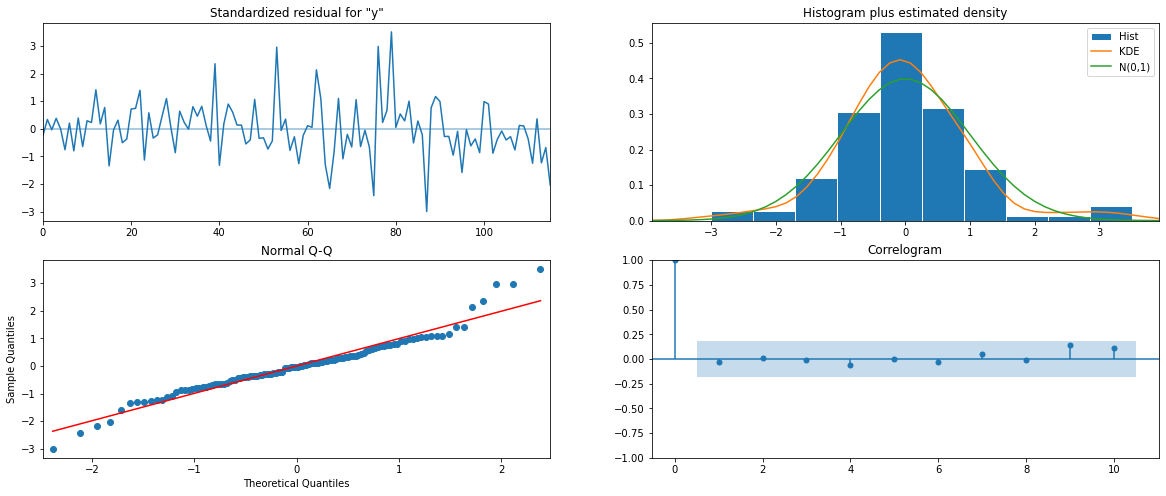

In [334]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [323]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [324]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0  257.242892  55.501954     148.461061     366.024723
1  257.174888  64.584820     130.590967     383.758810
2  265.714452  73.831864     121.006658     410.422247
3  263.007366  78.615069     108.924662     417.090070
4  240.046301  83.309369      76.762937     403.329664

In [325]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

57.0306942464352


In [326]:
temp_resultsDf1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(2,0,2,6)'])


resultsDf0 = pd.concat([resultsDf0,temp_resultsDf1])

resultsDf0

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.6,SimpleExponentialSmoothing                196.404850
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504
Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExpon...   83.734048
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.237522
ARIMA(1,1,1)                                        142.820730
SARIMA(2,1,2)(2,0,2,6)                               57.030694

We can see that the RMSE value has decreased on the test data by including the seasonal parameters as well.

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [327]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [328]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [329]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1338.3663267373183
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1208.4142473347142
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1327.397051054789
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1312.586797868654
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1187.084399500894
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1201.0600831567197
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1200.7545174421311
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1188.0396305010806
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1476.016777738159
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1318.3861206387712
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1185.4842426144041
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1313.5738277003445
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1287.767566926055
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1164.2974585349923
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1188.1632556767752
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1188.2091371919228
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1165.8757060489374
SARIMA(0, 1, 2)

In [330]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
23  (0, 1, 2)  (1, 0, 2, 12)  1156.165429
50  (1, 1, 2)  (1, 0, 2, 12)  1157.082589
26  (0, 1, 2)  (2, 0, 2, 12)  1157.772313
77  (2, 1, 2)  (1, 0, 2, 12)  1158.491006
80  (2, 1, 2)  (2, 0, 2, 12)  1158.630324

In [331]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(0, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -572.083
Date:                            Sat, 01 Apr 2023   AIC                           1156.165
Time:                                    06:31:30   BIC                           1172.032
Sample:                                         0   HQIC                          1162.593
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3742      0.081     -4.632      0.000      -0.533      -0.216
ma.L2          0.0616      0.077   

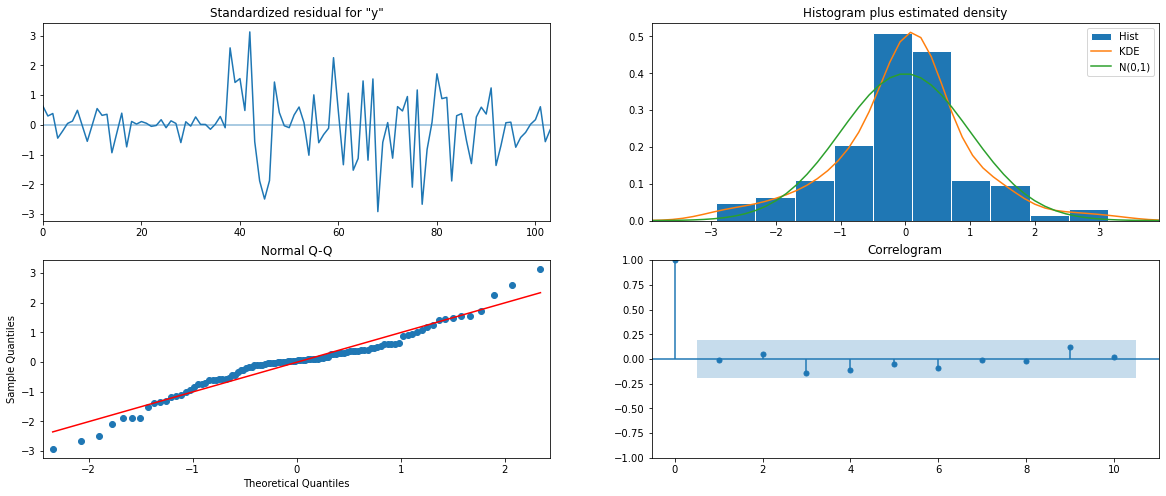

In [332]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [333]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [334]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0  225.292059  55.845596     115.836701     334.747416
1  199.179251  65.878234      70.060284     328.298218
2  213.554159  76.229342      64.147394     362.960924
3  238.613122  85.270200      71.486601     405.739642
4  215.720842  93.440542      32.580745     398.860939

In [335]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

69.03065970530086


In [336]:
temp_resultsDf2 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(1,0,2,12)'])


resultsDf0 = pd.concat([resultsDf0,temp_resultsDf2])

resultsDf0

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.6,SimpleExponentialSmoothing                196.404850
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504
Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExpon...   83.734048
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.237522
ARIMA(1,1,1)                                        142.820730
SARIMA(2,1,2)(2,0,2,6)                               57.030694
SARIMA(0,1,2)(1,0,2,12)                              69.030660

RMSE value has increased to by 69 taking seasonality as 12.

## Soft Drink Data

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion

In [337]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [338]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [339]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

for param in pdq:
    ARIMA_model = sm.tsa.arima.ARIMA(train1['SoftDrinkProduction'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.5996302114518
ARIMA(0, 1, 2) - AIC:2056.4892632434694
ARIMA(1, 1, 0) - AIC:2097.8721216490417
ARIMA(1, 1, 1) - AIC:2061.523083934958
ARIMA(1, 1, 2) - AIC:2056.7156820689206
ARIMA(2, 1, 0) - AIC:2073.234860536023
ARIMA(2, 1, 1) - AIC:2059.100671812967
ARIMA(2, 1, 2) - AIC:2058.712702099876


In [340]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  2056.489263
5  (1, 1, 2)  2056.715682
8  (2, 1, 2)  2058.712702
7  (2, 1, 1)  2059.100672
4  (1, 1, 1)  2061.523084
1  (0, 1, 1)   2069.59963
6  (2, 1, 0)  2073.234861
3  (1, 1, 0)  2097.872122
0  (0, 1, 0)  2103.733834

In [341]:
# Apply the ARIMA Model
# Top box -  Gives the overall summary
# Middle box -  Gives the coefficients and tells if the varibales are significant
# Lower box(Roots) - If the model is stable and good for forecasting.Between Imaginary & Real you draw a circle and check
# if the values/roots are inside the circle
auto_ARIMA = sm.tsa.arima.ARIMA(train1['SoftDrinkProduction'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(0, 1, 2)   Log Likelihood               -1025.245
Date:                 Sat, 01 Apr 2023   AIC                           2056.489
Time:                         06:35:02   BIC                           2065.115
Sample:                     01-01-1980   HQIC                          2059.994
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5407      0.085     -6.392      0.000      -0.707      -0.375
ma.L2         -0.3913      0.113     -3.475      0.001      -0.612      -0.171
sigma2      3.572e+05   4.62e+04      7.725 

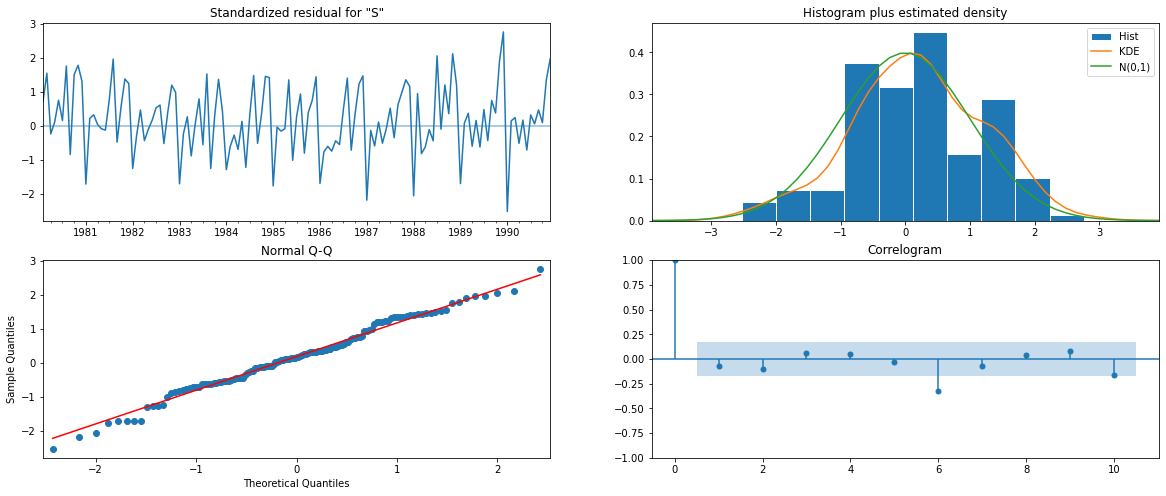

In [342]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [343]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test1))

In [344]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test1['SoftDrinkProduction'],predicted_auto_ARIMA,squared=False)
print(rmse)

831.6158521331566


In [345]:
resultsDf8 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf00 = pd.concat([resultsDf00, resultsDf8])
resultsDf00

Test RMSE
RegressionOnTime                                    3202.844447
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.2,SimpleExponentialSmoothing                 847.635259
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        982.938364
Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponenti...   447.722581
Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialS...   442.214551
ARIMA(0,1,2)                                         831.615852

Run the automated model getting a combination of different parameters of p and q in the range of 0 and 2. We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

Sort the AIC values in the ascending order to get the parameters for the minimum AIC value

The ARIMA model(0,1,2) with the lowest AIC values and the test RMSE for the value is 831.6.

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

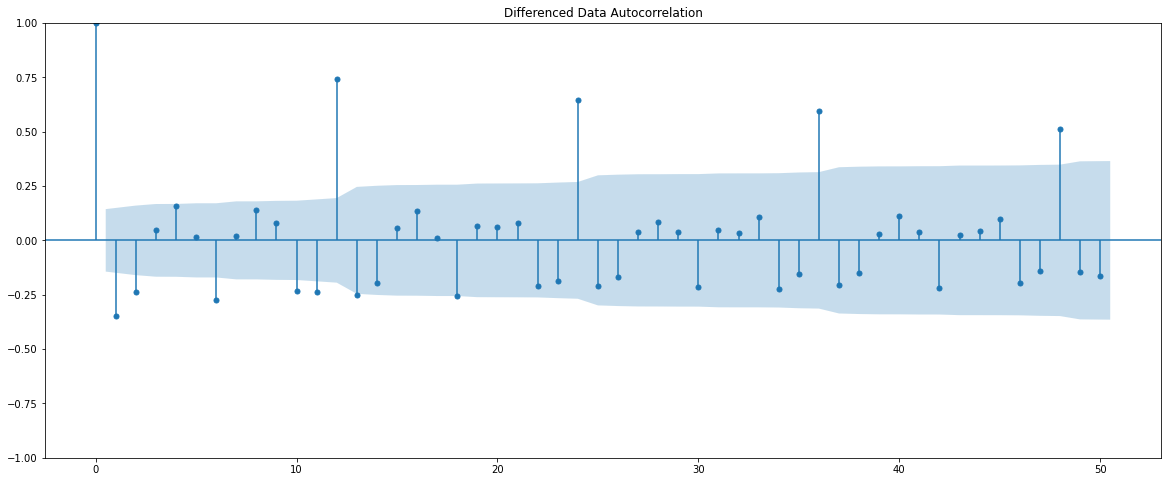

In [346]:
plot_acf(df1['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [347]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [348]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [349]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train1['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  ## by force you can make it TS stationary
                                            enforce_invertibility=False) ## Alpha and Beta should be unique
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1991.6865911398422
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1835.7619130468058
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2001.2435317896568
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1938.055937089127
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1819.7378453343078
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1790.6600051597607
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1790.4200189619835
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1765.5917652590535
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2035.4871783907797
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1932.6082414352384
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1785.2288259152149
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1952.533303696107
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1856.5216278647324
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1747.6522125527151
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1748.7242567779776
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1750.3434719169672
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1698.846967187299
SARIMA(0, 1, 2)x(0, 0, 0, 6) - 

In [350]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 6)  1686.172022
53  (1, 1, 2)  (2, 0, 2, 6)  1688.105594
80  (2, 1, 2)  (2, 0, 2, 6)  1689.372223
17  (0, 1, 1)  (2, 0, 2, 6)  1698.846967
44  (1, 1, 1)  (2, 0, 2, 6)  1700.331864

In [351]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train1['SoftDrinkProduction'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -836.086
Date:                           Sat, 01 Apr 2023   AIC                           1686.172
Time:                                   06:39:15   BIC                           1705.447
Sample:                                        0   HQIC                          1693.997
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7796      0.116     -6.725      0.000      -1.007      -0.552
ma.L2         -0.0866      0.094     -0.926

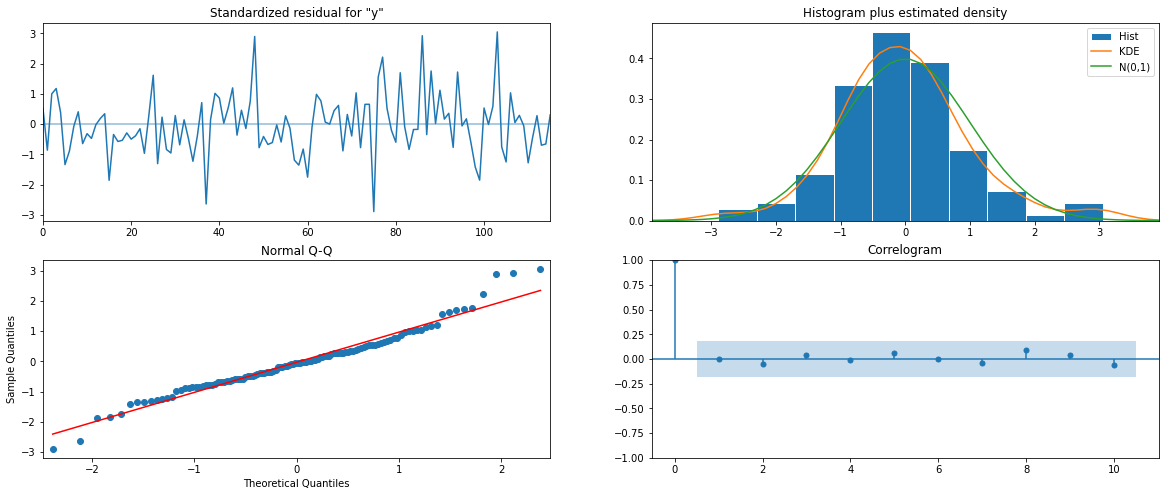

In [352]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [353]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test1))

In [354]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2716.673533  318.171394    2093.069061    3340.278006
1  3110.199797  325.815150    2471.613838    3748.785756
2  3344.806208  328.583954    2700.793493    3988.818924
3  3103.976767  331.329063    2454.583737    3753.369797
4  3290.403888  334.052398    2635.673219    3945.134558

In [355]:
rmse = mean_squared_error(test1['SoftDrinkProduction'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

447.94260605319766


In [356]:
temp_resultsDf1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf00 = pd.concat([resultsDf00,temp_resultsDf1])

resultsDf00

Test RMSE
RegressionOnTime                                    3202.844447
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.2,SimpleExponentialSmoothing                 847.635259
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        982.938364
Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponenti...   447.722581
Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialS...   442.214551
ARIMA(0,1,2)                                         831.615852
SARIMA(0,1,2)(2,0,2,6)                               447.942606

We can see that the RMSE value has decreased on the test data by including the seasonal parameters as well.

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [357]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [358]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [359]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train1['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1836.220093770634
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1633.5491793653669
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1789.866280699666
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1764.6107238899458
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1591.5155744481242
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1608.648860364038
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1608.6165283979685
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1591.8014039553614
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2035.4871783907797
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1788.5369694843512
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1577.0183750502306
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1749.9824755850375
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1697.7997311037427
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1530.6914315596814
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1563.4637994171042
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1558.212075380079
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1529.2536659281382
SARIMA(0, 1, 2

In [360]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 12)  1517.207903
23  (0, 1, 2)  (1, 0, 2, 12)  1518.229381
53  (1, 1, 2)  (2, 0, 2, 12)  1518.328976
50  (1, 1, 2)  (1, 0, 2, 12)  1519.197016
80  (2, 1, 2)  (2, 0, 2, 12)  1520.313657

In [361]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train1['SoftDrinkProduction'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -751.604
Date:                            Sat, 01 Apr 2023   AIC                           1517.208
Time:                                    06:42:40   BIC                           1535.719
Sample:                                         0   HQIC                          1524.707
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9981      0.141     -7.092      0.000      -1.274      -0.722
ma.L2         -0.1064      0.121   

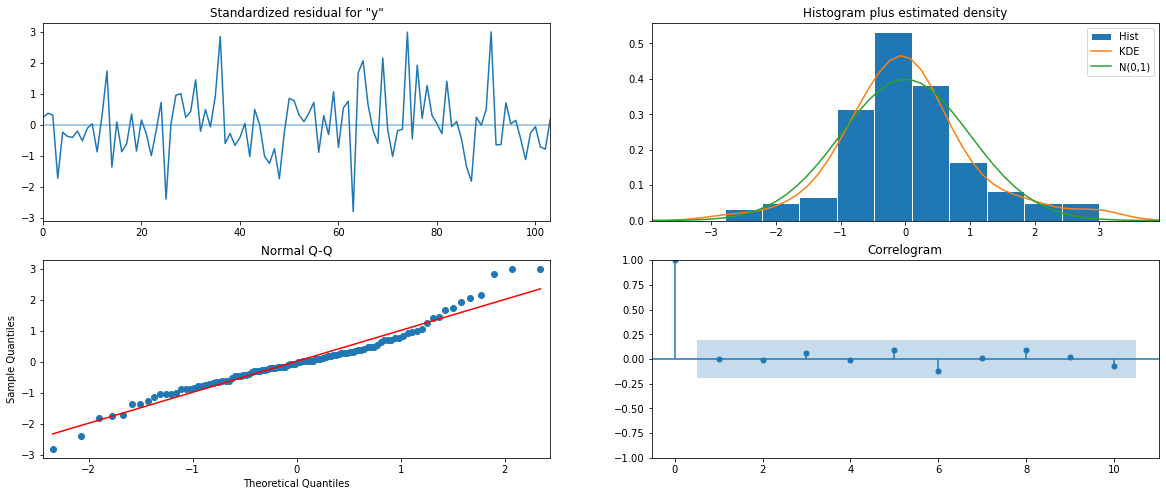

In [362]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [363]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test1))

In [364]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2657.024987  328.613851    2012.953674    3301.096299
1  2979.306649  334.136589    2324.410969    3634.202328
2  3404.286347  335.603086    2746.516385    4062.056309
3  3086.458765  337.063859    2425.825741    3747.091788
4  3284.532830  338.518355    2621.049047    3948.016613

In [365]:
rmse = mean_squared_error(test1['SoftDrinkProduction'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

437.7065340826492


In [366]:
temp_resultsDf2 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf00 = pd.concat([resultsDf00,temp_resultsDf2])

resultsDf00

Test RMSE
RegressionOnTime                                    3202.844447
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.2,SimpleExponentialSmoothing                 847.635259
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        982.938364
Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponenti...   447.722581
Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialS...   442.214551
ARIMA(0,1,2)                                         831.615852
SARIMA(0,1,2)(2,0,2,6)                               447.942606
SARIMA(0,1,2)(2,0,2,12)                              437.706534

RMSE value has reduced further down to 437 by taking seasonality as 12.

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## ShoeSales Data

Let us look at the ACF and the PACF plots once more.

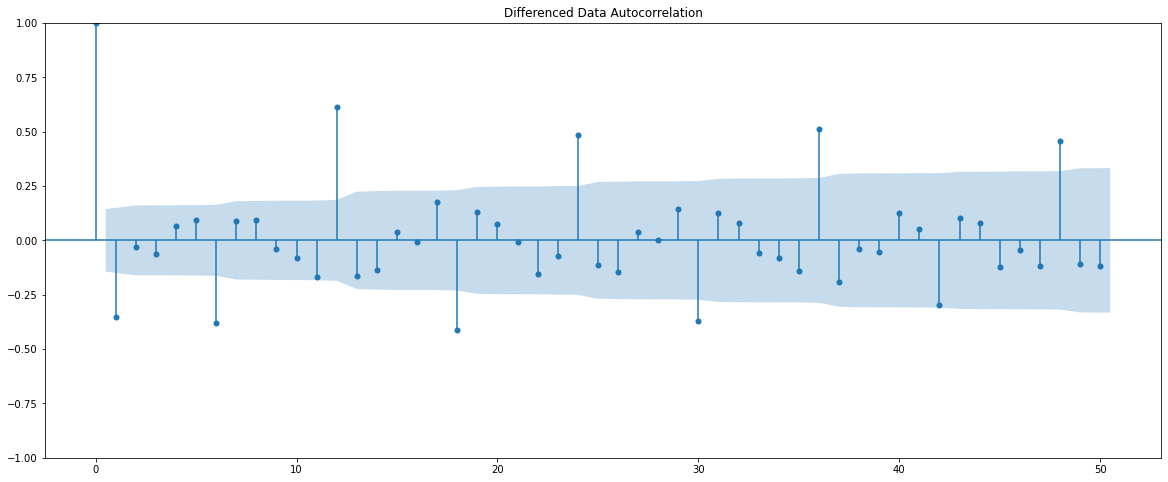

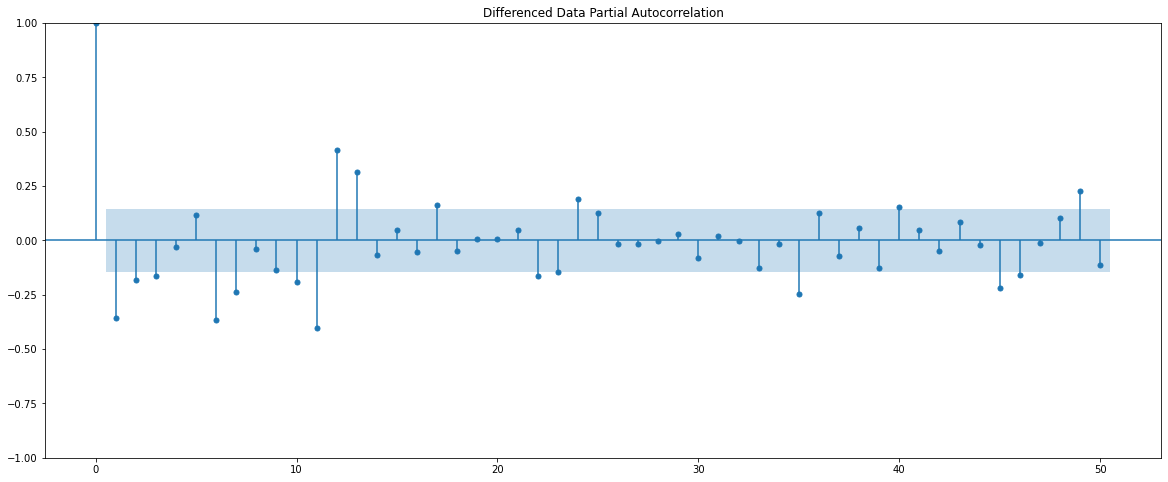

In [367]:
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

By looking at the above plots, we will take the value of p and q to be 3 and 1 respectively.

In [368]:
manual_ARIMA = sm.tsa.arima.ARIMA(train['Shoe_Sales'].astype('float64'), order=(3,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -743.173
Date:                Sat, 01 Apr 2023   AIC                           1496.347
Time:                        06:47:38   BIC                           1510.723
Sample:                    01-01-1980   HQIC                          1502.188
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4794      0.125      3.850      0.000       0.235       0.723
ar.L2          0.0166      0.111      0.150      0.881      -0.200       0.234
ar.L3          0.0281      0.108      0.260      0.7

We get a comparatively simpler model by looking at the ACF and the PACF plots.

## Predict on the Test Set using this model and evaluate the model.

In [369]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [370]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_ARIMA,squared=False)
print(rmse)

144.18393384860542


In [371]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,1)'])


resultsDf0 = pd.concat([resultsDf0,temp_resultsDf])

resultsDf0

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.6,SimpleExponentialSmoothing                196.404850
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504
Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExpon...   83.734048
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.237522
ARIMA(1,1,1)                                        142.820730
SARIMA(2,1,2)(2,0,2,6)                               57.030694
SARIMA(0,1,2)(1,0,2,12)                              69.030660
ARIMA(3,1,1)                                        144.183934

RMSE value is higher than Arima model built on the basis of lowest AIC.

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6 or 12.

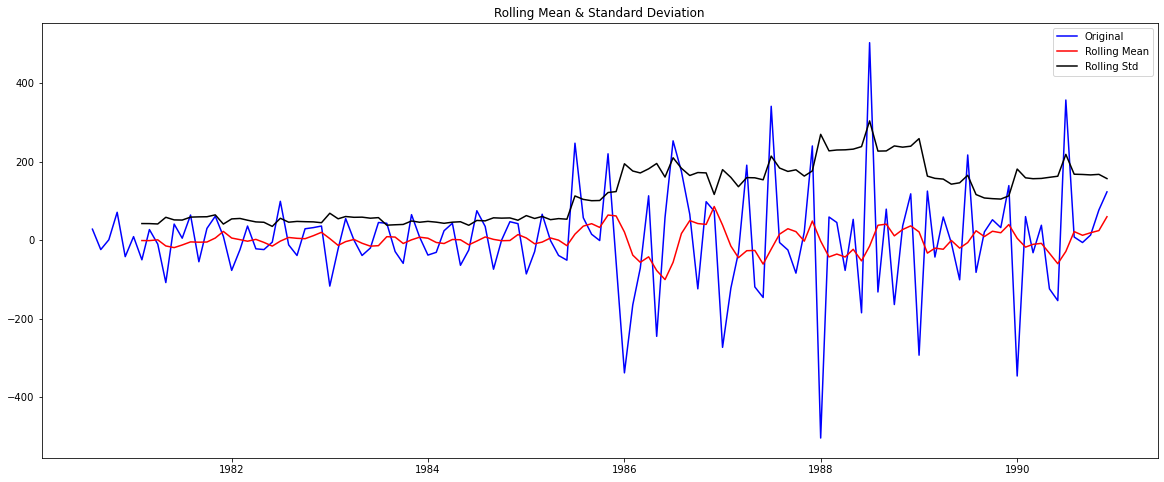

Results of Dickey-Fuller Test:
Test Statistic                -1.133336e+01
p-value                        1.098825e-20
#Lags Used                     6.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [372]:
test_stationarity((train['Shoe_Sales'].diff(6).dropna()).diff(1).dropna())

As p value is less than 0.05 hence the data is stationary thus we can build SARIMA model by looking at ACF & PACF plot taking seasonality as 6.

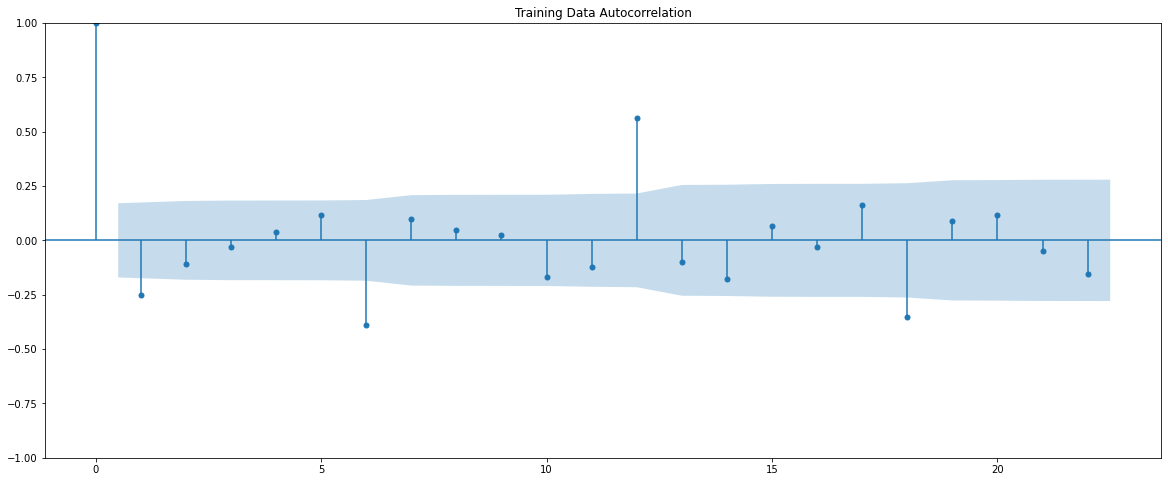

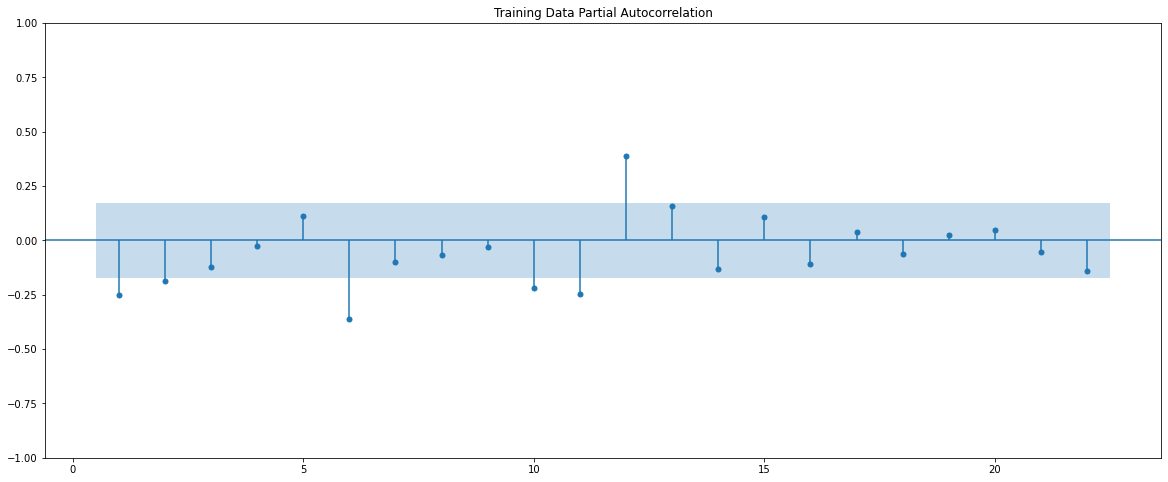

In [373]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(3) and q(2) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 6.

#### Manually choosing p,d,q & P,D,Q & seasonality=12 , values with lowest RMSE.

In [848]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -571.985
Date:                              Sat, 01 Apr 2023   AIC                           1155.970
Time:                                      08:41:36   BIC                           1171.837
Sample:                                           0   HQIC                          1162.398
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5545      0.523     -1.059      0.289      -1.580       0.471
ma.L1          0.17

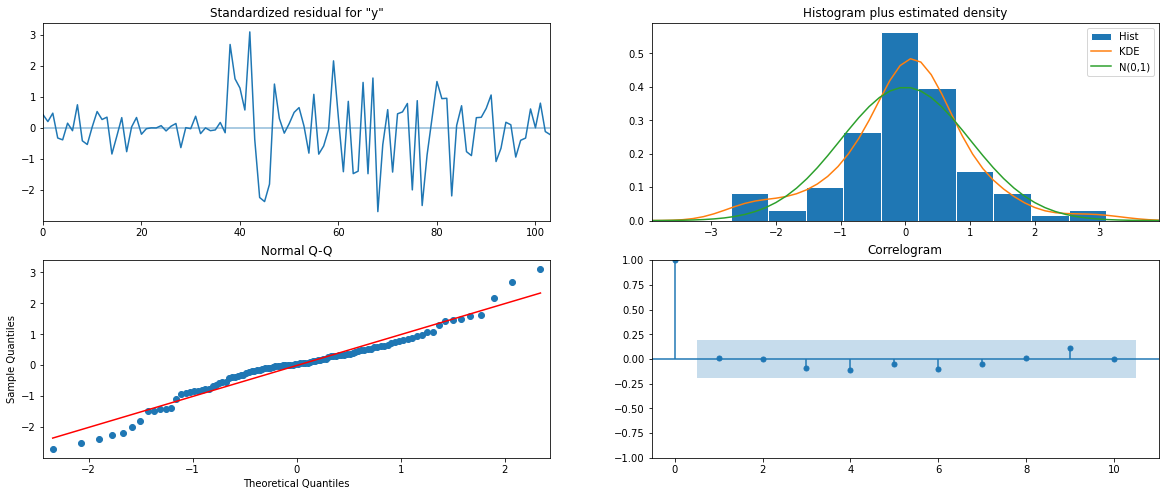

In [849]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [850]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [851]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0  239.571888  58.671615     124.577635     354.566140
1  220.744805  69.050105      85.409087     356.080523
2  240.138209  81.336553      80.721494     399.554923
3  242.114318  90.349711      65.032137     419.196498
4  235.798486  99.366705      41.043323     430.553649

In [852]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

50.251949453629166


## Soft Drink Data

Let us look at the ACF and the PACF plots once more.

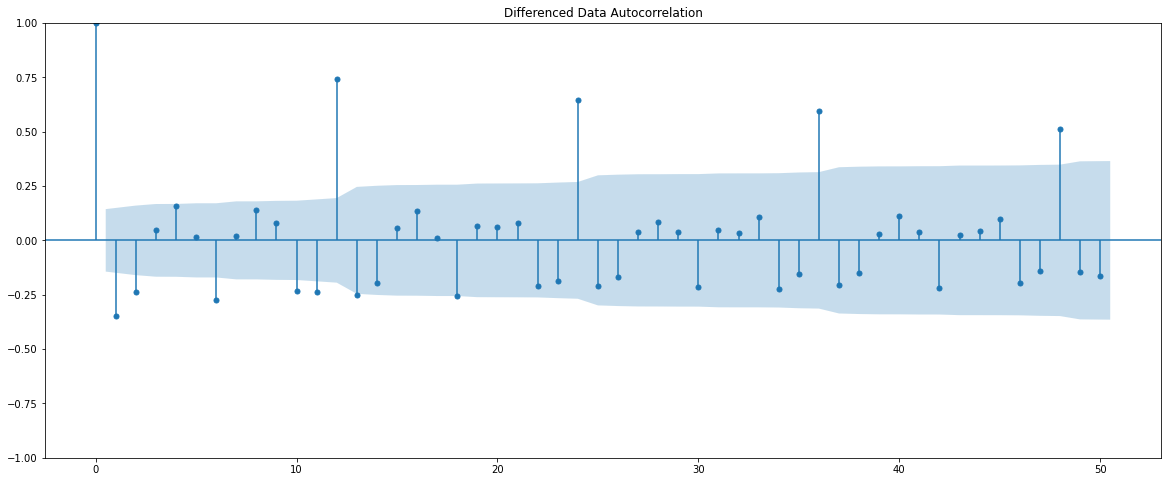

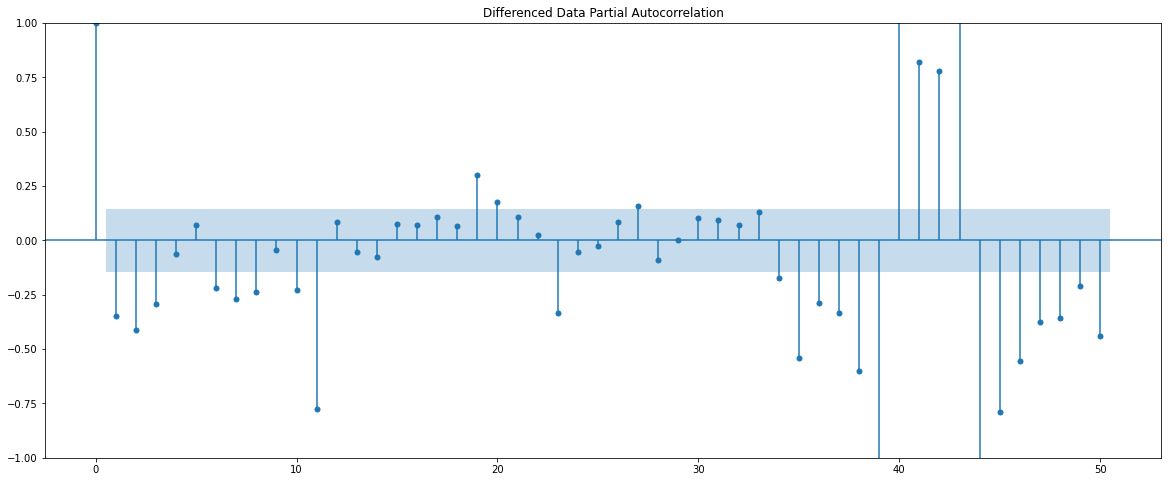

In [803]:
plot_acf(df1['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

By looking at the above plots, we will take the value of p and q to be 3 and 2 respectively.

In [804]:
manual_ARIMA = sm.tsa.arima.ARIMA(train1['SoftDrinkProduction'].astype('float64'), order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(3, 1, 2)   Log Likelihood               -1024.340
Date:                 Sat, 01 Apr 2023   AIC                           2060.680
Time:                         08:30:44   BIC                           2077.931
Sample:                     01-01-1980   HQIC                          2067.690
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3216      0.460     -0.700      0.484      -1.223       0.579
ar.L2         -0.0001      0.189     -0.001      0.999      -0.371       0.370
ar.L3         -0.0227      0.218     -0.104 

We get a comparatively simpler model by looking at the ACF and the PACF plots.

## Predict on the Test Set using this model and evaluate the model.

In [805]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test1))

In [806]:
rmse = mean_squared_error(test1['SoftDrinkProduction'],predicted_manual_ARIMA,squared=False)
print(rmse)

822.217444645557


In [807]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2)'])


resultsDf00 = pd.concat([resultsDf00,temp_resultsDf])

resultsDf00

Test RMSE
RegressionOnTime                                    3202.844447
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.2,SimpleExponentialSmoothing                 847.635259
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        982.938364
Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponenti...   447.722581
Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialS...   442.214551
ARIMA(0,1,2)                                         831.615852
SARIMA(0,1,2)(2,0,2,6)                               447.942606
SARIMA(0,1,2)(2,0,2,12)                              437.706534
ARIMA(3,1,2)                                         822.217445

RMSE value is lower than Arima model built on the basis of lowest AIC.

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

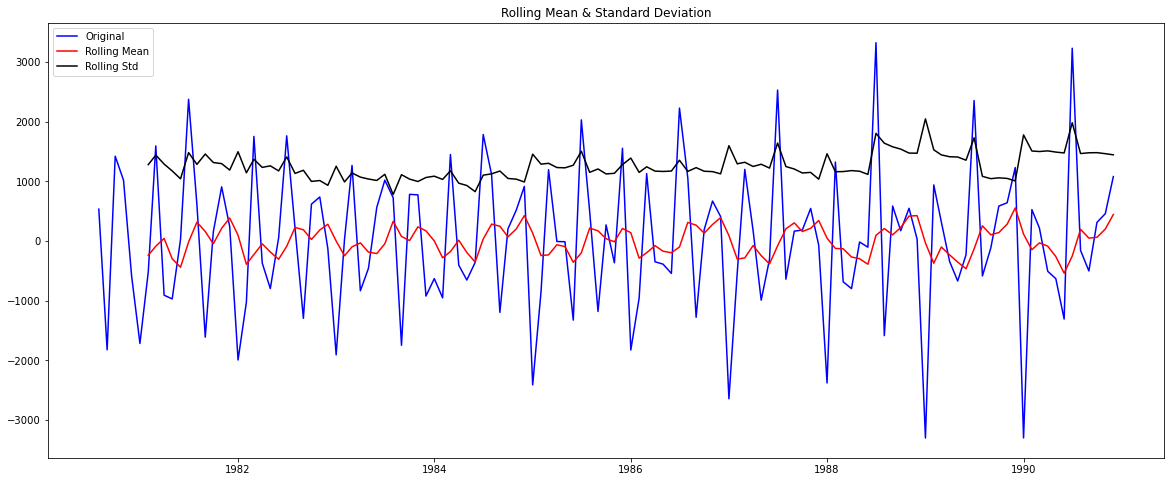

Results of Dickey-Fuller Test:
Test Statistic                -7.167226e+00
p-value                        2.865418e-10
#Lags Used                     1.200000e+01
Number of Observations Used    1.120000e+02
Critical Value (1%)           -3.490131e+00
Critical Value (5%)           -2.887712e+00
Critical Value (10%)          -2.580730e+00
dtype: float64 



In [808]:
test_stationarity((train1['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna())

As p value is less than 0.05 hence the data is stationary thus we can build SARIMA model by looking at ACF & PACF plot taking seasonality as 6.

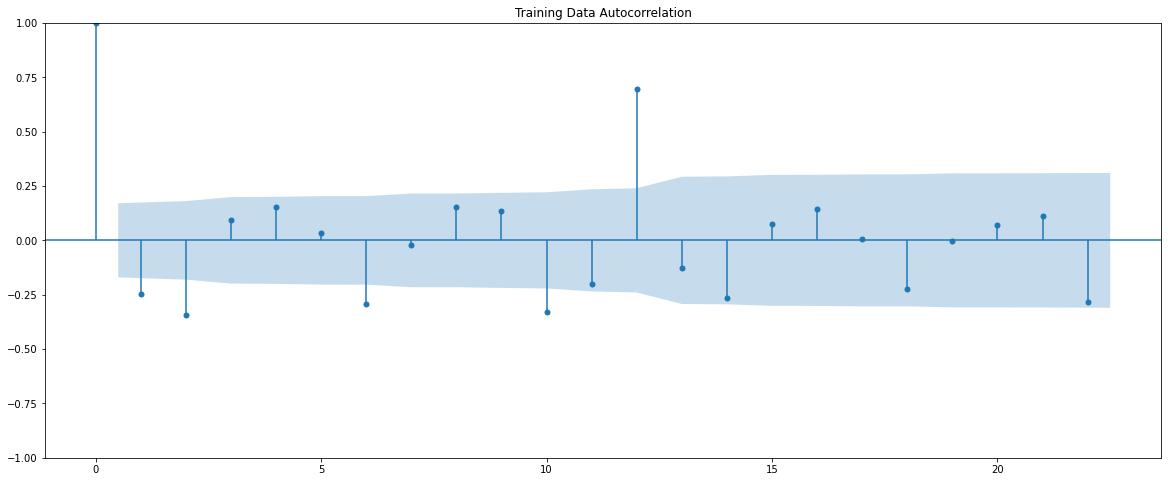

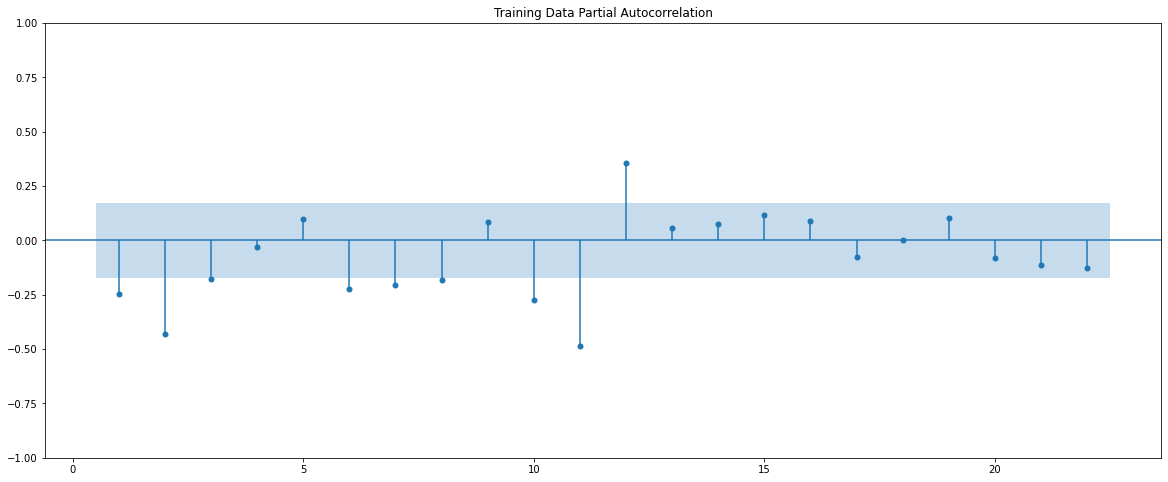

In [810]:
plot_acf(train1.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train1.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(3) and q(2) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 2.

#### Manually choosing p,d,q & P,D,Q & seasonality=12 , values with lowest RMSE

In [843]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train1['SoftDrinkProduction'].values,
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -667.910
Date:                            Sat, 01 Apr 2023   AIC                           1345.821
Time:                                    08:41:06   BIC                           1358.430
Sample:                                         0   HQIC                          1350.910
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8157      0.120     -6.807      0.000      -1.051      -0.581
ma.L2         -0.0855      0.106   

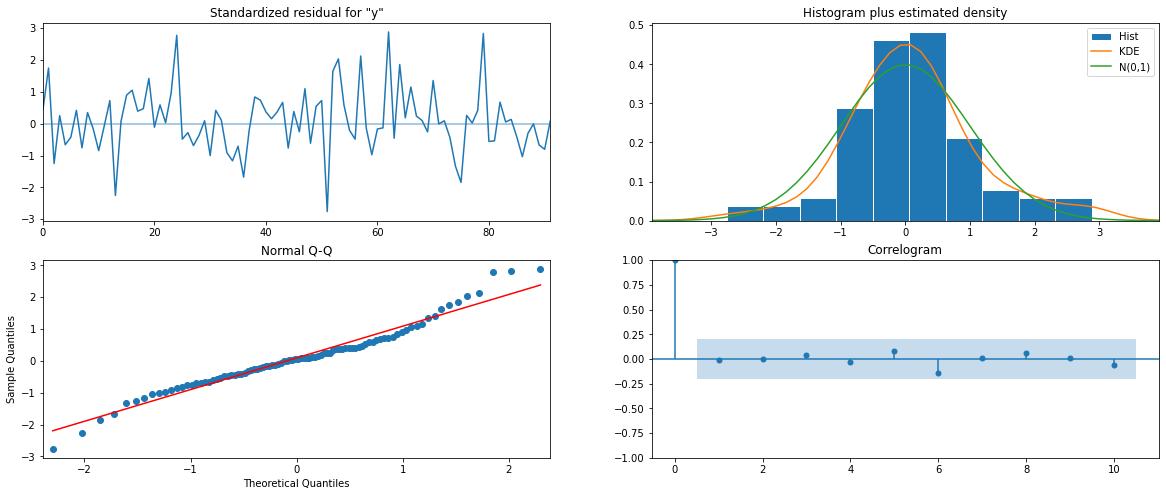

In [844]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [845]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [846]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2627.038254  340.185198    1960.287518    3293.788990
1  2950.201535  345.919223    2272.212316    3628.190754
2  3387.943067  347.546294    2706.764849    4069.121285
3  3069.619553  349.170227    2385.258485    3753.980622
4  3274.185842  350.786855    2586.656240    3961.715444

In [847]:
rmse1 = mean_squared_error(test1['SoftDrinkProduction'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse1)

434.6146229172365


## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

## ShoeSales Data

In [853]:
temp_resultsDf2 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,1,1,12)'])


resultsDf0 = pd.concat([resultsDf0,temp_resultsDf2])

resultsDf0

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.6,SimpleExponentialSmoothing                196.404850
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504
Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExpon...   83.734048
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.237522
ARIMA(1,1,1)                                        142.820730
SARIMA(2,1,2)(2,0,2,6)                               57.030694
SARIMA(0,1,2)(1,0,2,12)                              69.030660
ARIMA(3,1,1)                                        144.183934
SARIMA(1,1,2)(1,1,1,12)                              50.251949

Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialSmoothing has the least Test RMSE 41.23. Hence best model/method for complete data to predict 12 months into future.

In [854]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf0.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.237522
2pointTrailingMovingAverage                          45.948736
SARIMA(1,1,2)(1,1,1,12)                              50.251949
SARIMA(2,1,2)(2,0,2,6)                               57.030694
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
SimpleAverageModel                                   63.984570
9pointTrailingMovingAverage                          67.723648
SARIMA(0,1,2)(1,0,2,12)                              69.030660
Alpha=0.57,Beta=0.00014,Gamma=0.202,TripleExpon...   83.734048
ARIMA(1,1,1)                                        142.820730
ARIMA(3,1,1)                                        144.183934
Alpha=0.6,SimpleExponentialSmoothing                196.404850
NaiveModel                                          245.121306
RegressionOnTime                                    266.276472
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504

## Soft Drink Data

In [855]:
temp_resultsDf2 = pd.DataFrame({'Test RMSE': [rmse1]}
                           ,index=['SARIMA(0,1,2)(0,1,2,12)'])


resultsDf00 = pd.concat([resultsDf00,temp_resultsDf2])

resultsDf00

Test RMSE
RegressionOnTime                                    3202.844447
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.2,SimpleExponentialSmoothing                 847.635259
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        982.938364
Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponenti...   447.722581
Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialS...   442.214551
ARIMA(0,1,2)                                         831.615852
SARIMA(0,1,2)(2,0,2,6)                               447.942606
SARIMA(0,1,2)(2,0,2,12)                              437.706534
ARIMA(3,1,2)                                         822.217445
SARIMA(0,1,2)(0,1,2,12)                              434.614623

SARIMA(0,1,2)(0,1,2,12) has the least Test RMSE 434. Hence best model/method for complete data to predict 12 months into future.

In [856]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf00.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
SARIMA(0,1,2)(0,1,2,12)                              434.614623
SARIMA(0,1,2)(2,0,2,12)                              437.706534
Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialS...   442.214551
Alpha=0.11,Beta=0.04,Gamma=0.23,TripleExponenti...   447.722581
SARIMA(0,1,2)(2,0,2,6)                               447.942606
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
ARIMA(3,1,2)                                         822.217445
ARIMA(0,1,2)                                         831.615852
Alpha=0.2,SimpleExponentialSmoothing                 847.635259
SimpleAverageModel                                   934.353358
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        982.938364
NaiveModel                                          1519.259233
RegressionOnTime                                    3202.844447

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## ShoeSales Data

## Building the most optimum model on the Full Data.

In [859]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.6,
                                                                 smoothing_seasonal=0.2)

In [860]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Shoe_Sales'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 65.72957833447327


In [861]:
# Getting the predictions for 12 months into future
prediction_1 = fullmodel1.forecast(steps=12)

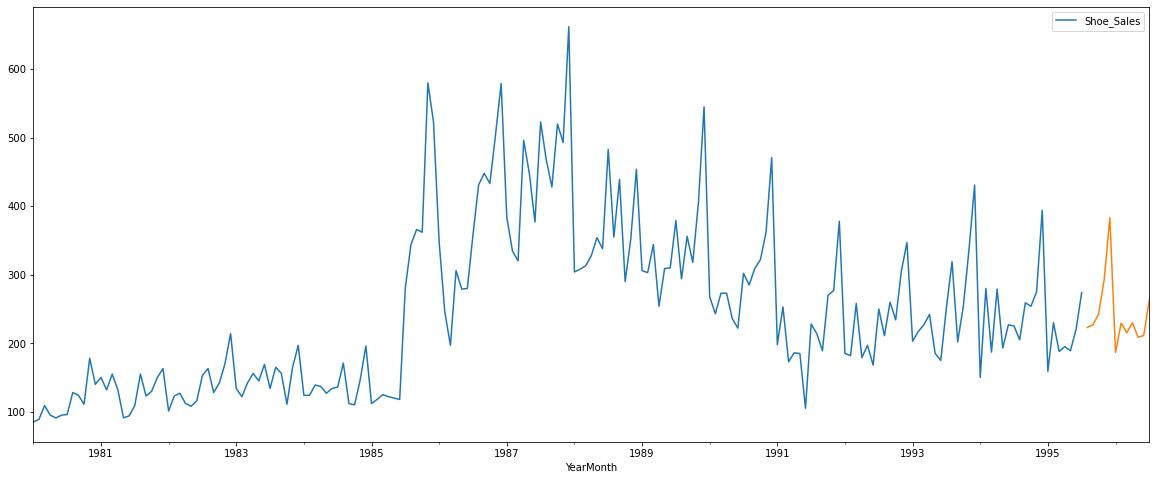

In [862]:
df.plot()
prediction_1.plot();

In [863]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01   93.929879  223.070867  352.211856
1995-09-01   97.890414  227.031403  356.172392
1995-10-01  113.444210  242.585199  371.726188
1995-11-01  164.320143  293.461131  422.602120
1995-12-01  254.106116  383.247105  512.388093

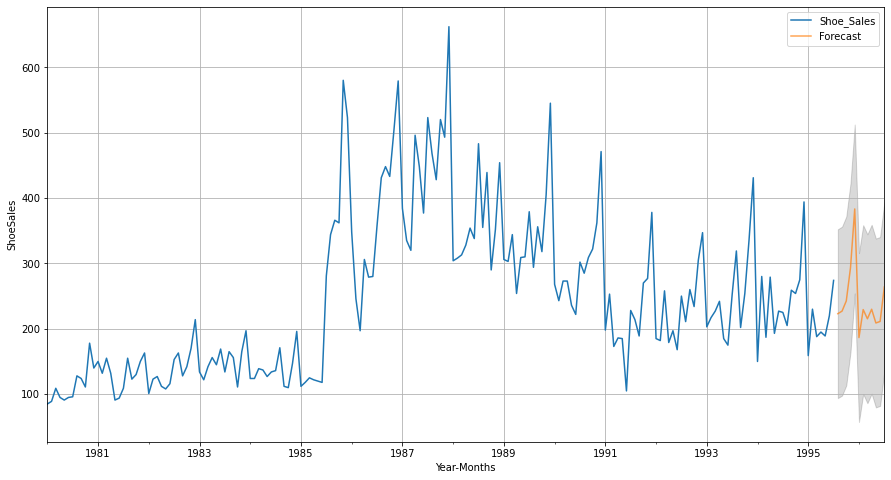

In [865]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('ShoeSales')
plt.legend(loc='best')
plt.grid()
plt.show()

The above picture shows an increasing decreasing trend of sales for 12 months into future.

## Soft Drink Data

## Building the most optimum model on the Full Data.

In [866]:
full_data_model = sm.tsa.statespace.SARIMAX(df1['SoftDrinkProduction'],
                                order=(0,1,2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                SoftDrinkProduction   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1073.053
Date:                            Sat, 01 Apr 2023   AIC                           2156.106
Time:                                    09:19:07   BIC                           2171.058
Sample:                                01-01-1980   HQIC                          2162.181
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9061      0.080    -11.329      0.000      -1.063      -0.749
ma.L2          0.0553      0.085   

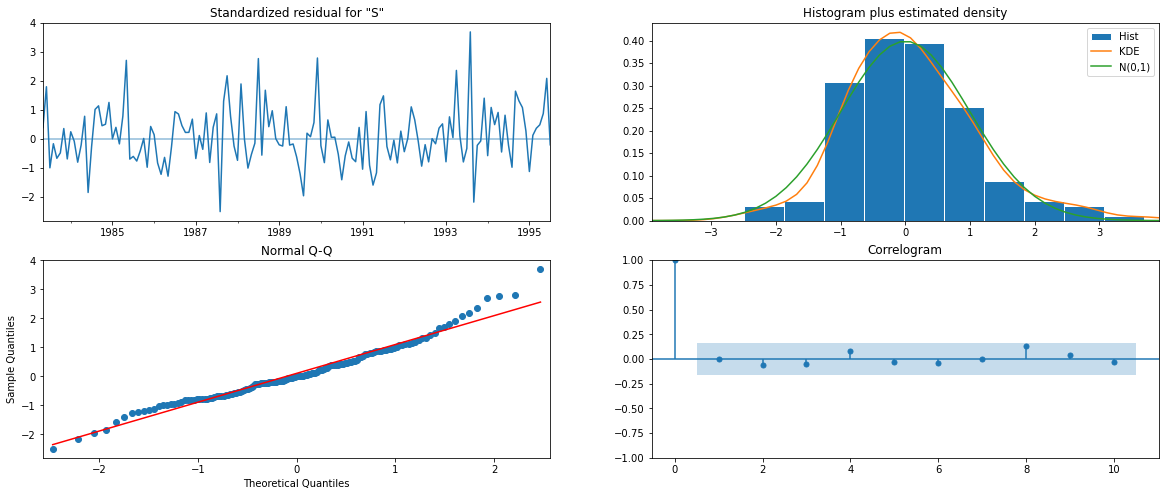

In [867]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future.

In [868]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [869]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

SoftDrinkProduction         mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01           4474.357367  356.051563    3776.509127    5172.205607
1995-09-01           4197.505465  357.618152    3496.586767    4898.424162
1995-10-01           4504.320943  361.544807    3795.706142    5212.935743
1995-11-01           5190.166618  365.429272    4473.938406    5906.394829
1995-12-01           6037.629324  369.272877    5313.867784    6761.390863

#### We have calculated the upper and lower confidence bands at 95% confidence level

In [870]:
rmse = mean_squared_error(df1['SoftDrinkProduction'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 459.7380945255836


In [871]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

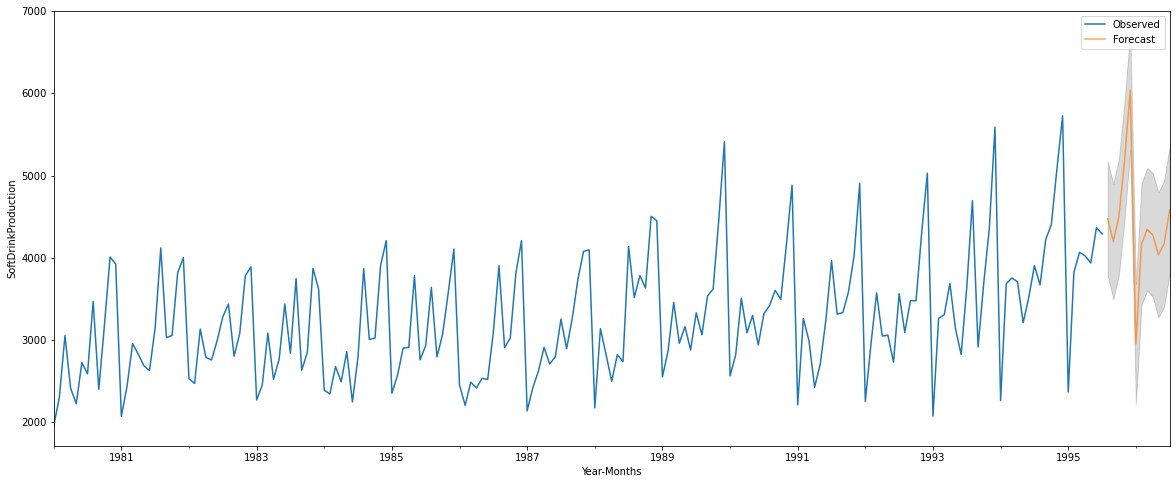

In [872]:
# plot the forecast along with the confidence band

axis = df1['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SoftDrinkProduction')
plt.legend(loc='best')
plt.show()

The above picture shows an increasing decreasing trend of sales for 12 months into future.

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

## Shoe Sales Data

Comments/Insights

- December month has the highest sales in a year

- Model plot was build based on the trend and seasonality. We see the future prediction is in line with the previous year predictions. Model is actually a best fit model.

- Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialSmoothing has the least Test RMSE 41.23. Hence best model/method for complete data to predict 12 months into future.

Recommendations
- Shoe sales are seasonal.
- Company should plan a head and keep enough stock from September till December to capitalize on the demand.
- In order to increase the sales company should plan some promotional offers(Ex- 15% off) from January till June so that there will be steady sales throughout the year.
- Production can be kept at minimal in order to keep the product alive, with maybe maximum production happening in the months of March and October when the sales of shoes are at an upper level compared to the rest. Some promotional offers during the dull months, especially during the festive season of the last quarter might help with the sales.
- For the last 15 years a downward trend in the sales of Shoes is observed. Hence the reason behind such a decreasing trend has to be found out. This could because of external factors like competitors.
- There is need for analysis of price of shoes of competitors to gain market attention. Further the decreasing trend could be because of internal factors like Shoe quality, Brand name, Distribution chain mismanagement.There is a peak in sales especially for the month of December. This opportunity of higher sales in this month needs to be exploited by providing sales related incentives to the Distributors.

## Soft Drink Data

Comments/Insights

- December month has the highest sales in a year

- Model plot was build based on the trend and seasonality. We see the future prediction is in line with the previous year predictions. Model is actually a best fit model.

- SARIMA(0,1,2)(0,1,2,12) has the least Test RMSE 434. Hence best model/method for complete data to predict 12 months into future.

Recommendations
- Soft Drink sales are seasonal.
- Company should plan a head and keep enough stock from September till December to capitalize on the demand.
- In order to increase the sales company should plan some promotional offers from January till June so that there will be steady sales throughout the year.
- Offering extra 10% quantity in soft drink bottle can also attract customers.
- Production can be kept at minimal in order to keep the product alive, with maybe maximum production happening in the months of March and October when the sales of Soft Drink are at an upper level compared to the rest. Some promotional offers during the dull months, especially during the festive season of the last quarter might help with the sales.
- For the last 15 years a downward trend in the sales of Soft Drink is observed. Hence the reason behind such a decreasing trend has to be found out. This could because of external factors like competitors.
- There is need for analysis of price of soft drinks of competitors to gain market attention.Further the decreasing trend could be because of internal factors like Soft Drink quality, Brand name, Distribution chain mismanagement, Advertisement quality etc. There is a peak in sales especially for the month of December. This opportunity of higher sales in this month needs to be exploited by providing sales related incentives to the Distributors.

# END